# Business Problem Overview

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively.

The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months.

In [1]:
# Importing the required libraries

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Understanding the data

In [2]:
# Importing and reading the csv file

telecom = pd.read_csv(r"C:\Users\Soundarya\Documents\Upgrad\Case studies\Telecom Churn Case Study\telecom_churn_data.csv")
telecom.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [3]:
original_data = telecom.copy()

In [4]:
# Checking the shape of data

telecom.shape

(99999, 226)

In [5]:
# Checking datatypes of each column

telecom.info(verbose = 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               int64
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float6

In [6]:
telecom.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

# Filtering High Value Customers(HVC)

In the Indian and the southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

In this project, we will define high-value customers and predict churn only on high-value customers.

We can filter HVC based on the average of the two columns 'total_rech_amt_6' and 'total_rech_amt_7' as it indicates the total amount recharged by the customer in good phase. The customers whose average value is greater than it's 70th percentile will be considered as High Value Customers.

In [7]:
# Creating a column 'Good_phase_avg' which is obtained by the average of 'total_rech_amt_6' and 'total_rech_amt_7'

telecom['Good_phase_avg'] = telecom[['total_rech_amt_6', 'total_rech_amt_7']].mean(axis = 1)

telecom['Good_phase_avg']

0        307.0
1        229.0
2        241.5
3        270.0
4        273.0
         ...  
99994     85.0
99995    110.0
99996     59.5
99997    369.5
99998    355.0
Name: Good_phase_avg, Length: 99999, dtype: float64

In [8]:
# Calculating the 70th percentile value of 'Good_phase_avg'

telecom[['Good_phase_avg']].quantile([.7], axis = 0)

Good_phase_avg
0.7           368.5

In [9]:
# Filtering HVC

telecom = telecom.loc[telecom['Good_phase_avg'] > 368.5, :]

In [10]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29979 entries, 7 to 99997
Columns: 227 entries, mobile_number to Good_phase_avg
dtypes: float64(180), int64(35), object(12)
memory usage: 52.1+ MB


In [11]:
telecom.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
7      7000701601        109             0.0             0.0             0.0   
8      7001524846        109             0.0             0.0             0.0   
13     7002191713        109             0.0             0.0             0.0   
16     7000875565        109             0.0             0.0             0.0   
17     7000187447        109             0.0             0.0             0.0   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
7             6/30/2014            7/31/2014            8/31/2014   
8             6/30/2014            7/31/2014            8/31/2014   
13            6/30/2014            7/31/2014            8/31/2014   
16            6/30/2014            7/31/2014            8/31/2014   
17            6/30/2014            7/31/2014            8/31/2014   

   last_date_of_month_9    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
7             9/30/2014  1069.180  1349.850  3171.480  500.000        57.84   
8             9/30/2014   378.721   492.223   137.362  166.787       413.69   
13            9/30/2014   492.846   205.671   593.260  322.732       501.76   
16            9/30/2014   430.975   299.869   187.894  206.490        50.51   
17            9/30/2014   690.008    18.980    25.499  257.583      1185.91   

    onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
7         54.68        52.29          NaN        453.43        567.16   
8        351.03        35.08        33.46         94.66         80.63   
13       108.39       534.24       244.81        413.31        119.28   
16        74.01        70.61        31.34        296.29        229.74   
17         9.28         7.79       558.51         61.64          0.00   

    offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
7         325.91           NaN          16.23          33.49          31.64   
8         136.48        108.71           0.00           0.00           0.00   
13        482.46        214.06          23.53         144.24          72.11   
16        162.76        224.39           0.00           2.83           0.00   
17          5.54         87.89           0.00           4.76           4.81   

    roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
7             NaN          23.74          12.59          38.06            NaN   
8            0.00           0.00           0.00           0.00           0.00   
13         136.78           7.98          35.26           1.44          12.78   
16           0.00           0.00          17.74           0.00           0.00   
17           0.00           0.00           8.46          13.34          17.98   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
7              51.39             31.38             40.28               NaN   
8             297.13            217.59             12.49             26.13   
13             49.63              6.19             36.01              6.14   
16             42.61             65.16             67.38             26.88   
17             38.99              0.00              0.00             36.41   

    loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
7             308.63            447.38            162.28               NaN   
8              80.96             70.58             50.54             34.58   
13            151.13             47.28            294.46            108.24   
16            273.29            145.99            128.28            201.49   
17             58.54              0.00              0.00              9.38   

    loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
7              62.13             55.14             53.23               NaN   
8               0.00              0.00              0.00              0.00   
13              4.54              0.00             23.51    

In [12]:
telecom.shape

(29979, 227)

**We are now left with 29979 high value customers on whom we will identify the churn rate.**

# Data Cleaning

In [13]:
# Checking the datatypes

telecom.info(verbose = 1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29979 entries, 7 to 99997
Data columns (total 227 columns):
mobile_number               int64
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float6

In [14]:
# .isnull() command by default gives the null values in columns
# .sum() sums up the missing values (column-wise)

telecom.isnull().sum()

mobile_number                   0
circle_id                       0
loc_og_t2o_mou                114
std_og_t2o_mou                114
loc_ic_t2o_mou                114
last_date_of_month_6            0
last_date_of_month_7           31
last_date_of_month_8          157
last_date_of_month_9          360
arpu_6                          0
arpu_7                          0
arpu_8                          0
arpu_9                          0
onnet_mou_6                   316
onnet_mou_7                   303
onnet_mou_8                   938
onnet_mou_9                  1703
offnet_mou_6                  316
offnet_mou_7                  303
offnet_mou_8                  938
offnet_mou_9                 1703
roam_ic_mou_6                 316
roam_ic_mou_7                 303
roam_ic_mou_8                 938
roam_ic_mou_9                1703
roam_og_mou_6                 316
roam_og_mou_7                 303
roam_og_mou_8                 938
roam_og_mou_9                1703
loc_og_t2t_mou

In [15]:
# Summing up the missing values in columns
# Total missing values in each column is divided by total number of rows 
# Total number of rows is obtained by length of the index column
# The obtained value is multiplied by 100 to get the percentage and rounded off up to 2 decimal points

round(100*(telecom.isnull().sum()/len(telecom.index)),2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               0.38
std_og_t2o_mou               0.38
loc_ic_t2o_mou               0.38
last_date_of_month_6         0.00
last_date_of_month_7         0.10
last_date_of_month_8         0.52
last_date_of_month_9         1.20
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  1.05
onnet_mou_7                  1.01
onnet_mou_8                  3.13
onnet_mou_9                  5.68
offnet_mou_6                 1.05
offnet_mou_7                 1.01
offnet_mou_8                 3.13
offnet_mou_9                 5.68
roam_ic_mou_6                1.05
roam_ic_mou_7                1.01
roam_ic_mou_8                3.13
roam_ic_mou_9                5.68
roam_og_mou_6                1.05
roam_og_mou_7                1.01
roam_og_mou_8                3.13
roam_og_mou_9                5.68
loc_og_t2t_mou

In [16]:
# Subsetting the columns which have more than 60% null values

cols_1 = ['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9', 
          'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6', 
          'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 
          'count_rech_2g_9','count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9', 'av_rech_amt_data_6', 
          'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9', 
          'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 
          'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9']

In [17]:
# We can drop the date columns as they have many nulls and are not useful in our analysis

date_cols = telecom.select_dtypes(include = ['object'])
print(date_cols.columns)

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'date_of_last_rech_9',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9'],
      dtype='object')


In [18]:
# Dropping the date columns

telecom = telecom.drop(date_cols, axis = 1)

In [19]:
telecom.shape

(29979, 215)

In [20]:
telecom.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   2.997900e+04    29979.0         29865.0         29865.0   
mean    7.001223e+09      109.0             0.0             0.0   
std     6.846594e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000641e+09      109.0             0.0             0.0   
50%     7.001232e+09      109.0             0.0             0.0   
75%     7.001814e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         29865.0  29979.000000  29979.000000  29979.000000  29979.000000   
mean              0.0    587.587624    589.424681    535.067748    488.869400   
std               0.0    442.848876    463.049067    492.447887    496.672348   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0    364.352500    365.235000    289.782000    239.315500   
50%               0.0    495.951000    493.781000    452.232000    413.331000   
75%               0.0    704.184500    700.986000    671.349500    635.834000   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  29663.000000  29676.000000  29041.000000  28276.000000  29663.000000   
mean     299.392147    307.701888    276.459159    255.436275    422.582059   
std      462.369385    483.432401    471.700220    452.083928    471.281393   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       43.030000     42.775000     32.240000     26.175000    141.440000   
50%      128.480000    128.120000    106.390000     94.170000    285.990000   
75%      357.655000    365.127500    310.360000    281.245000    527.605000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  29676.000000  29041.000000  28276.000000   29663.000000   29676.000000   
mean     428.433657    387.277278    357.585455      17.613734      13.673468   
std      487.288606    480.450594    449.946081      79.593002      76.719673   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%      139.627500    107.680000     89.020000       0.000000       0.000000   
50%      285.630000    251.530000    226.640000       0.000000       0.000000   
75%      537.017500    493.760000    455.165000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000    2613.310000    3813.290000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   29041.000000   28276.000000    29663.00000   29676.000000   
mean       13.691460      12.093686       29.66101      22.281627   
std        75.744432      70.358822      119.22124      98.448242   
min         0.000000       0.000000        0.00000       0.000000   
25%         0.000000       0.000000        0.00000       0.000000   
50%         0.000000       0.000000        0.00000       0.000000   
75%         0.000000       0.000000        0.00000       0.000000   
max      4169.810000    3220.660000     3775.11000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   29041.000000   28276.000000      29663.000000      29676.000000   
mean       22.177442      18.287734         95.742759         96.765436   
std       107.926673      92.818504        238.016910        249.324601   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          8.810000          9.590000   
50%         0.000000       0.000000         33.340000         33.890000   
75%         0.000000       0.000000         92.700000         92.530000   
max      

In [21]:
# Identifying the categorical columns with null values and replacing their null values with mode

cols_2 = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9', 'fb_user_6', 'fb_user_7', 
          'fb_user_8', 'fb_user_9', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'std_og_t2c_mou_6', 
          'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 
          'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9']

for i in cols_2:
    telecom[i].fillna(telecom[i].mode()[0], inplace = True)

In [22]:
# We are replacing all null values in the below mentioned columns with '0'
# '0' denotes that the customer has not recharged at all

cols_3 = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'count_rech_2g_6', 
          'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9','count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 
          'count_rech_3g_9']

for i in cols_3:
    telecom[i].fillna(0, inplace = True)

In [23]:
round(100*(telecom.isnull().sum()/len(telecom.index)),2)

mobile_number          0.00
circle_id              0.00
loc_og_t2o_mou         0.00
std_og_t2o_mou         0.00
loc_ic_t2o_mou         0.00
arpu_6                 0.00
arpu_7                 0.00
arpu_8                 0.00
arpu_9                 0.00
onnet_mou_6            1.05
onnet_mou_7            1.01
onnet_mou_8            3.13
onnet_mou_9            5.68
offnet_mou_6           1.05
offnet_mou_7           1.01
offnet_mou_8           3.13
offnet_mou_9           5.68
roam_ic_mou_6          1.05
roam_ic_mou_7          1.01
roam_ic_mou_8          3.13
roam_ic_mou_9          5.68
roam_og_mou_6          1.05
roam_og_mou_7          1.01
roam_og_mou_8          3.13
roam_og_mou_9          5.68
loc_og_t2t_mou_6       1.05
loc_og_t2t_mou_7       1.01
loc_og_t2t_mou_8       3.13
loc_og_t2t_mou_9       5.68
loc_og_t2m_mou_6       1.05
loc_og_t2m_mou_7       1.01
loc_og_t2m_mou_8       3.13
loc_og_t2m_mou_9       5.68
loc_og_t2f_mou_6       1.05
loc_og_t2f_mou_7       1.01
loc_og_t2f_mou_8    

In [24]:
# Lets look at the remaining continuous columns with 60% null values

nums = telecom[['max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9', 'av_rech_amt_data_6', 
                'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 
                'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9']]

nums.describe()

max_rech_data_6  max_rech_data_7  max_rech_data_8  max_rech_data_9  \
count     11387.000000     11652.000000     11741.000000     11447.000000   
mean        149.932730       151.070031       141.141044       143.854023   
std         124.726818       127.107612       126.224685       125.008834   
min           1.000000         1.000000         1.000000         1.000000   
25%          41.000000        33.000000        25.000000        25.000000   
50%         154.000000       154.000000       154.000000       154.000000   
75%         198.000000       198.000000       198.000000       248.000000   
max        1555.000000      1555.000000      1555.000000      1555.000000   

       av_rech_amt_data_6  av_rech_amt_data_7  av_rech_amt_data_8  \
count        11387.000000        11652.000000        11741.000000   
mean           239.023372          251.124768          229.299666   
std            246.759326          250.519996          237.158003   
min              1.000000            1.000000            1.000000   
25%             98.000000          115.000000           92.000000   
50%            177.000000          185.000000          164.000000   
75%            297.000000          304.000000          271.000000   
max           7546.000000         4365.000000         4061.000000   

       av_rech_amt_data_9     arpu_3g_6     arpu_3g_7     arpu_3g_8  \
count        11447.000000  11387.000000  11652.000000  11741.000000   
mean           228.430441    142.282066    143.912268    133.184420   
std            231.478894    255.381942    259.576282    240.431484   
min              1.000000    -30.280000    -26.040000    -20.040000   
25%             82.000000      0.000000      0.000000      0.000000   
50%            175.000000     22.510000     21.910000     11.440000   
75%            274.000000    212.170000    212.170000    212.170000   
max           4061.000000   6362.280000   4980.900000   3716.900000   

          arpu_3g_9     arpu_2g_6     arpu_2g_7     arpu_2g_8     arpu_2g_9  
count  11447.000000  11387.000000  11652.000000  11741.000000  11447.000000  
mean     147.209787    132.375393    133.507640    122.219423    131.758052  
std      286.354215    225.690628    230.872204    212.707411    216.754096  
min      -71.090000    -15.320000    -15.480000    -24.430000    -45.740000  
25%        0.000000      0.010000      0.000000      0.000000      0.000000  
50%       21.910000     40.340000     35.000000     21.520000     35.300000  
75%      212.170000    212.170000    212.170000    212.170000    212.170000  
max    13884.310000   6433.760000   4809.360000   3467.170000   3467.170000

**As observed from the above description, the columns 'max_rech_data' and 'av_rech_amt_data' for every month have a minimum value of '1' indicating the minimum recharge the customer has done.**

**So we can impute the null values in those columns with '0' which indicates that the customer has not recharged at all.**

**The columns 'arpu' indicate the 'Average Revenue generated Per User' for each month for '2g' and '3g' data. These columns have values ranging from negatives to positives including 0 which denotes whether the customer has generated negative revenue or positive revenue or no revenue at all to the company.**

**In this case, we just can't blindly impute the nulls with 0 as there is a possibility that the customer can either generate a negative revenue or no revenue at all. So we chose leave them as such and drop them.**

In [25]:
# Imputing the null values with 0

cols_4 = ['max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9', 'av_rech_amt_data_6', 
          'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']

for i in cols_4:
    telecom[i].fillna(0, inplace = True)

In [26]:
round(100*(telecom.isnull().sum()/len(telecom.index)),2)

mobile_number          0.00
circle_id              0.00
loc_og_t2o_mou         0.00
std_og_t2o_mou         0.00
loc_ic_t2o_mou         0.00
arpu_6                 0.00
arpu_7                 0.00
arpu_8                 0.00
arpu_9                 0.00
onnet_mou_6            1.05
onnet_mou_7            1.01
onnet_mou_8            3.13
onnet_mou_9            5.68
offnet_mou_6           1.05
offnet_mou_7           1.01
offnet_mou_8           3.13
offnet_mou_9           5.68
roam_ic_mou_6          1.05
roam_ic_mou_7          1.01
roam_ic_mou_8          3.13
roam_ic_mou_9          5.68
roam_og_mou_6          1.05
roam_og_mou_7          1.01
roam_og_mou_8          3.13
roam_og_mou_9          5.68
loc_og_t2t_mou_6       1.05
loc_og_t2t_mou_7       1.01
loc_og_t2t_mou_8       3.13
loc_og_t2t_mou_9       5.68
loc_og_t2m_mou_6       1.05
loc_og_t2m_mou_7       1.01
loc_og_t2m_mou_8       3.13
loc_og_t2m_mou_9       5.68
loc_og_t2f_mou_6       1.05
loc_og_t2f_mou_7       1.01
loc_og_t2f_mou_8    

In [27]:
# Dropping 'arpu_2g' and 'arpu_3g' columns 

telecom = telecom.drop(['arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 
                        'arpu_2g_9'], axis = 1)

In [28]:
telecom.shape

(29979, 207)

In [29]:
# The below columns better to be as categorical rather than numeric. Lets change their datatypes

cols_5 = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9', 'fb_user_6', 'fb_user_7', 
          'fb_user_8', 'fb_user_9', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'std_og_t2c_mou_6', 
          'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 
          'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9']

telecom[cols_5] = telecom[cols_5].astype('object')

In [30]:
# Lets check if their datatypes are changed

telecom.info(verbose = 1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29979 entries, 7 to 99997
Data columns (total 207 columns):
mobile_number         int64
circle_id             int64
loc_og_t2o_mou        object
std_og_t2o_mou        object
loc_ic_t2o_mou        object
arpu_6                float64
arpu_7                float64
arpu_8                float64
arpu_9                float64
onnet_mou_6           float64
onnet_mou_7           float64
onnet_mou_8           float64
onnet_mou_9           float64
offnet_mou_6          float64
offnet_mou_7          float64
offnet_mou_8          float64
offnet_mou_9          float64
roam_ic_mou_6         float64
roam_ic_mou_7         float64
roam_ic_mou_8         float64
roam_ic_mou_9         float64
roam_og_mou_6         float64
roam_og_mou_7         float64
roam_og_mou_8         float64
roam_og_mou_9         float64
loc_og_t2t_mou_6      float64
loc_og_t2t_mou_7      float64
loc_og_t2t_mou_8      float64
loc_og_t2t_mou_9      float64
loc_og_t2m_mou_6      float

In [31]:
# Now we are left with columns with less than 5% null values. Lets look at them

cols_6 = telecom[['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 
                  'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_6', 
                  'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 
                  'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 
                  'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9', 
                  'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6', 
                  'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 
                  'std_og_t2t_mou_9', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2m_mou_9', 
                  'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2f_mou_9', 'std_og_mou_6', 
                  'std_og_mou_7', 'std_og_mou_8', 'std_og_mou_9', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 
                  'isd_og_mou_9', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'spl_og_mou_9', 'og_others_6', 'og_others_7', 
                  'og_others_8', 'og_others_9', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2t_mou_9', 
                  'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_6', 
                  'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'loc_ic_t2f_mou_9', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 
                  'loc_ic_mou_9', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2t_mou_9', 
                  'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_6', 
                  'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'std_ic_t2f_mou_9', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 
                  'std_ic_mou_9', 'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8', 'spl_ic_mou_9', 'isd_ic_mou_6', 
                  'isd_ic_mou_7', 'isd_ic_mou_8', 'isd_ic_mou_9', 'ic_others_6', 'ic_others_7', 'ic_others_8', 'ic_others_9']]

In [32]:
# Lets check their datatypes

cols_6.info(verbose = 1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29979 entries, 7 to 99997
Data columns (total 108 columns):
onnet_mou_6         float64
onnet_mou_7         float64
onnet_mou_8         float64
onnet_mou_9         float64
offnet_mou_6        float64
offnet_mou_7        float64
offnet_mou_8        float64
offnet_mou_9        float64
roam_ic_mou_6       float64
roam_ic_mou_7       float64
roam_ic_mou_8       float64
roam_ic_mou_9       float64
roam_og_mou_6       float64
roam_og_mou_7       float64
roam_og_mou_8       float64
roam_og_mou_9       float64
loc_og_t2t_mou_6    float64
loc_og_t2t_mou_7    float64
loc_og_t2t_mou_8    float64
loc_og_t2t_mou_9    float64
loc_og_t2m_mou_6    float64
loc_og_t2m_mou_7    float64
loc_og_t2m_mou_8    float64
loc_og_t2m_mou_9    float64
loc_og_t2f_mou_6    float64
loc_og_t2f_mou_7    float64
loc_og_t2f_mou_8    float64
loc_og_t2f_mou_9    float64
loc_og_t2c_mou_6    float64
loc_og_t2c_mou_7    float64
loc_og_t2c_mou_8    float64
loc_og_t2c_mou_9    fl

In [33]:
# As observed, all are continuous columns

cols_6.describe()

onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  29663.000000  29676.000000  29041.000000  28276.000000  29663.000000   
mean     299.392147    307.701888    276.459159    255.436275    422.582059   
std      462.369385    483.432401    471.700220    452.083928    471.281393   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       43.030000     42.775000     32.240000     26.175000    141.440000   
50%      128.480000    128.120000    106.390000     94.170000    285.990000   
75%      357.655000    365.127500    310.360000    281.245000    527.605000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  29676.000000  29041.000000  28276.000000   29663.000000   29676.000000   
mean     428.433657    387.277278    357.585455      17.613734      13.673468   
std      487.288606    480.450594    449.946081      79.593002      76.719673   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%      139.627500    107.680000     89.020000       0.000000       0.000000   
50%      285.630000    251.530000    226.640000       0.000000       0.000000   
75%      537.017500    493.760000    455.165000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000    2613.310000    3813.290000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   29041.000000   28276.000000    29663.00000   29676.000000   
mean       13.691460      12.093686       29.66101      22.281627   
std        75.744432      70.358822      119.22124      98.448242   
min         0.000000       0.000000        0.00000       0.000000   
25%         0.000000       0.000000        0.00000       0.000000   
50%         0.000000       0.000000        0.00000       0.000000   
75%         0.000000       0.000000        0.00000       0.000000   
max      4169.810000    3220.660000     3775.11000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   29041.000000   28276.000000      29663.000000      29676.000000   
mean       22.177442      18.287734         95.742759         96.765436   
std       107.926673      92.818504        238.016910        249.324601   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          8.810000          9.590000   
50%         0.000000       0.000000         33.340000         33.890000   
75%         0.000000       0.000000         92.700000         92.530000   
max      5337.040000    4428.460000       6431.330000       7400.660000   

       loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
count      29041.000000      28276.000000      29663.000000      29676.000000   
mean          90.000551         85.652436        183.268532        183.174937   
std          238.064175        233.913274        250.855944        241.340643   
min            0.000000          0.000000          0.000000          0.000000   
25%            7.230000          5.890000         31.750000         35.137500   
50%           30.830000         28.460000        103.530000        106.140000   
75%           87.590000         83.382500        242.260000        241.060000   
max        10752.560000      10389.240000       4729.740000       4557.140000   

       loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
count      29041.000000      28276.000000      29663.000000      29676.000000   
mean         173.030627        167.025693          7.053548          7.172642   
std          236.689325        238.146158         22.780541         22.702787   
min            0.000000          0.000000          0.000000          0.000000   
25%           26.860000         23.337500          0.000000          0.000000   
50%           95.930000         90.025000          0

**Clearly all the columns have outliers, so lets replace the null values with median.**

In [34]:
# Replacing the null values with median

for i in cols_6.columns:
    telecom[i].fillna(telecom[i].median(), inplace = True)

In [35]:
round(100*(telecom.isnull().sum()/len(telecom.index)),2)

mobile_number         0.0
circle_id             0.0
loc_og_t2o_mou        0.0
std_og_t2o_mou        0.0
loc_ic_t2o_mou        0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
arpu_9                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
onnet_mou_9           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
offnet_mou_9          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_ic_mou_9         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
roam_og_mou_9         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2t_mou_9      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2m_mou_9      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2f_mou_9      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_m

In [36]:
telecom.shape

(29979, 207)

**Now we are done with filtering HVCs and data cleaning process. Lets move onto further analysis.**

# Deriving Churn or Target column

**Usage-based churn**: Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.

**The ‘churn’ phase**: In this phase, the customer is said to have churned. We define churn based on this phase on Usage-based churn. 

The churn column is derived based on the '9th' month data. A customer is defined to have churned if the customer has not done any usage in either incoming or outgoing - in terms of calls and internet during the 9 month period.

We can define the Churn of the customer based on **Incoming and Outgoing calls and the Internet usage in 9th month.** This data is available in these columns:
- total_ic_mou_9 - Total Incoming calls in 9th month
- total_og_mou_9 - Total Outgoing calls in 9th month
- vol_2g_mb_9 - Mobile internet usage (2G) volume (in MB) in 9th month
- vol_3g_mb_9 - Mobile internet usage (3G) volume (in MB) in 9th month

In [37]:
# The incoming and outgoing calls, 2g and 3g internet usage in 9th month are denoted by the following columns

telecom['calls'] = telecom['total_ic_mou_9'] + telecom['total_og_mou_9']
telecom['internet'] = telecom['vol_2g_mb_9'] + telecom['vol_3g_mb_9']

In [38]:
telecom.head()

mobile_number  circle_id loc_og_t2o_mou std_og_t2o_mou loc_ic_t2o_mou  \
7      7000701601        109              0              0              0   
8      7001524846        109              0              0              0   
13     7002191713        109              0              0              0   
16     7000875565        109              0              0              0   
17     7000187447        109              0              0              0   

      arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  \
7   1069.180  1349.850  3171.480  500.000        57.84        54.68   
8    378.721   492.223   137.362  166.787       413.69       351.03   
13   492.846   205.671   593.260  322.732       501.76       108.39   
16   430.975   299.869   187.894  206.490        50.51        74.01   
17   690.008    18.980    25.499  257.583      1185.91         9.28   

    onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
7         52.29        94.17        453.43        567.16        325.91   
8         35.08        33.46         94.66         80.63        136.48   
13       534.24       244.81        413.31        119.28        482.46   
16        70.61        31.34        296.29        229.74        162.76   
17         7.79       558.51         61.64          0.00          5.54   

    offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  \
7         226.64          16.23          33.49          31.64           0.00   
8         108.71           0.00           0.00           0.00           0.00   
13        214.06          23.53         144.24          72.11         136.78   
16        224.39           0.00           2.83           0.00           0.00   
17         87.89           0.00           4.76           4.81           0.00   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
7           23.74          12.59          38.06           0.00   
8            0.00           0.00           0.00           0.00   
13           7.98          35.26           1.44          12.78   
16           0.00          17.74           0.00           0.00   
17           0.00           8.46          13.34          17.98   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
7              51.39             31.38             40.28             28.46   
8             297.13            217.59             12.49             26.13   
13             49.63              6.19             36.01              6.14   
16             42.61             65.16             67.38             26.88   
17             38.99              0.00              0.00             36.41   

    loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
7             308.63            447.38            162.28            90.025   
8              80.96             70.58             50.54            34.580   
13            151.13             47.28            294.46           108.240   
16            273.29            145.99            128.28           201.490   
17             58.54              0.00              0.00             9.380   

    loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
7              62.13             55.14             53.23              0.20   
8               0.00              0.00              0.00              0.00   
13              4.54              0.00             23.51              5.29   
16              0.00              4.48             10.26              4.66   
17              0.00              0.00              0.00              0.00   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
7                0.0               0.0              0.00               0.0   
8                0.0               0.0              7.15               0.0   
13               0.0               0.0              0.49               0.0   
16               0.0               0.0              0.00               0

In [39]:
# Deriving Churn
# We are adding the two columns 'calls' and 'internet' and creating a column 'churn'

telecom['churn'] = telecom['calls'] + telecom['internet']

In [40]:
telecom.head()

mobile_number  circle_id loc_og_t2o_mou std_og_t2o_mou loc_ic_t2o_mou  \
7      7000701601        109              0              0              0   
8      7001524846        109              0              0              0   
13     7002191713        109              0              0              0   
16     7000875565        109              0              0              0   
17     7000187447        109              0              0              0   

      arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  \
7   1069.180  1349.850  3171.480  500.000        57.84        54.68   
8    378.721   492.223   137.362  166.787       413.69       351.03   
13   492.846   205.671   593.260  322.732       501.76       108.39   
16   430.975   299.869   187.894  206.490        50.51        74.01   
17   690.008    18.980    25.499  257.583      1185.91         9.28   

    onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
7         52.29        94.17        453.43        567.16        325.91   
8         35.08        33.46         94.66         80.63        136.48   
13       534.24       244.81        413.31        119.28        482.46   
16        70.61        31.34        296.29        229.74        162.76   
17         7.79       558.51         61.64          0.00          5.54   

    offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  \
7         226.64          16.23          33.49          31.64           0.00   
8         108.71           0.00           0.00           0.00           0.00   
13        214.06          23.53         144.24          72.11         136.78   
16        224.39           0.00           2.83           0.00           0.00   
17         87.89           0.00           4.76           4.81           0.00   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
7           23.74          12.59          38.06           0.00   
8            0.00           0.00           0.00           0.00   
13           7.98          35.26           1.44          12.78   
16           0.00          17.74           0.00           0.00   
17           0.00           8.46          13.34          17.98   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
7              51.39             31.38             40.28             28.46   
8             297.13            217.59             12.49             26.13   
13             49.63              6.19             36.01              6.14   
16             42.61             65.16             67.38             26.88   
17             38.99              0.00              0.00             36.41   

    loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
7             308.63            447.38            162.28            90.025   
8              80.96             70.58             50.54            34.580   
13            151.13             47.28            294.46           108.240   
16            273.29            145.99            128.28           201.490   
17             58.54              0.00              0.00             9.380   

    loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
7              62.13             55.14             53.23              0.20   
8               0.00              0.00              0.00              0.00   
13              4.54              0.00             23.51              5.29   
16              0.00              4.48             10.26              4.66   
17              0.00              0.00              0.00              0.00   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
7                0.0               0.0              0.00               0.0   
8                0.0               0.0              7.15               0.0   
13               0.0               0.0              0.49               0.0   
16               0.0               0.0              0.00               0

In [41]:
# We will replace those values which have the sum as greater than 0 as '0' which indicates that the customer has not churned
# Rest all which have values as '0' will be replaced with '1' which indicates that the customer has churned

telecom['churn'] = [1 if i == 0 else 0 for i in telecom['churn']]

In [42]:
telecom.head()

mobile_number  circle_id loc_og_t2o_mou std_og_t2o_mou loc_ic_t2o_mou  \
7      7000701601        109              0              0              0   
8      7001524846        109              0              0              0   
13     7002191713        109              0              0              0   
16     7000875565        109              0              0              0   
17     7000187447        109              0              0              0   

      arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  \
7   1069.180  1349.850  3171.480  500.000        57.84        54.68   
8    378.721   492.223   137.362  166.787       413.69       351.03   
13   492.846   205.671   593.260  322.732       501.76       108.39   
16   430.975   299.869   187.894  206.490        50.51        74.01   
17   690.008    18.980    25.499  257.583      1185.91         9.28   

    onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
7         52.29        94.17        453.43        567.16        325.91   
8         35.08        33.46         94.66         80.63        136.48   
13       534.24       244.81        413.31        119.28        482.46   
16        70.61        31.34        296.29        229.74        162.76   
17         7.79       558.51         61.64          0.00          5.54   

    offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  \
7         226.64          16.23          33.49          31.64           0.00   
8         108.71           0.00           0.00           0.00           0.00   
13        214.06          23.53         144.24          72.11         136.78   
16        224.39           0.00           2.83           0.00           0.00   
17         87.89           0.00           4.76           4.81           0.00   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
7           23.74          12.59          38.06           0.00   
8            0.00           0.00           0.00           0.00   
13           7.98          35.26           1.44          12.78   
16           0.00          17.74           0.00           0.00   
17           0.00           8.46          13.34          17.98   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
7              51.39             31.38             40.28             28.46   
8             297.13            217.59             12.49             26.13   
13             49.63              6.19             36.01              6.14   
16             42.61             65.16             67.38             26.88   
17             38.99              0.00              0.00             36.41   

    loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
7             308.63            447.38            162.28            90.025   
8              80.96             70.58             50.54            34.580   
13            151.13             47.28            294.46           108.240   
16            273.29            145.99            128.28           201.490   
17             58.54              0.00              0.00             9.380   

    loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
7              62.13             55.14             53.23              0.20   
8               0.00              0.00              0.00              0.00   
13              4.54              0.00             23.51              5.29   
16              0.00              4.48             10.26              4.66   
17              0.00              0.00              0.00              0.00   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
7                0.0               0.0              0.00               0.0   
8                0.0               0.0              7.15               0.0   
13               0.0               0.0              0.49               0.0   
16               0.0               0.0              0.00               0

# Deriving new variables

Lets observe the behaviour of the customer in 'Good phase (6 & 7 months)' and 'Action phase (8th month)' by deriving few variables. These variables are derived by taking the difference between 7th and 6th month variables, 8th and 7th month variables respectively. The variables we are about to derive include:
- arpu - Difference between each month on average revenue generated per user
- total_og_mou - Total outgoing minutes of usage 
- total_ic_mou - Total incoming minutes of usage
- total_rech_num - Difference between each month on total number of times the customer has done a recharge for calls
- total_rech_amt - Difference between each month on total recharge amount
- av_rech_amt_data - Average amount recharge for internet

In [43]:
# Deriving variables which indicate the customer behaviour difference between 6-7 and 7-8 months respectively

telecom['arpu_6_7_diff'] = telecom['arpu_7'] - telecom['arpu_6']

telecom['arpu_7_8_diff'] = telecom['arpu_8'] - telecom['arpu_7']

telecom['total_og_mou_6_7_diff'] = telecom['total_og_mou_7'] - telecom['total_og_mou_6']

telecom['total_og_mou_7_8_diff'] = telecom['total_og_mou_8'] - telecom['total_og_mou_7']

telecom['total_ic_mou_6_7_diff'] = telecom['total_ic_mou_7'] - telecom['total_ic_mou_6']

telecom['total_ic_mou_7_8_diff'] = telecom['total_ic_mou_8'] - telecom['total_ic_mou_7']

telecom['total_rech_num_6_7_diff'] = telecom['total_rech_num_7'] - telecom['total_rech_num_6']

telecom['total_rech_num_7_8_diff'] = telecom['total_rech_num_8'] - telecom['total_rech_num_7']

telecom['total_rech_amt_6_7_diff'] = telecom['total_rech_amt_7'] - telecom['total_rech_amt_6']

telecom['total_rech_amt_7_8_diff'] = telecom['total_rech_amt_8'] - telecom['total_rech_amt_7']

telecom['av_rech_amt_data_6_7_diff'] = telecom['av_rech_amt_data_7'] - telecom['av_rech_amt_data_6']

telecom['av_rech_amt_data_7_8_diff'] = telecom['av_rech_amt_data_8'] - telecom['av_rech_amt_data_7']

telecom['tenure'] = telecom['aon'] / 30

In [44]:
telecom.head()

mobile_number  circle_id loc_og_t2o_mou std_og_t2o_mou loc_ic_t2o_mou  \
7      7000701601        109              0              0              0   
8      7001524846        109              0              0              0   
13     7002191713        109              0              0              0   
16     7000875565        109              0              0              0   
17     7000187447        109              0              0              0   

      arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  \
7   1069.180  1349.850  3171.480  500.000        57.84        54.68   
8    378.721   492.223   137.362  166.787       413.69       351.03   
13   492.846   205.671   593.260  322.732       501.76       108.39   
16   430.975   299.869   187.894  206.490        50.51        74.01   
17   690.008    18.980    25.499  257.583      1185.91         9.28   

    onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
7         52.29        94.17        453.43        567.16        325.91   
8         35.08        33.46         94.66         80.63        136.48   
13       534.24       244.81        413.31        119.28        482.46   
16        70.61        31.34        296.29        229.74        162.76   
17         7.79       558.51         61.64          0.00          5.54   

    offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  \
7         226.64          16.23          33.49          31.64           0.00   
8         108.71           0.00           0.00           0.00           0.00   
13        214.06          23.53         144.24          72.11         136.78   
16        224.39           0.00           2.83           0.00           0.00   
17         87.89           0.00           4.76           4.81           0.00   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
7           23.74          12.59          38.06           0.00   
8            0.00           0.00           0.00           0.00   
13           7.98          35.26           1.44          12.78   
16           0.00          17.74           0.00           0.00   
17           0.00           8.46          13.34          17.98   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
7              51.39             31.38             40.28             28.46   
8             297.13            217.59             12.49             26.13   
13             49.63              6.19             36.01              6.14   
16             42.61             65.16             67.38             26.88   
17             38.99              0.00              0.00             36.41   

    loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
7             308.63            447.38            162.28            90.025   
8              80.96             70.58             50.54            34.580   
13            151.13             47.28            294.46           108.240   
16            273.29            145.99            128.28           201.490   
17             58.54              0.00              0.00             9.380   

    loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
7              62.13             55.14             53.23              0.20   
8               0.00              0.00              0.00              0.00   
13              4.54              0.00             23.51              5.29   
16              0.00              4.48             10.26              4.66   
17              0.00              0.00              0.00              0.00   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
7                0.0               0.0              0.00               0.0   
8                0.0               0.0              7.15               0.0   
13               0.0               0.0              0.49               0.0   
16               0.0               0.0              0.00               0

# Exploratory Data Analysis

## Outlier treatment

As seen above there are many columns having outliers, we need to tackle them as they affect our further analysis. I am capping outliers until we get most of the data into Q1 and Q4 instead of completely removing them as it results in loss of important data.

In [45]:
telecom.describe([0.1, 0.25, 0.5, 0.75, 0.90, 0.95, 0.99])

mobile_number  circle_id        arpu_6        arpu_7        arpu_8  \
count   2.997900e+04    29979.0  29979.000000  29979.000000  29979.000000   
mean    7.001223e+09      109.0    587.587624    589.424681    535.067748   
std     6.846594e+05        0.0    442.848876    463.049067    492.447887   
min     7.000000e+09      109.0  -2258.709000  -2014.045000   -945.808000   
10%     7.000269e+09      109.0    270.692200    274.458200    134.118600   
25%     7.000641e+09      109.0    364.352500    365.235000    289.782000   
50%     7.001232e+09      109.0    495.951000    493.781000    452.232000   
75%     7.001814e+09      109.0    704.184500    700.986000    671.349500   
90%     7.002167e+09      109.0    994.311800    996.051400    985.499200   
95%     7.002287e+09      109.0   1240.976700   1261.848400   1258.703300   
99%     7.002387e+09      109.0   1983.590100   1999.509680   1988.082260   
max     7.002411e+09      109.0  27731.088000  35145.834000  33543.624000   

             arpu_9   onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  \
count  29979.000000  29979.000000  29979.000000  29979.000000  29979.000000   
mean     488.869400    297.590611    305.886840    271.137938    246.275314   
std      496.672348    460.257092    481.318377    465.205131    440.639168   
min    -1899.505000      0.000000      0.000000      0.000000      0.000000   
10%       34.350400     12.230000     11.726000      6.906000      4.258000   
25%      239.315500     43.590000     43.370000     34.060000     29.060000   
50%      413.331000    128.480000    128.120000    106.390000     94.170000   
75%      635.834000    353.500000    360.360000    298.215000    260.990000   
90%      939.392800    795.354000    825.486000    724.182000    661.042000   
95%     1205.552000   1154.900000   1208.691000   1115.857000   1032.020000   
99%     1958.789320   2166.876000   2220.577600   2189.445800   2124.967800   
max    38805.617000   7376.710000   8157.780000  10752.560000  10427.460000   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  \
count  29979.000000  29979.000000  29979.000000  29979.000000   29979.000000   
mean     421.142281    426.990330    383.029940    350.146911      17.428073   
std      468.998414    485.030117    473.464516    438.028867      79.192826   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
10%       58.606000     59.604000     35.072000     23.522000       0.000000   
25%      142.860000    141.280000    111.780000     96.375000       0.000000   
50%      285.990000    285.630000    251.530000    226.640000       0.000000   
75%      523.625000    532.905000    483.000000    434.725000       0.000000   
90%      916.490000    935.716000    854.006000    791.912000      32.740000   
95%     1271.757000   1287.221000   1188.523000   1103.914000      94.663000   
99%     2328.192600   2411.004400   2212.303000   2158.320200     349.546000   
max     8362.360000   9667.130000  14007.340000  10310.760000    2613.310000   

       roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  \
count   29979.000000   29979.000000   29979.000000   29979.000000   
mean       13.535270      13.263074      11.406687      29.348362   
std        76.343222      74.588105      68.388439     118.629898   
min         0.000000       0.000000       0.000000       0.000000   
10%         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
90%        18.390000      18.664000      13.664000      64.604000   
95%        63.422000      62.813000      49.572000     168.647000   
99%       292.851400     288.536400     242.458600     544.085400   
max      3813.290000    4169.810000    3220.660000    3775.110000   

       roam_og_mou_7  roam_og_mou_8  r

In [46]:
print(list(telecom.columns), end = ', ')

['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2t_mou_9', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2m_mou_9', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2f

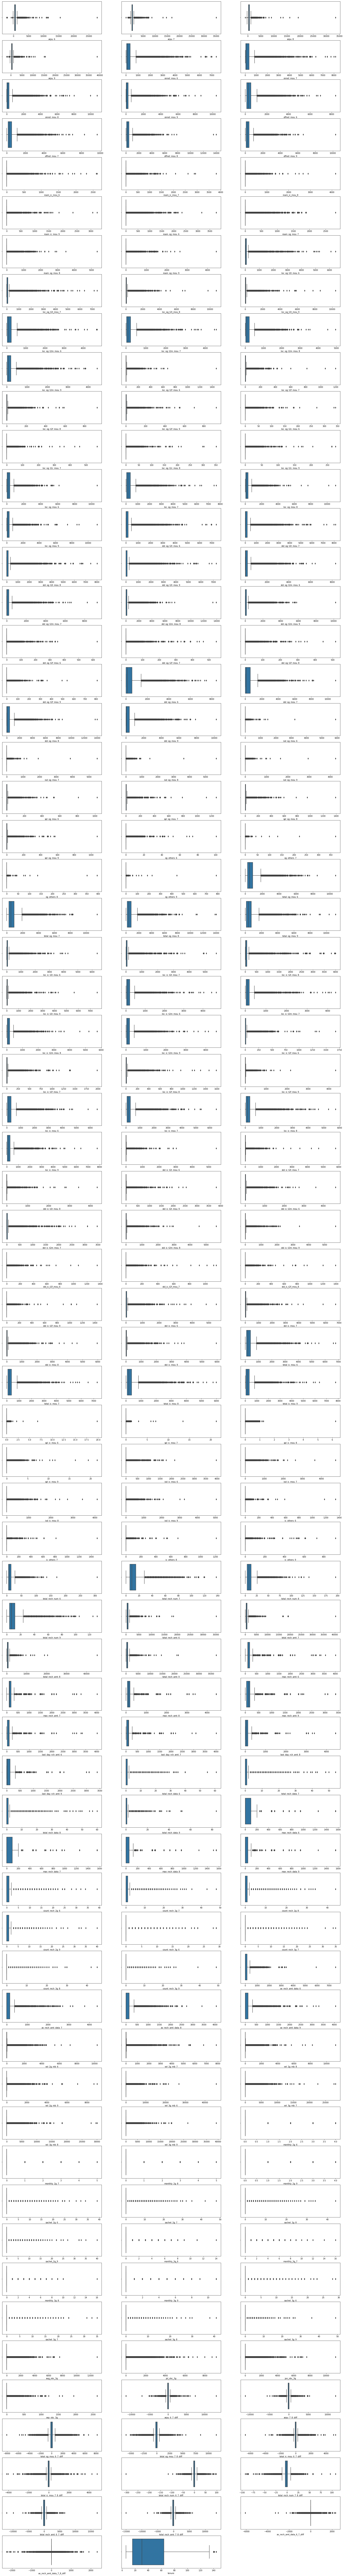

In [47]:
# Visualising the outliers through boxplots

cols_7 = ['arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 
          'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9', 
          'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 
          'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 
          'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9', 
          'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6', 'loc_og_mou_7', 
          'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2t_mou_9', 
          'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2m_mou_9', 'std_og_t2f_mou_6', 
          'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2f_mou_9', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 
          'std_og_mou_9', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'isd_og_mou_9', 'spl_og_mou_6', 'spl_og_mou_7', 
          'spl_og_mou_8', 'spl_og_mou_9', 'og_others_6', 'og_others_7', 'og_others_8', 'og_others_9', 'total_og_mou_6', 
          'total_og_mou_7', 'total_og_mou_8', 'total_og_mou_9', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 
          'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2m_mou_9', 
          'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'loc_ic_t2f_mou_9', 'loc_ic_mou_6', 'loc_ic_mou_7', 
          'loc_ic_mou_8', 'loc_ic_mou_9', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2t_mou_9', 
          'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_6', 
          'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'std_ic_t2f_mou_9', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 
          'std_ic_mou_9', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_ic_mou_9', 'spl_ic_mou_6', 
          'spl_ic_mou_7', 'spl_ic_mou_8', 'spl_ic_mou_9', 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8', 'isd_ic_mou_9', 
          'ic_others_6', 'ic_others_7', 'ic_others_8', 'ic_others_9', 'total_rech_num_6', 'total_rech_num_7', 
          'total_rech_num_8', 'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 
          'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9', 'last_day_rch_amt_6', 
          'last_day_rch_amt_7', 'last_day_rch_amt_8', 'last_day_rch_amt_9', 'total_rech_data_6', 'total_rech_data_7', 
          'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9', 
          'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7', 
          'count_rech_3g_8', 'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 
          'av_rech_amt_data_9', 'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_2g_mb_9', 'vol_3g_mb_6', 'vol_3g_mb_7', 
          'vol_3g_mb_8', 'vol_3g_mb_9', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'monthly_2g_9', 'sachet_2g_6', 
          'sachet_2g_7', 'sachet_2g_8', 'sachet_2g_9', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'monthly_3g_9', 
          'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'sachet_3g_9', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g', 
          'arpu_6_7_diff', 'arpu_7_8_diff', 'total_og_mou_6_7_diff', 'total_og_mou_7_8_diff', 'total_ic_mou_6_7_diff', 
          'total_ic_mou_7_8_diff', 'total_rech_num_6_7_diff', 'total_rech_num_7_8_diff', 'total_rech_amt_6_7_diff', 
          'total_rech_amt_7_8_diff', 'av_rech_amt_data_6_7_diff', 'av_rech_amt_data_7_8_diff', 'tenure']

plt.figure(figsize = (30,700))

for i in enumerate(cols_7): 
    ax = plt.subplot(len(cols_7), 3, i[0]+1)
    sns.boxplot(x = i[1], data = telecom)

**From the above boxplots, except for a few columns like 'monthly_2g' and 'monthly_3g'; 'sachet_2g' and 'sachet_3g', all others have outliers. Lets cap them and move on to further analysis.**

In [48]:
# Capping the outliers to 0.1 and 0.99 for Q1 and Q4 respectively

cols_8 = ['arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 
          'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9', 
          'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 
          'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 
          'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9', 
          'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6', 'loc_og_mou_7', 
          'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2t_mou_9', 
          'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2m_mou_9', 'std_og_t2f_mou_6', 
          'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2f_mou_9', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 
          'std_og_mou_9', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'isd_og_mou_9', 'spl_og_mou_6', 'spl_og_mou_7', 
          'spl_og_mou_8', 'spl_og_mou_9', 'og_others_6', 'og_others_7', 'og_others_8', 'og_others_9', 'total_og_mou_6', 
          'total_og_mou_7', 'total_og_mou_8', 'total_og_mou_9', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 
          'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2m_mou_9', 
          'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'loc_ic_t2f_mou_9', 'loc_ic_mou_6', 'loc_ic_mou_7', 
          'loc_ic_mou_8', 'loc_ic_mou_9', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2t_mou_9', 
          'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_6', 
          'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'std_ic_t2f_mou_9', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 
          'std_ic_mou_9', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_ic_mou_9', 'spl_ic_mou_6', 
          'spl_ic_mou_7', 'spl_ic_mou_8', 'spl_ic_mou_9', 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8', 'isd_ic_mou_9', 
          'ic_others_6', 'ic_others_7', 'ic_others_8', 'ic_others_9', 'total_rech_num_6', 'total_rech_num_7', 
          'total_rech_num_8', 'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 
          'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9', 'last_day_rch_amt_6', 
          'last_day_rch_amt_7', 'last_day_rch_amt_8', 'last_day_rch_amt_9', 'total_rech_data_6', 'total_rech_data_7', 
          'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9', 
          'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7', 
          'count_rech_3g_8', 'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 
          'av_rech_amt_data_9', 'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_2g_mb_9', 'vol_3g_mb_6', 'vol_3g_mb_7', 
          'vol_3g_mb_8', 'vol_3g_mb_9', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g', 'arpu_6_7_diff', 
          'arpu_7_8_diff', 'total_og_mou_6_7_diff', 'total_og_mou_7_8_diff', 'total_ic_mou_6_7_diff', 'total_ic_mou_7_8_diff', 
          'total_rech_num_6_7_diff', 'total_rech_num_7_8_diff', 'total_rech_amt_6_7_diff', 'total_rech_amt_7_8_diff', 
          'av_rech_amt_data_6_7_diff', 'av_rech_amt_data_7_8_diff', 'tenure']

for i in cols_8:
    Q1 = telecom[i].quantile(0.01)
    telecom[i][telecom[i] <= Q1] = Q1
    
    Q4 = telecom[i].quantile(0.99)
    telecom[i][telecom[i] >= Q4] = Q4

## Skewness of the variables

Lets check the skewness and drop those variables which have high data imbalance so that our model will not be biased.

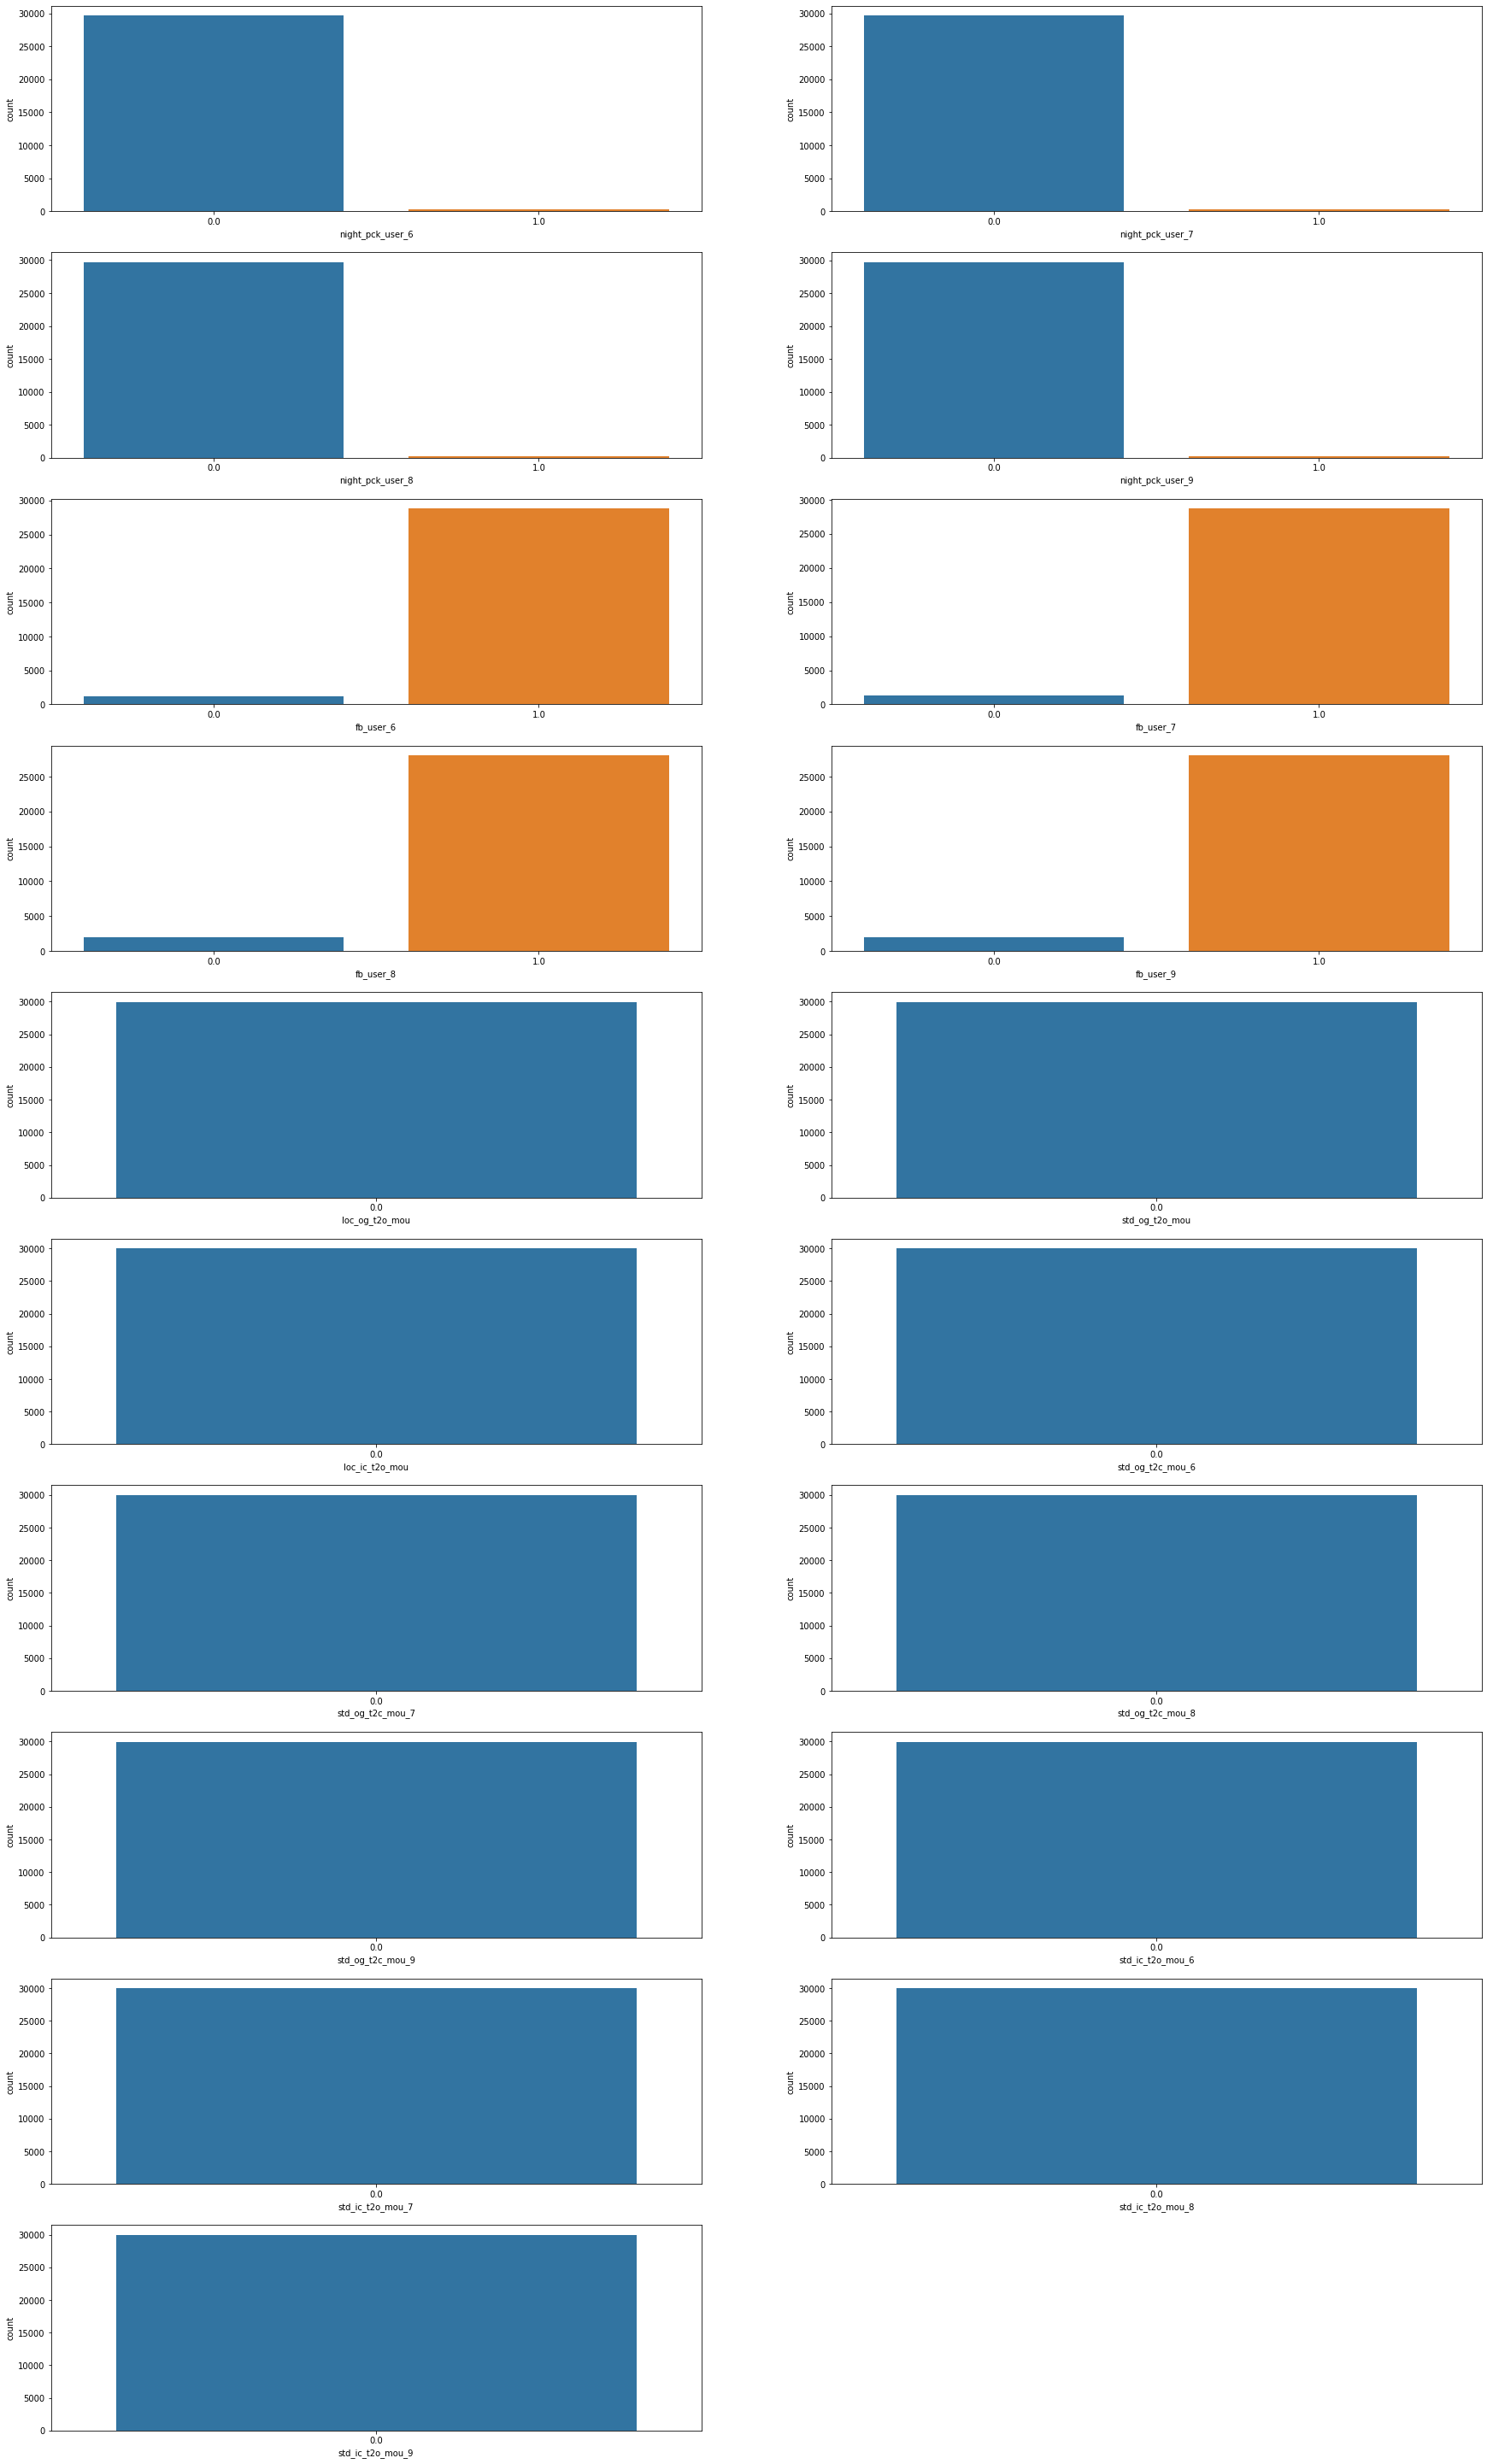

In [49]:
# We have subsetted the categorical columns in the variable 'cols_5'

plt.figure(figsize = (30,100))

for i in enumerate(cols_5): 
    ax = plt.subplot(len(cols_5), 2, i[0]+1)
    sns.countplot(x = i[1], data = telecom)

**From the above plots its clear that the following variables are having huge data imbalance. Lets drop them and move on to further analysis.**
- night_pck_user_6
- night_pck_user_7
- night_pck_user_8
- night_pck_user_9
- fb_user_6
- fb_user_7
- fb_user_8
- fb_user_9
- loc_og_t2o_mou
- std_og_t2o_mou
- loc_ic_t2o_mou
- std_og_t2c_mou_6
- std_og_t2c_mou_7
- std_og_t2c_mou_8
- std_og_t2c_mou_9
- std_ic_t2o_mou_6
- std_ic_t2o_mou_7
- std_ic_t2o_mou_8
- std_ic_t2o_mou_9

In [50]:
# We chose to drop the columns 'mobile_number' and 'circle_id' too as they are not of any use

telecom = telecom.drop(['mobile_number', 'circle_id', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 
                        'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9', 'loc_og_t2o_mou', 
                        'std_og_t2o_mou', 'loc_ic_t2o_mou', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 
                        'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9'], 
                         axis = 1)

In [51]:
telecom.shape

(29979, 202)

In [52]:
# Counting the number of customers who have churned

(telecom['churn'] == 1).sum()

2589

In [53]:
# Counting the number of customers who have not churned

(telecom['churn'] == 0).sum()

27390

In [54]:
# Similarly checking the data imbalance of the target column

(telecom['churn'] == 0).sum()/(telecom['churn'] == 1).sum()

10.579374275782156

**We have huge data imbalance in our target column. We will handle that later in model building using weight of class technique which allows us to specify the paramater 'class_weight = balanced' in our classification models.**

In [55]:
cols_9 = telecom.select_dtypes(include = ['int64', 'float64']).columns

In [56]:
# Visualising the distribution of continuous variables

def num_viz(telecom, column):
    
    telecom = telecom
    column = column
    
    sns.set_style('whitegrid')
    sns.distplot(telecom[column])
    plt.show()

Plotting  arpu_6


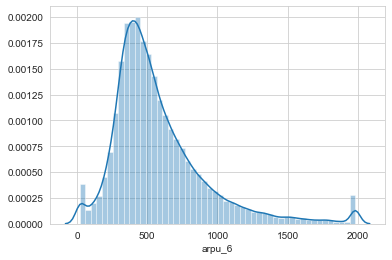

----------------------------------------------------------------------------------------------
Plotting  arpu_7


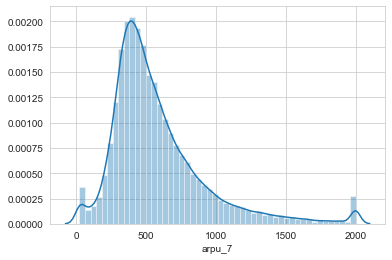

----------------------------------------------------------------------------------------------
Plotting  arpu_8


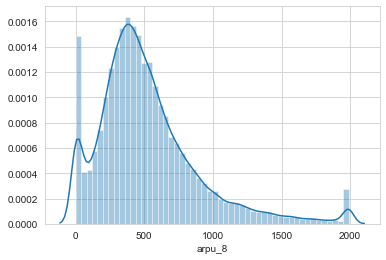

----------------------------------------------------------------------------------------------
Plotting  arpu_9


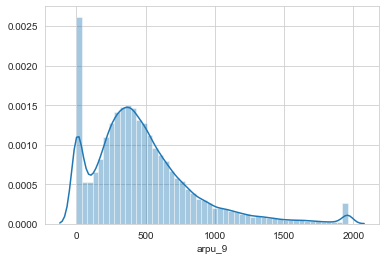

----------------------------------------------------------------------------------------------
Plotting  onnet_mou_6


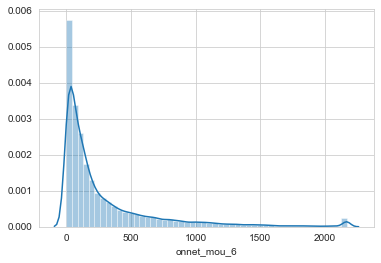

----------------------------------------------------------------------------------------------
Plotting  onnet_mou_7


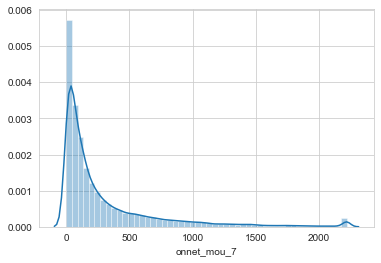

----------------------------------------------------------------------------------------------
Plotting  onnet_mou_8


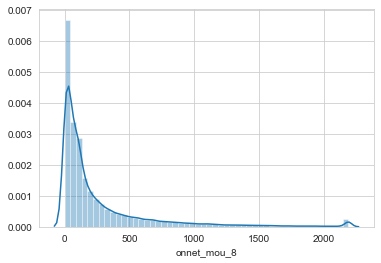

----------------------------------------------------------------------------------------------
Plotting  onnet_mou_9


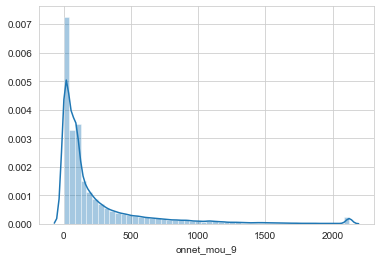

----------------------------------------------------------------------------------------------
Plotting  offnet_mou_6


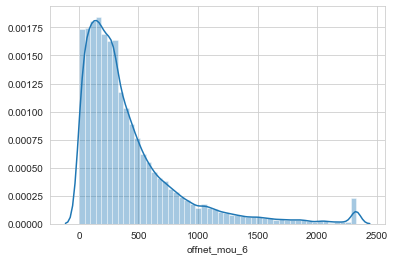

----------------------------------------------------------------------------------------------
Plotting  offnet_mou_7


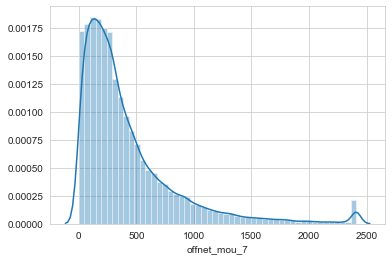

----------------------------------------------------------------------------------------------
Plotting  offnet_mou_8


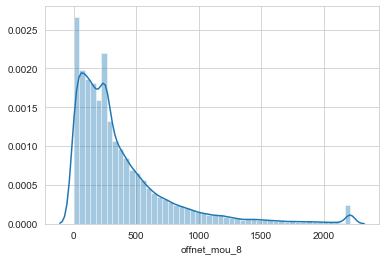

----------------------------------------------------------------------------------------------
Plotting  offnet_mou_9


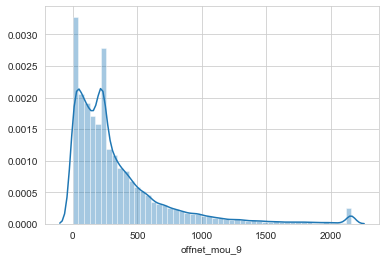

----------------------------------------------------------------------------------------------
Plotting  roam_ic_mou_6


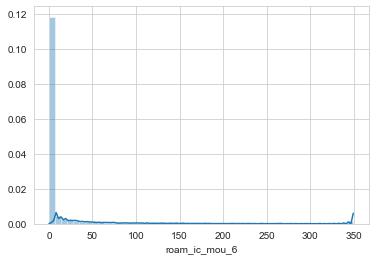

----------------------------------------------------------------------------------------------
Plotting  roam_ic_mou_7


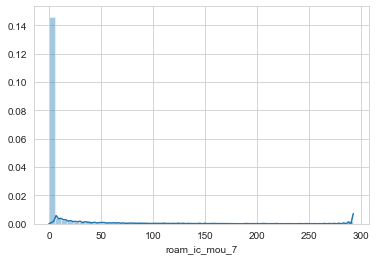

----------------------------------------------------------------------------------------------
Plotting  roam_ic_mou_8


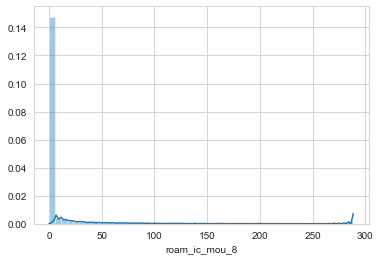

----------------------------------------------------------------------------------------------
Plotting  roam_ic_mou_9


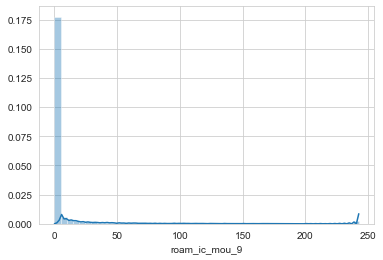

----------------------------------------------------------------------------------------------
Plotting  roam_og_mou_6


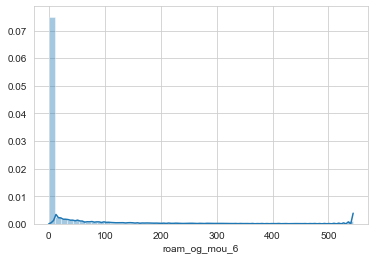

----------------------------------------------------------------------------------------------
Plotting  roam_og_mou_7


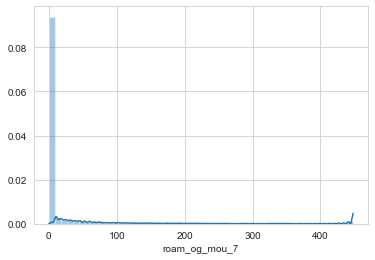

----------------------------------------------------------------------------------------------
Plotting  roam_og_mou_8


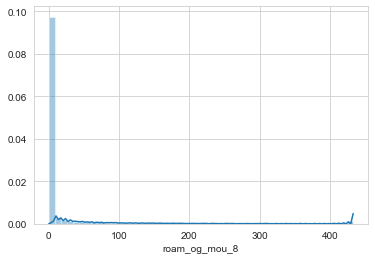

----------------------------------------------------------------------------------------------
Plotting  roam_og_mou_9


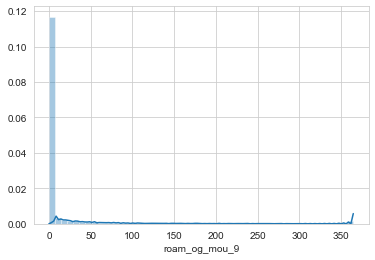

----------------------------------------------------------------------------------------------
Plotting  loc_og_t2t_mou_6


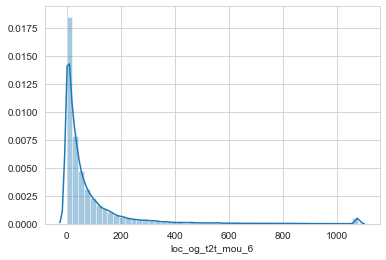

----------------------------------------------------------------------------------------------
Plotting  loc_og_t2t_mou_7


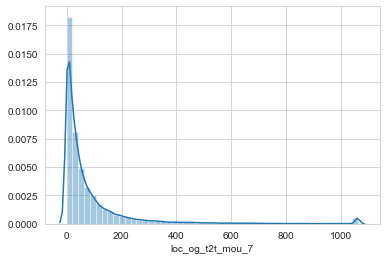

----------------------------------------------------------------------------------------------
Plotting  loc_og_t2t_mou_8


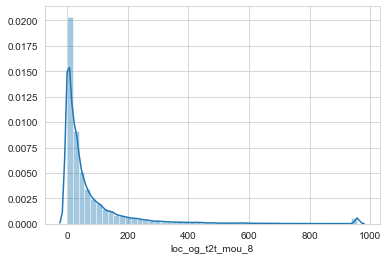

----------------------------------------------------------------------------------------------
Plotting  loc_og_t2t_mou_9


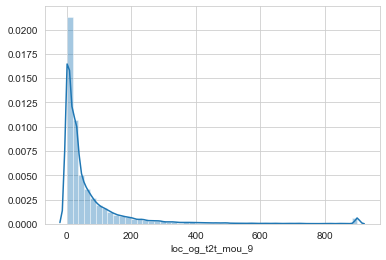

----------------------------------------------------------------------------------------------
Plotting  loc_og_t2m_mou_6


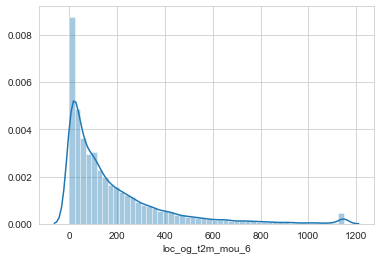

----------------------------------------------------------------------------------------------
Plotting  loc_og_t2m_mou_7


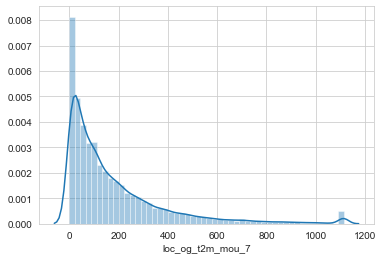

----------------------------------------------------------------------------------------------
Plotting  loc_og_t2m_mou_8


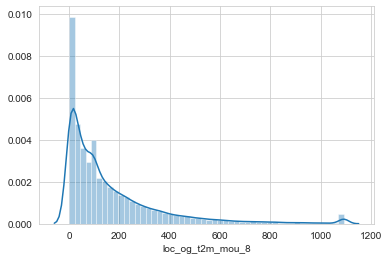

----------------------------------------------------------------------------------------------
Plotting  loc_og_t2m_mou_9


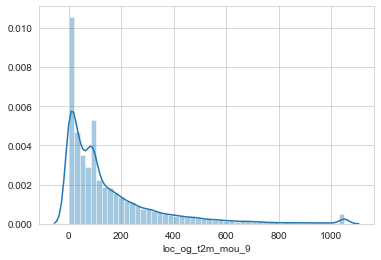

----------------------------------------------------------------------------------------------
Plotting  loc_og_t2f_mou_6


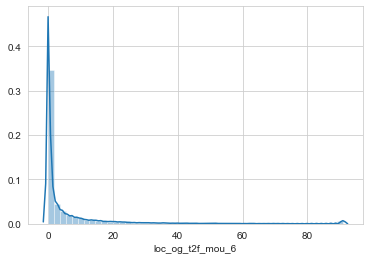

----------------------------------------------------------------------------------------------
Plotting  loc_og_t2f_mou_7


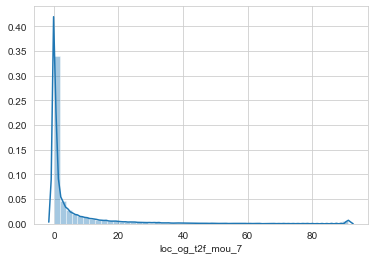

----------------------------------------------------------------------------------------------
Plotting  loc_og_t2f_mou_8


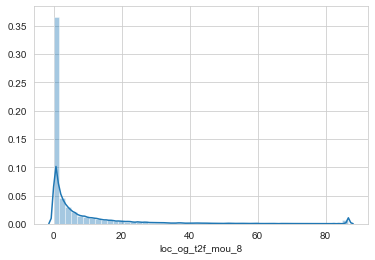

----------------------------------------------------------------------------------------------
Plotting  loc_og_t2f_mou_9


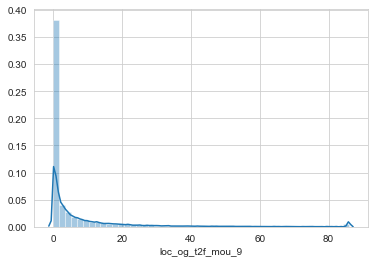

----------------------------------------------------------------------------------------------
Plotting  loc_og_t2c_mou_6


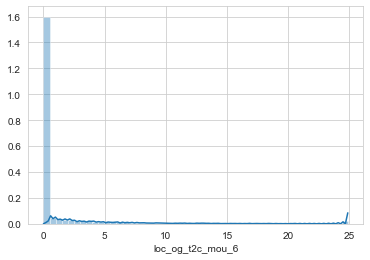

----------------------------------------------------------------------------------------------
Plotting  loc_og_t2c_mou_7


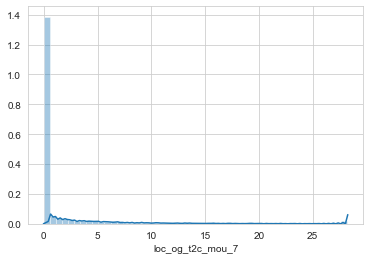

----------------------------------------------------------------------------------------------
Plotting  loc_og_t2c_mou_8


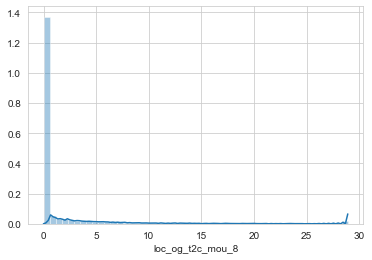

----------------------------------------------------------------------------------------------
Plotting  loc_og_t2c_mou_9


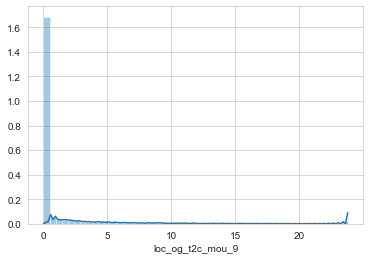

----------------------------------------------------------------------------------------------
Plotting  loc_og_mou_6


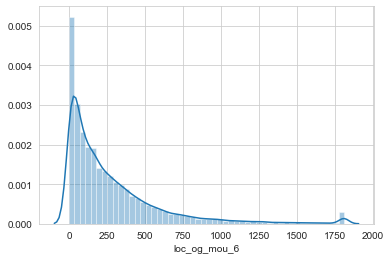

----------------------------------------------------------------------------------------------
Plotting  loc_og_mou_7


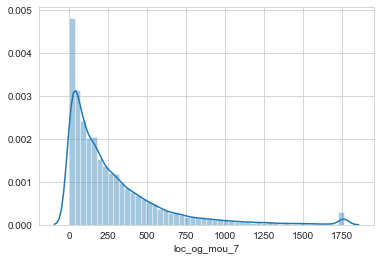

----------------------------------------------------------------------------------------------
Plotting  loc_og_mou_8


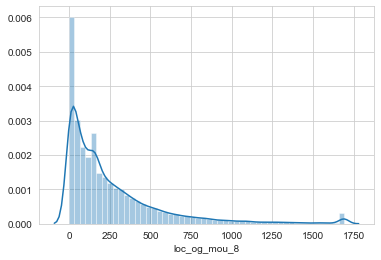

----------------------------------------------------------------------------------------------
Plotting  loc_og_mou_9


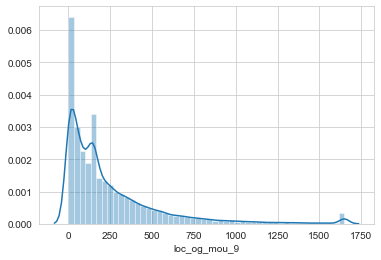

----------------------------------------------------------------------------------------------
Plotting  std_og_t2t_mou_6


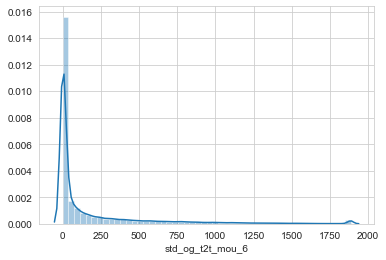

----------------------------------------------------------------------------------------------
Plotting  std_og_t2t_mou_7


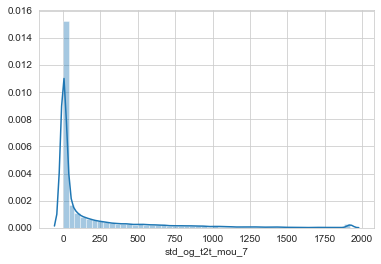

----------------------------------------------------------------------------------------------
Plotting  std_og_t2t_mou_8


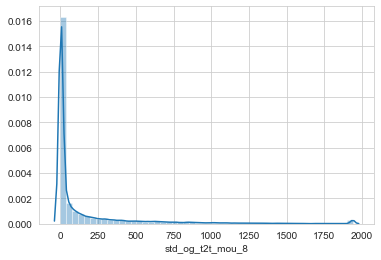

----------------------------------------------------------------------------------------------
Plotting  std_og_t2t_mou_9


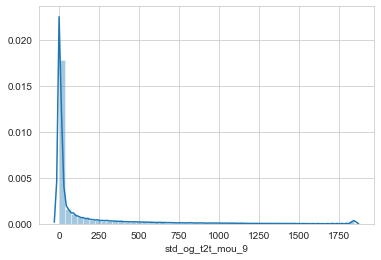

----------------------------------------------------------------------------------------------
Plotting  std_og_t2m_mou_6


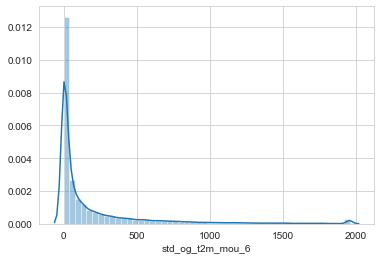

----------------------------------------------------------------------------------------------
Plotting  std_og_t2m_mou_7


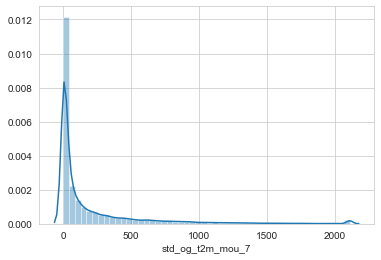

----------------------------------------------------------------------------------------------
Plotting  std_og_t2m_mou_8


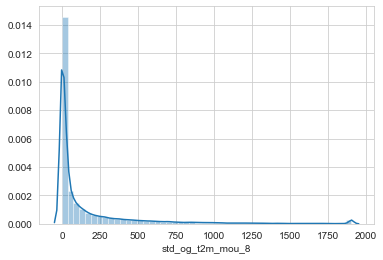

----------------------------------------------------------------------------------------------
Plotting  std_og_t2m_mou_9


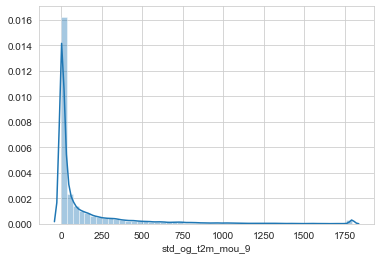

----------------------------------------------------------------------------------------------
Plotting  std_og_t2f_mou_6


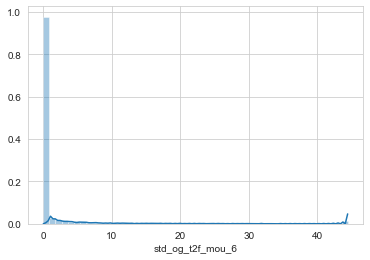

----------------------------------------------------------------------------------------------
Plotting  std_og_t2f_mou_7


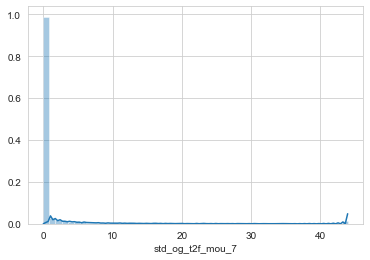

----------------------------------------------------------------------------------------------
Plotting  std_og_t2f_mou_8


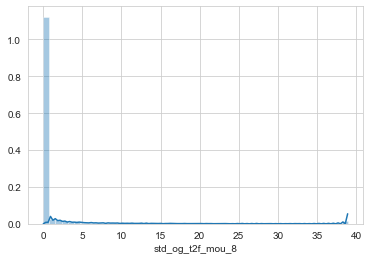

----------------------------------------------------------------------------------------------
Plotting  std_og_t2f_mou_9


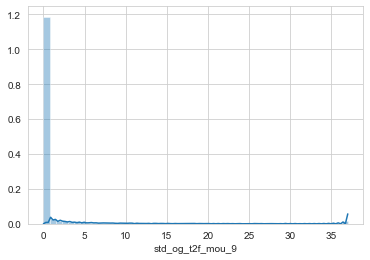

----------------------------------------------------------------------------------------------
Plotting  std_og_mou_6


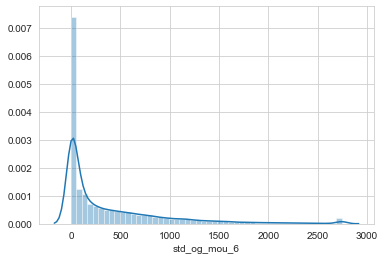

----------------------------------------------------------------------------------------------
Plotting  std_og_mou_7


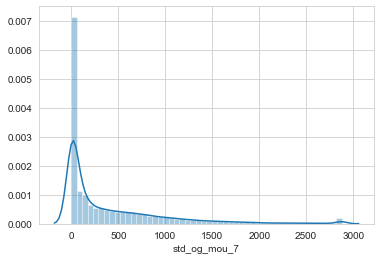

----------------------------------------------------------------------------------------------
Plotting  std_og_mou_8


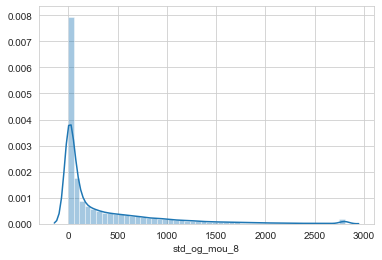

----------------------------------------------------------------------------------------------
Plotting  std_og_mou_9


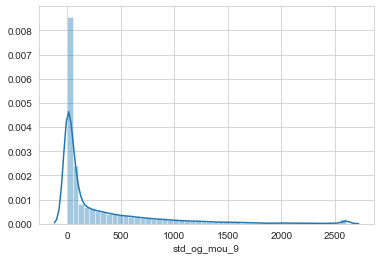

----------------------------------------------------------------------------------------------
Plotting  isd_og_mou_6


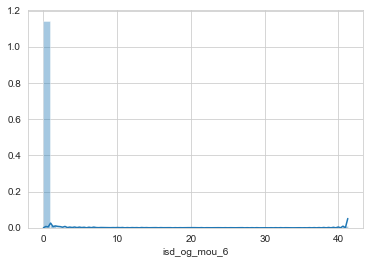

----------------------------------------------------------------------------------------------
Plotting  isd_og_mou_7


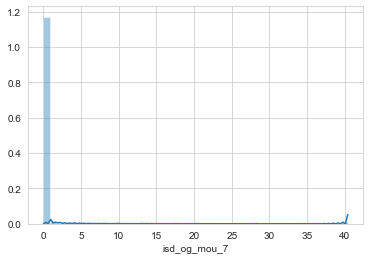

----------------------------------------------------------------------------------------------
Plotting  isd_og_mou_8


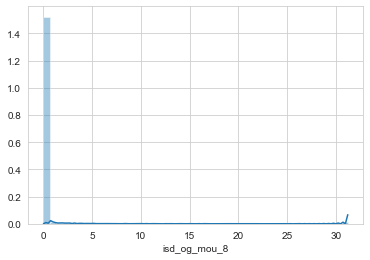

----------------------------------------------------------------------------------------------
Plotting  isd_og_mou_9


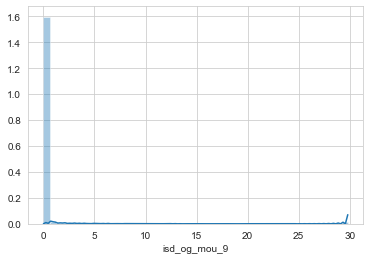

----------------------------------------------------------------------------------------------
Plotting  spl_og_mou_6


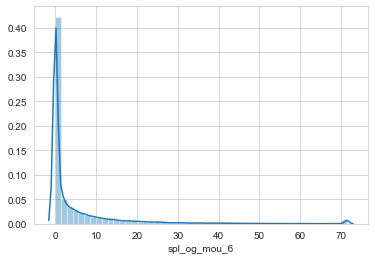

----------------------------------------------------------------------------------------------
Plotting  spl_og_mou_7


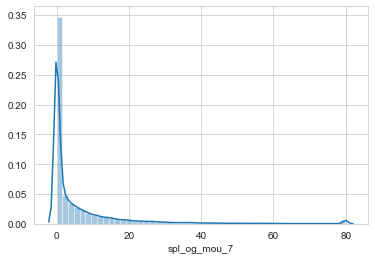

----------------------------------------------------------------------------------------------
Plotting  spl_og_mou_8


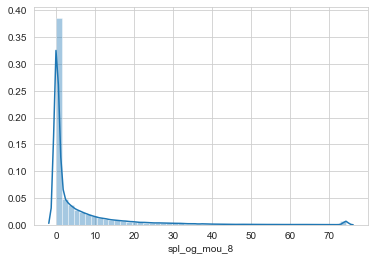

----------------------------------------------------------------------------------------------
Plotting  spl_og_mou_9


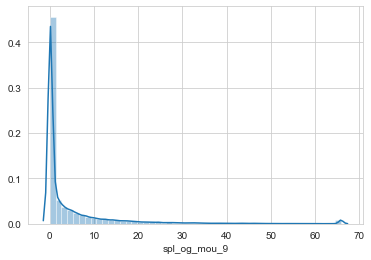

----------------------------------------------------------------------------------------------
Plotting  og_others_6


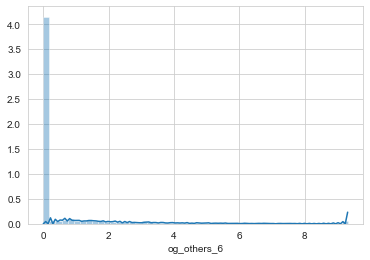

----------------------------------------------------------------------------------------------
Plotting  og_others_7


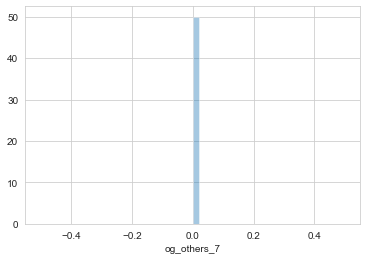

----------------------------------------------------------------------------------------------
Plotting  og_others_8


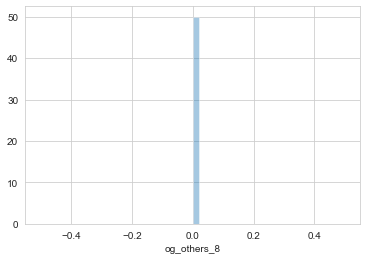

----------------------------------------------------------------------------------------------
Plotting  og_others_9


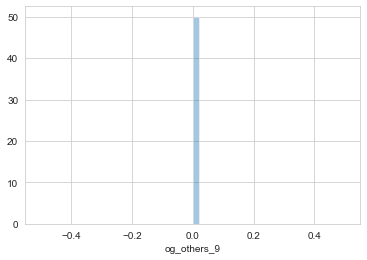

----------------------------------------------------------------------------------------------
Plotting  total_og_mou_6


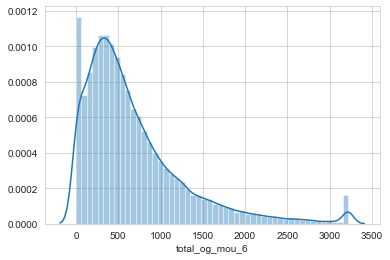

----------------------------------------------------------------------------------------------
Plotting  total_og_mou_7


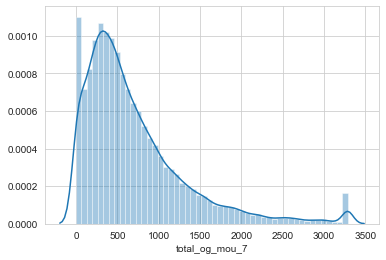

----------------------------------------------------------------------------------------------
Plotting  total_og_mou_8


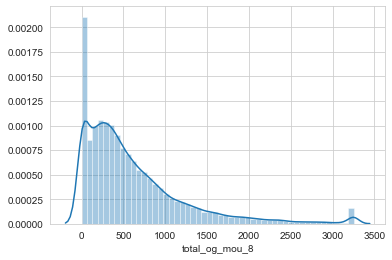

----------------------------------------------------------------------------------------------
Plotting  total_og_mou_9


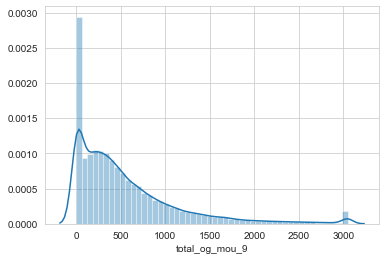

----------------------------------------------------------------------------------------------
Plotting  loc_ic_t2t_mou_6


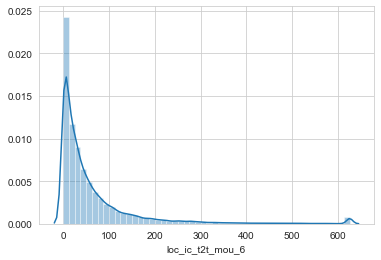

----------------------------------------------------------------------------------------------
Plotting  loc_ic_t2t_mou_7


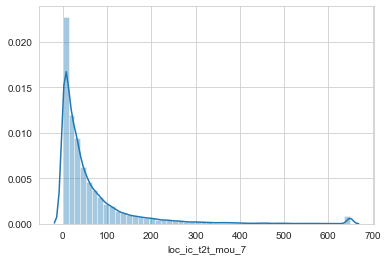

----------------------------------------------------------------------------------------------
Plotting  loc_ic_t2t_mou_8


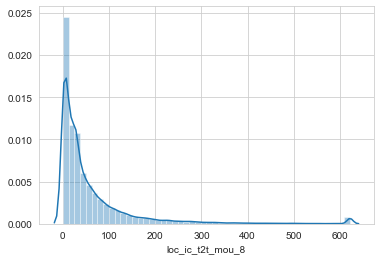

----------------------------------------------------------------------------------------------
Plotting  loc_ic_t2t_mou_9


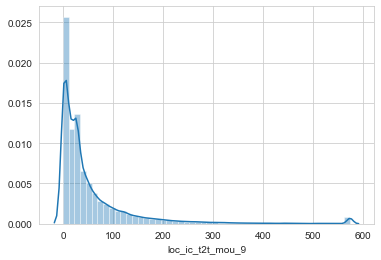

----------------------------------------------------------------------------------------------
Plotting  loc_ic_t2m_mou_6


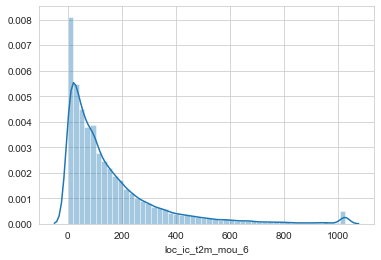

----------------------------------------------------------------------------------------------
Plotting  loc_ic_t2m_mou_7


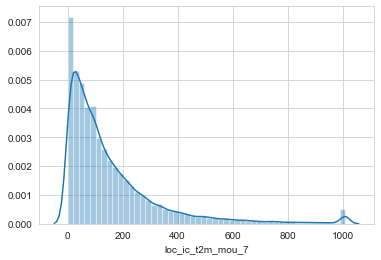

----------------------------------------------------------------------------------------------
Plotting  loc_ic_t2m_mou_8


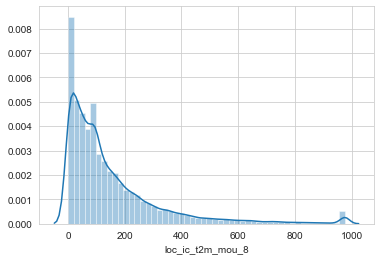

----------------------------------------------------------------------------------------------
Plotting  loc_ic_t2m_mou_9


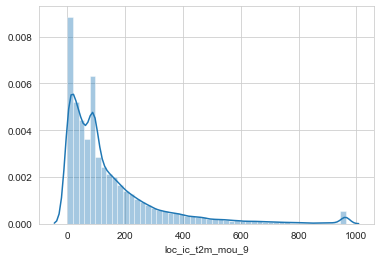

----------------------------------------------------------------------------------------------
Plotting  loc_ic_t2f_mou_6


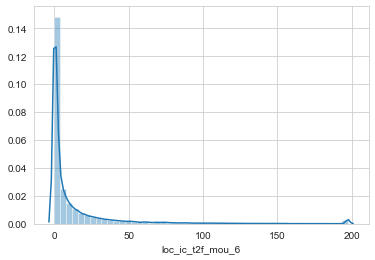

----------------------------------------------------------------------------------------------
Plotting  loc_ic_t2f_mou_7


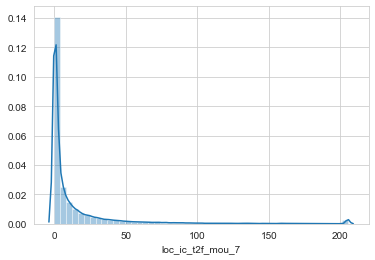

----------------------------------------------------------------------------------------------
Plotting  loc_ic_t2f_mou_8


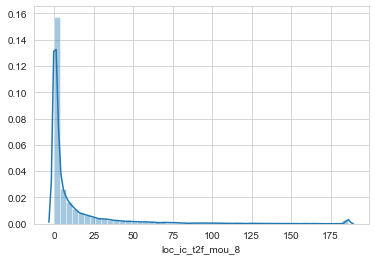

----------------------------------------------------------------------------------------------
Plotting  loc_ic_t2f_mou_9


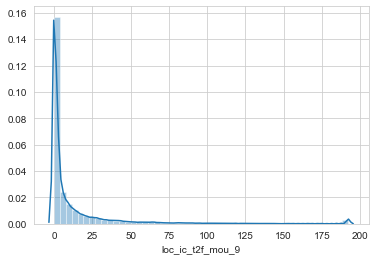

----------------------------------------------------------------------------------------------
Plotting  loc_ic_mou_6


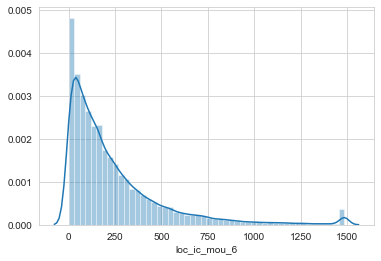

----------------------------------------------------------------------------------------------
Plotting  loc_ic_mou_7


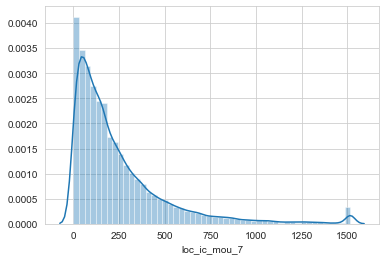

----------------------------------------------------------------------------------------------
Plotting  loc_ic_mou_8


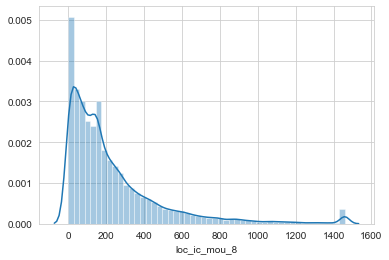

----------------------------------------------------------------------------------------------
Plotting  loc_ic_mou_9


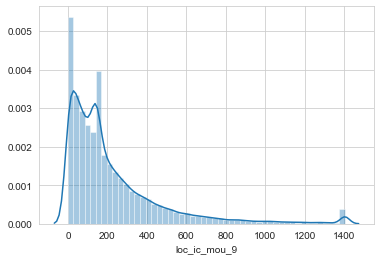

----------------------------------------------------------------------------------------------
Plotting  std_ic_t2t_mou_6


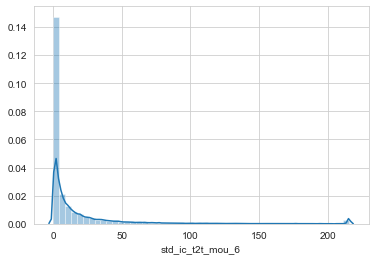

----------------------------------------------------------------------------------------------
Plotting  std_ic_t2t_mou_7


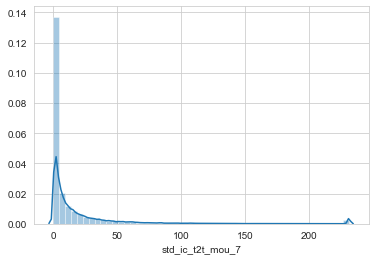

----------------------------------------------------------------------------------------------
Plotting  std_ic_t2t_mou_8


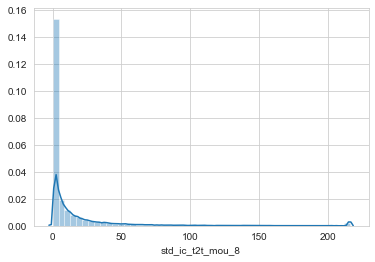

----------------------------------------------------------------------------------------------
Plotting  std_ic_t2t_mou_9


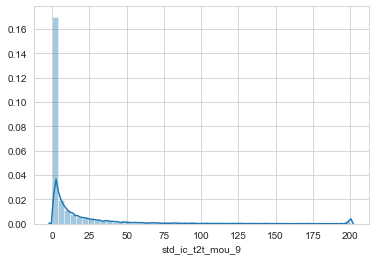

----------------------------------------------------------------------------------------------
Plotting  std_ic_t2m_mou_6


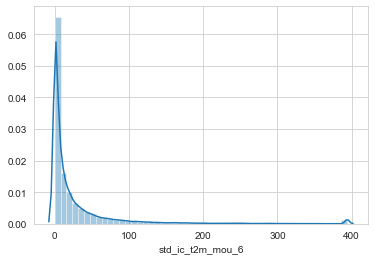

----------------------------------------------------------------------------------------------
Plotting  std_ic_t2m_mou_7


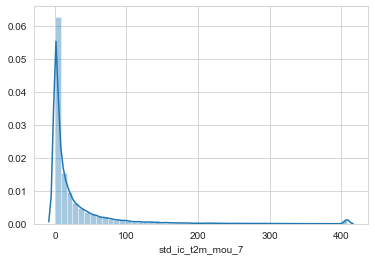

----------------------------------------------------------------------------------------------
Plotting  std_ic_t2m_mou_8


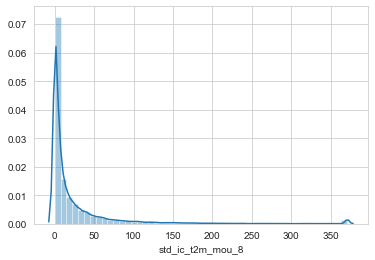

----------------------------------------------------------------------------------------------
Plotting  std_ic_t2m_mou_9


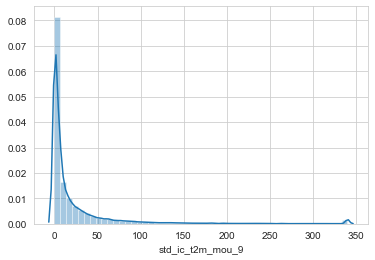

----------------------------------------------------------------------------------------------
Plotting  std_ic_t2f_mou_6


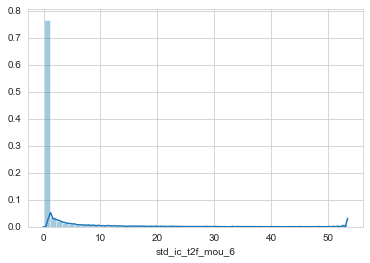

----------------------------------------------------------------------------------------------
Plotting  std_ic_t2f_mou_7


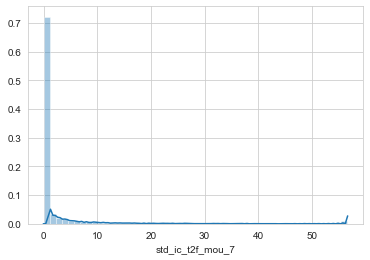

----------------------------------------------------------------------------------------------
Plotting  std_ic_t2f_mou_8


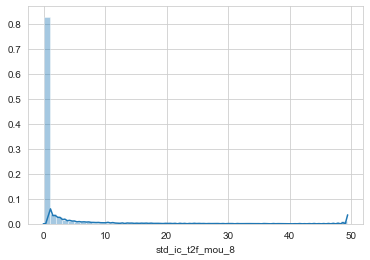

----------------------------------------------------------------------------------------------
Plotting  std_ic_t2f_mou_9


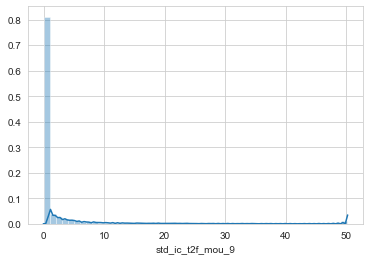

----------------------------------------------------------------------------------------------
Plotting  std_ic_mou_6


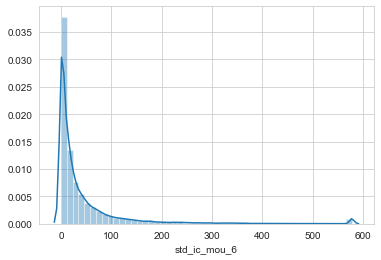

----------------------------------------------------------------------------------------------
Plotting  std_ic_mou_7


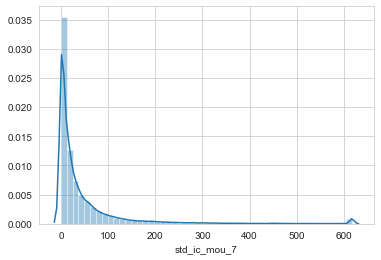

----------------------------------------------------------------------------------------------
Plotting  std_ic_mou_8


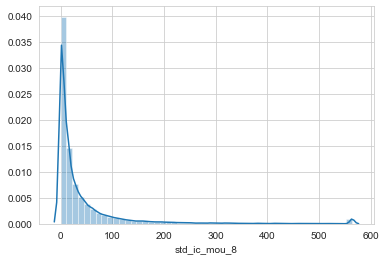

----------------------------------------------------------------------------------------------
Plotting  std_ic_mou_9


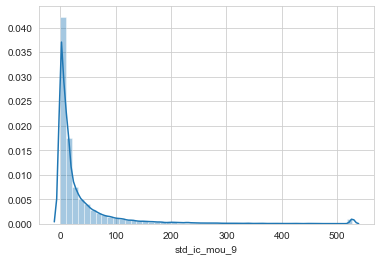

----------------------------------------------------------------------------------------------
Plotting  total_ic_mou_6


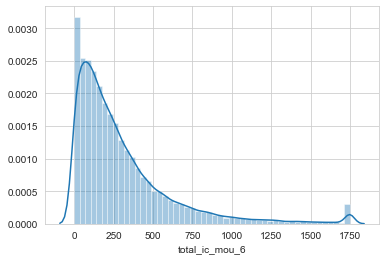

----------------------------------------------------------------------------------------------
Plotting  total_ic_mou_7


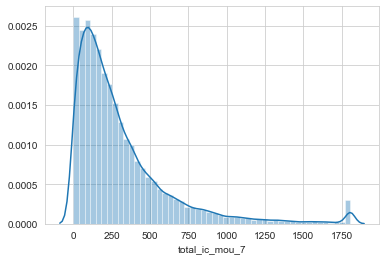

----------------------------------------------------------------------------------------------
Plotting  total_ic_mou_8


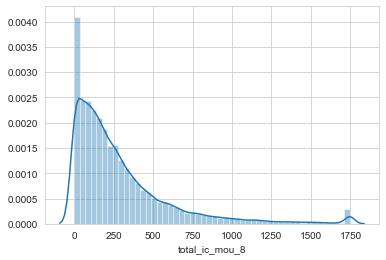

----------------------------------------------------------------------------------------------
Plotting  total_ic_mou_9


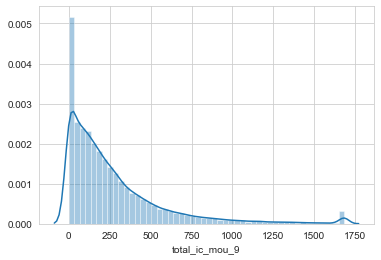

----------------------------------------------------------------------------------------------
Plotting  spl_ic_mou_6


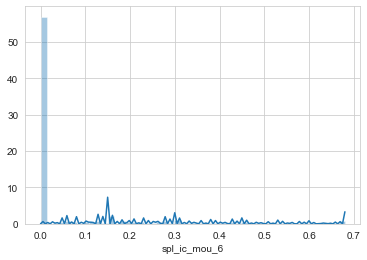

----------------------------------------------------------------------------------------------
Plotting  spl_ic_mou_7


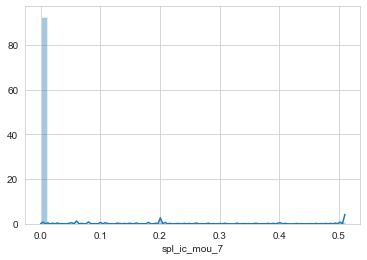

----------------------------------------------------------------------------------------------
Plotting  spl_ic_mou_8


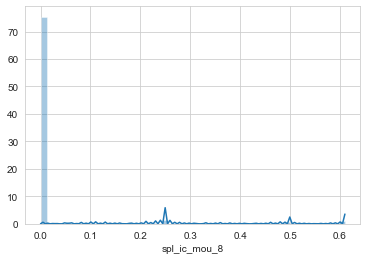

----------------------------------------------------------------------------------------------
Plotting  spl_ic_mou_9


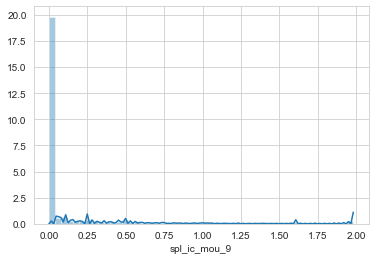

----------------------------------------------------------------------------------------------
Plotting  isd_ic_mou_6


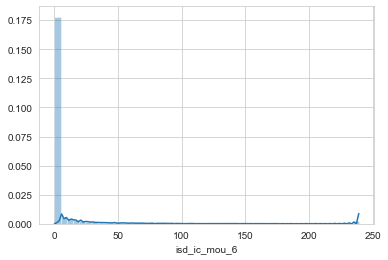

----------------------------------------------------------------------------------------------
Plotting  isd_ic_mou_7


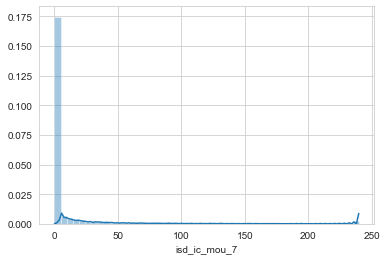

----------------------------------------------------------------------------------------------
Plotting  isd_ic_mou_8


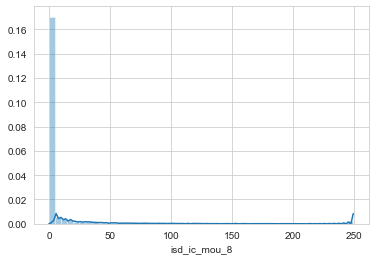

----------------------------------------------------------------------------------------------
Plotting  isd_ic_mou_9


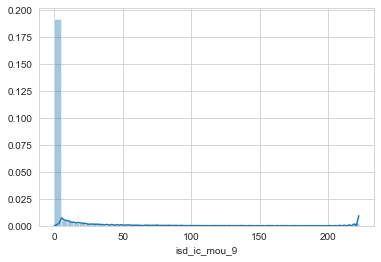

----------------------------------------------------------------------------------------------
Plotting  ic_others_6


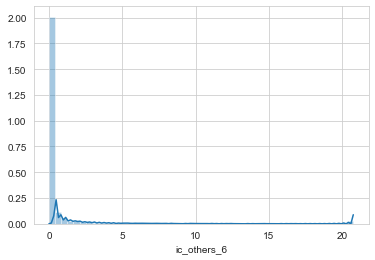

----------------------------------------------------------------------------------------------
Plotting  ic_others_7


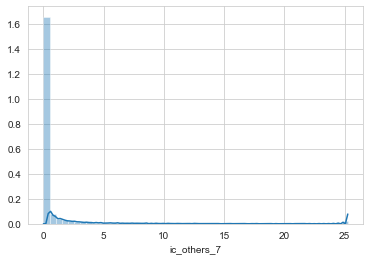

----------------------------------------------------------------------------------------------
Plotting  ic_others_8


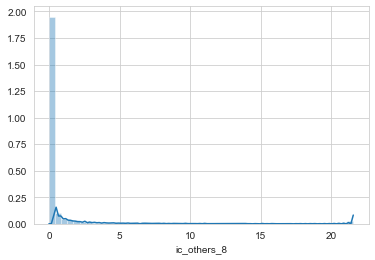

----------------------------------------------------------------------------------------------
Plotting  ic_others_9


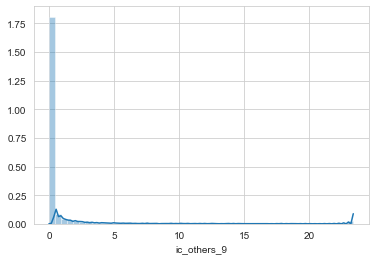

----------------------------------------------------------------------------------------------
Plotting  total_rech_num_6


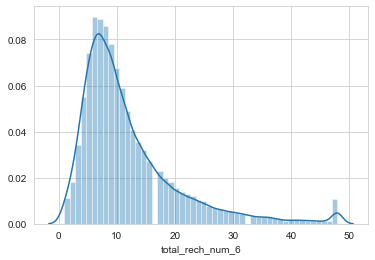

----------------------------------------------------------------------------------------------
Plotting  total_rech_num_7


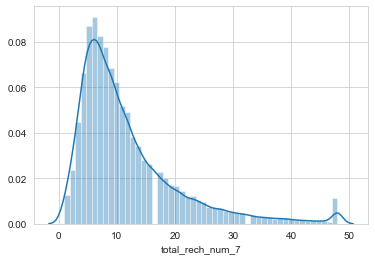

----------------------------------------------------------------------------------------------
Plotting  total_rech_num_8


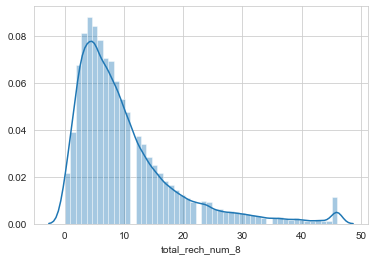

----------------------------------------------------------------------------------------------
Plotting  total_rech_num_9


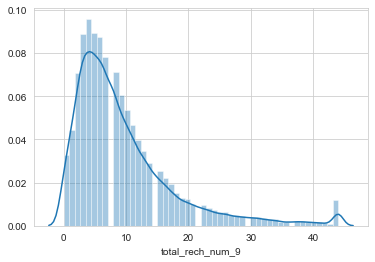

----------------------------------------------------------------------------------------------
Plotting  total_rech_amt_6


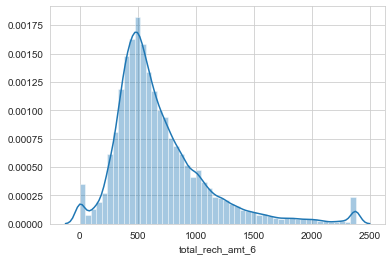

----------------------------------------------------------------------------------------------
Plotting  total_rech_amt_7


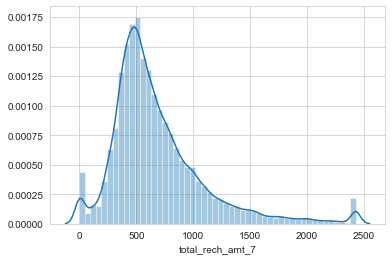

----------------------------------------------------------------------------------------------
Plotting  total_rech_amt_8


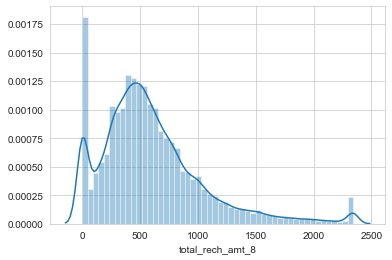

----------------------------------------------------------------------------------------------
Plotting  total_rech_amt_9


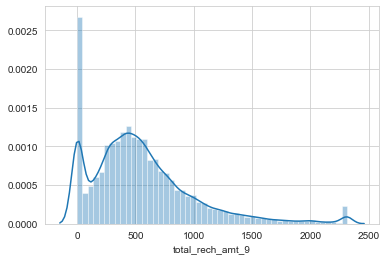

----------------------------------------------------------------------------------------------
Plotting  max_rech_amt_6


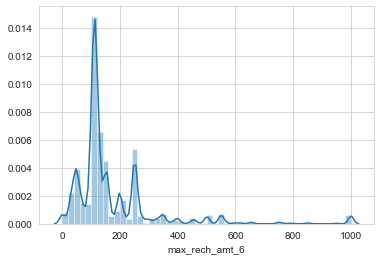

----------------------------------------------------------------------------------------------
Plotting  max_rech_amt_7


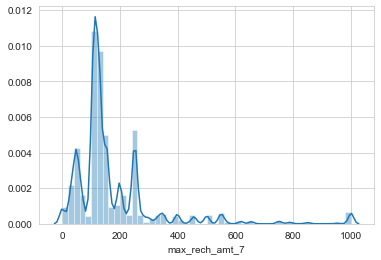

----------------------------------------------------------------------------------------------
Plotting  max_rech_amt_8


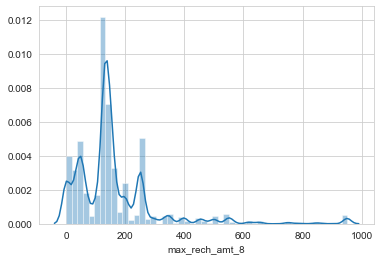

----------------------------------------------------------------------------------------------
Plotting  max_rech_amt_9


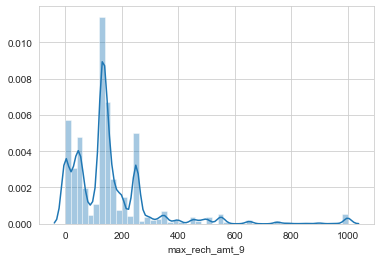

----------------------------------------------------------------------------------------------
Plotting  last_day_rch_amt_6


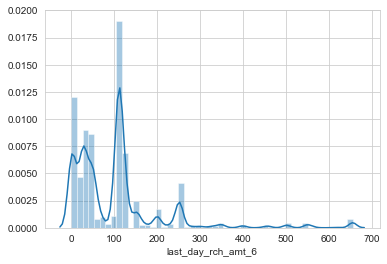

----------------------------------------------------------------------------------------------
Plotting  last_day_rch_amt_7


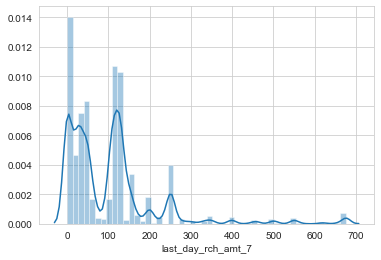

----------------------------------------------------------------------------------------------
Plotting  last_day_rch_amt_8


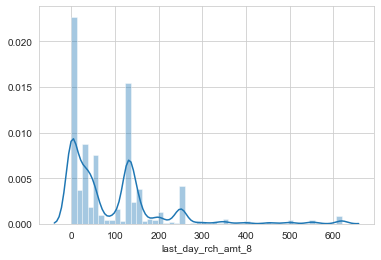

----------------------------------------------------------------------------------------------
Plotting  last_day_rch_amt_9


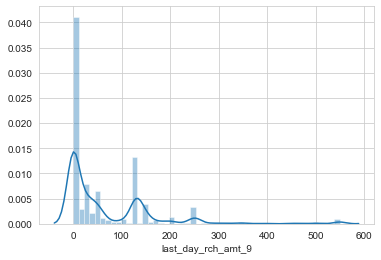

----------------------------------------------------------------------------------------------
Plotting  total_rech_data_6


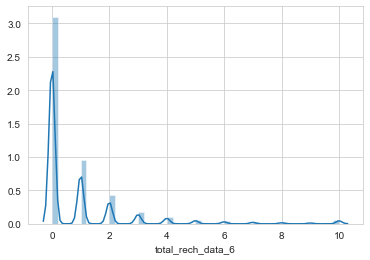

----------------------------------------------------------------------------------------------
Plotting  total_rech_data_7


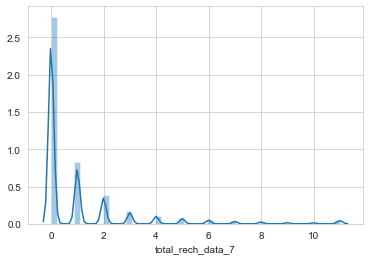

----------------------------------------------------------------------------------------------
Plotting  total_rech_data_8


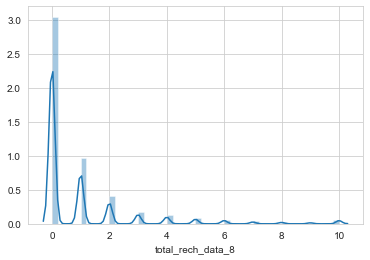

----------------------------------------------------------------------------------------------
Plotting  total_rech_data_9


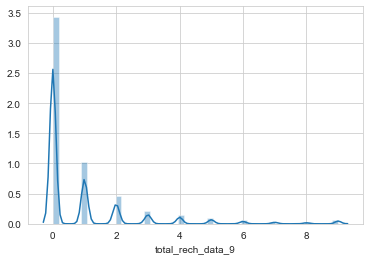

----------------------------------------------------------------------------------------------
Plotting  max_rech_data_6


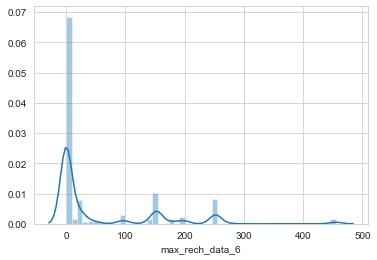

----------------------------------------------------------------------------------------------
Plotting  max_rech_data_7


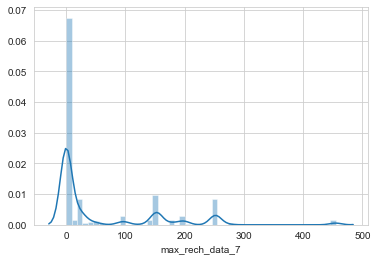

----------------------------------------------------------------------------------------------
Plotting  max_rech_data_8


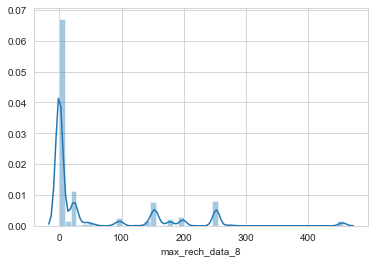

----------------------------------------------------------------------------------------------
Plotting  max_rech_data_9


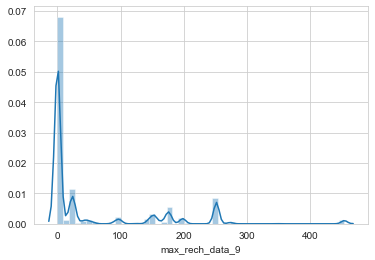

----------------------------------------------------------------------------------------------
Plotting  count_rech_2g_6


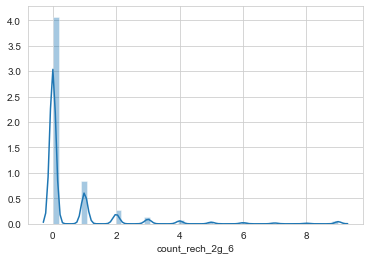

----------------------------------------------------------------------------------------------
Plotting  count_rech_2g_7


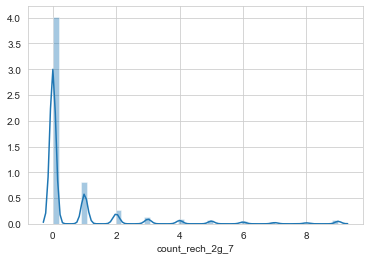

----------------------------------------------------------------------------------------------
Plotting  count_rech_2g_8


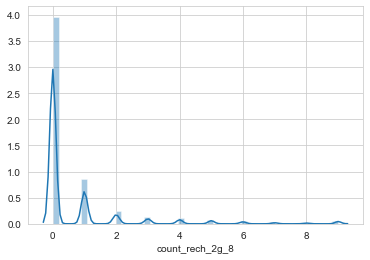

----------------------------------------------------------------------------------------------
Plotting  count_rech_2g_9


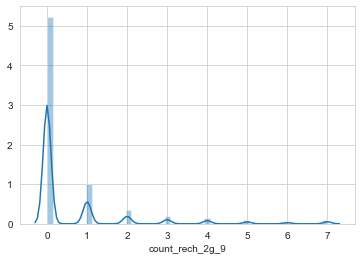

----------------------------------------------------------------------------------------------
Plotting  count_rech_3g_6


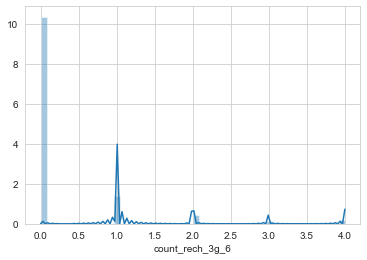

----------------------------------------------------------------------------------------------
Plotting  count_rech_3g_7


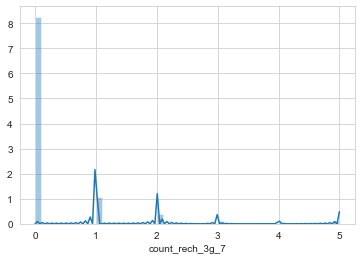

----------------------------------------------------------------------------------------------
Plotting  count_rech_3g_8


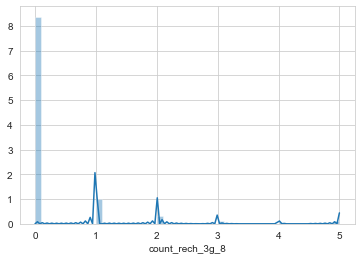

----------------------------------------------------------------------------------------------
Plotting  count_rech_3g_9


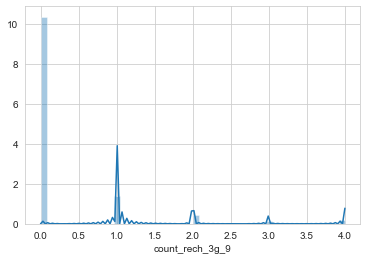

----------------------------------------------------------------------------------------------
Plotting  av_rech_amt_data_6


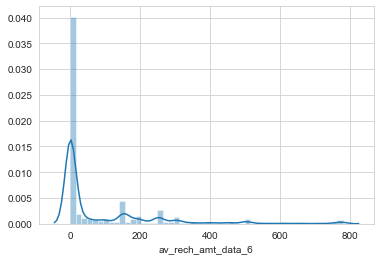

----------------------------------------------------------------------------------------------
Plotting  av_rech_amt_data_7


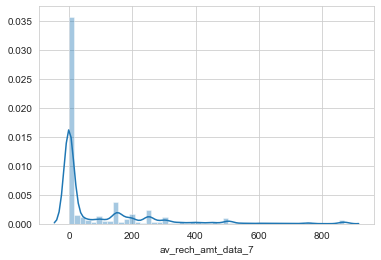

----------------------------------------------------------------------------------------------
Plotting  av_rech_amt_data_8


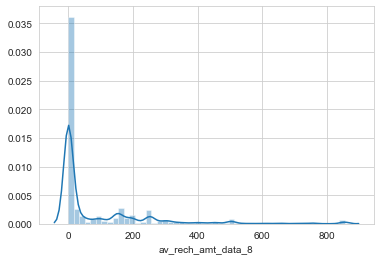

----------------------------------------------------------------------------------------------
Plotting  av_rech_amt_data_9


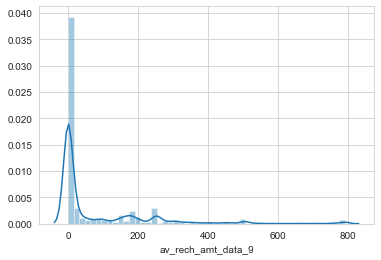

----------------------------------------------------------------------------------------------
Plotting  vol_2g_mb_6


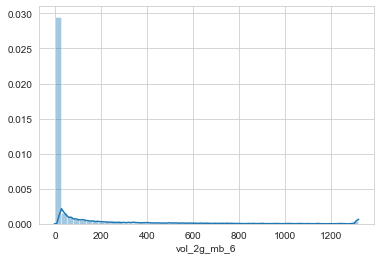

----------------------------------------------------------------------------------------------
Plotting  vol_2g_mb_7


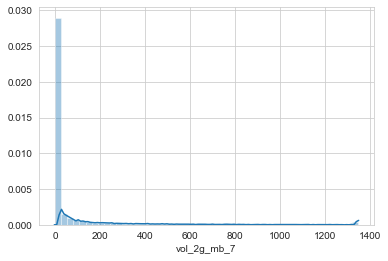

----------------------------------------------------------------------------------------------
Plotting  vol_2g_mb_8


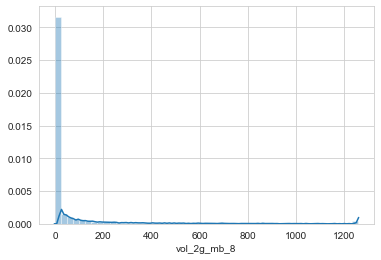

----------------------------------------------------------------------------------------------
Plotting  vol_2g_mb_9


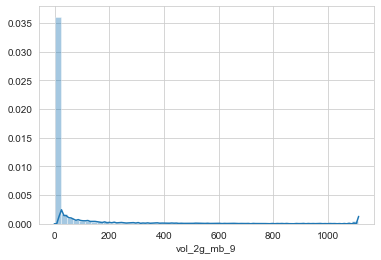

----------------------------------------------------------------------------------------------
Plotting  vol_3g_mb_6


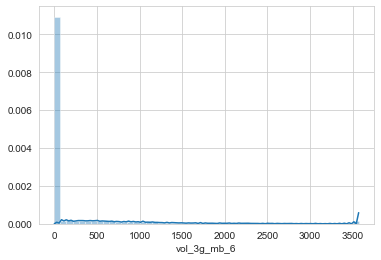

----------------------------------------------------------------------------------------------
Plotting  vol_3g_mb_7


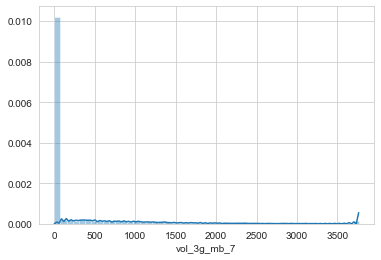

----------------------------------------------------------------------------------------------
Plotting  vol_3g_mb_8


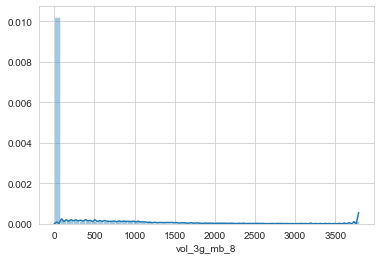

----------------------------------------------------------------------------------------------
Plotting  vol_3g_mb_9


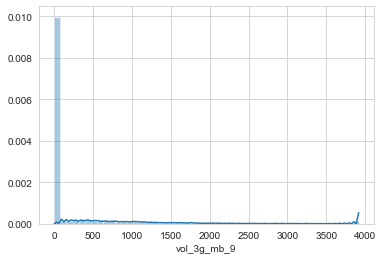

----------------------------------------------------------------------------------------------
Plotting  monthly_2g_6


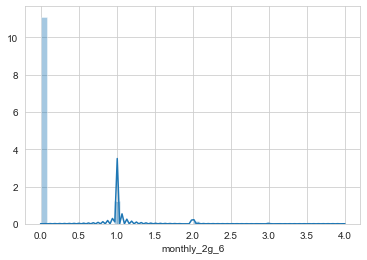

----------------------------------------------------------------------------------------------
Plotting  monthly_2g_7


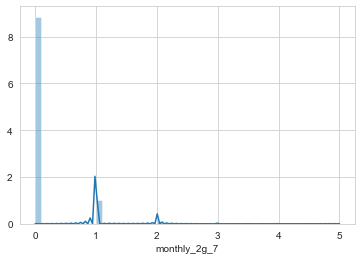

----------------------------------------------------------------------------------------------
Plotting  monthly_2g_8


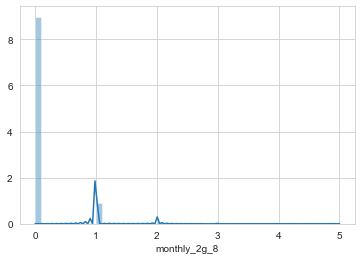

----------------------------------------------------------------------------------------------
Plotting  monthly_2g_9


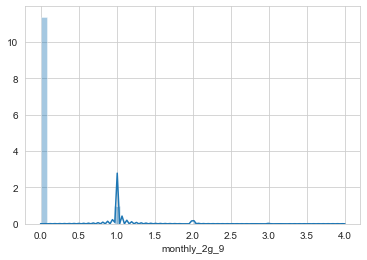

----------------------------------------------------------------------------------------------
Plotting  sachet_2g_6


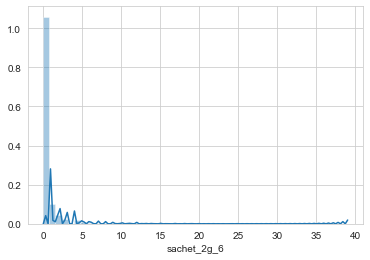

----------------------------------------------------------------------------------------------
Plotting  sachet_2g_7


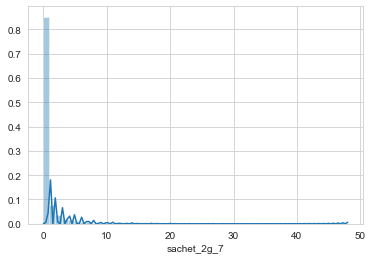

----------------------------------------------------------------------------------------------
Plotting  sachet_2g_8


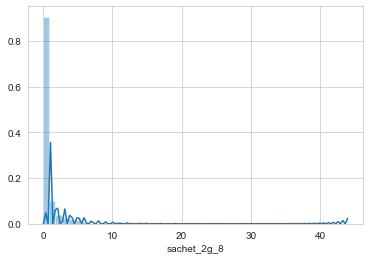

----------------------------------------------------------------------------------------------
Plotting  sachet_2g_9


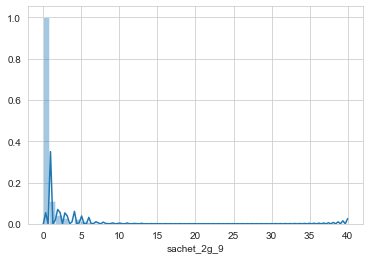

----------------------------------------------------------------------------------------------
Plotting  monthly_3g_6


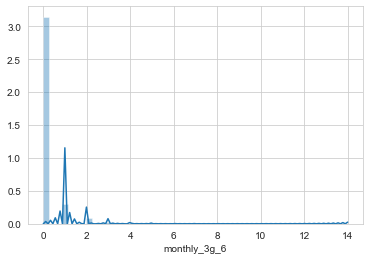

----------------------------------------------------------------------------------------------
Plotting  monthly_3g_7


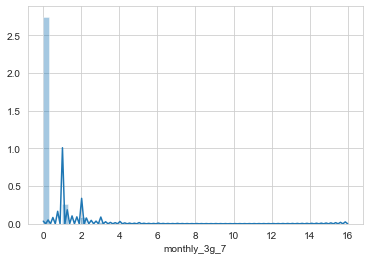

----------------------------------------------------------------------------------------------
Plotting  monthly_3g_8


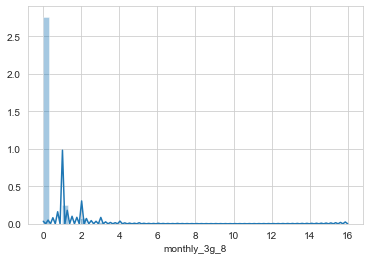

----------------------------------------------------------------------------------------------
Plotting  monthly_3g_9


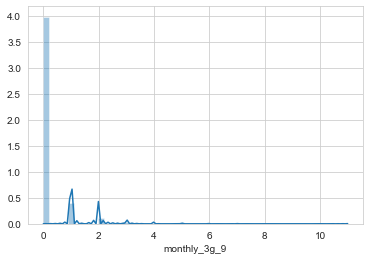

----------------------------------------------------------------------------------------------
Plotting  sachet_3g_6


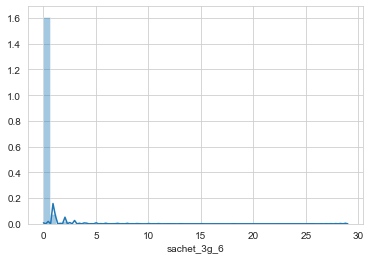

----------------------------------------------------------------------------------------------
Plotting  sachet_3g_7


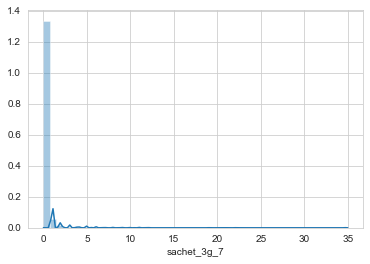

----------------------------------------------------------------------------------------------
Plotting  sachet_3g_8


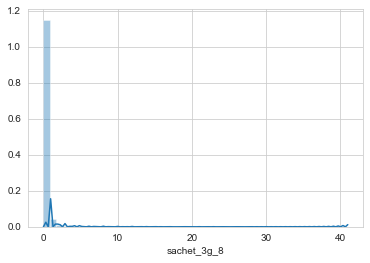

----------------------------------------------------------------------------------------------
Plotting  sachet_3g_9


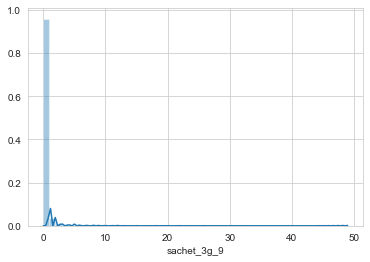

----------------------------------------------------------------------------------------------
Plotting  aon


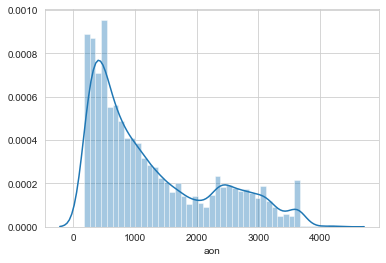

----------------------------------------------------------------------------------------------
Plotting  aug_vbc_3g


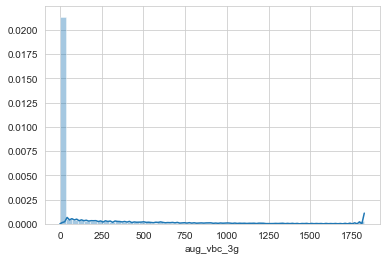

----------------------------------------------------------------------------------------------
Plotting  jul_vbc_3g


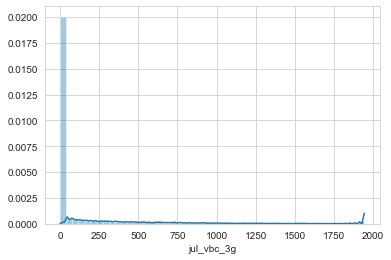

----------------------------------------------------------------------------------------------
Plotting  jun_vbc_3g


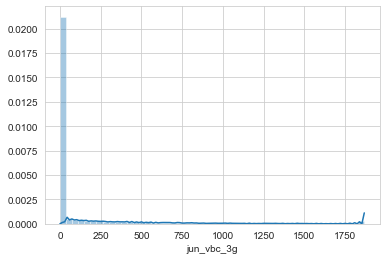

----------------------------------------------------------------------------------------------
Plotting  sep_vbc_3g


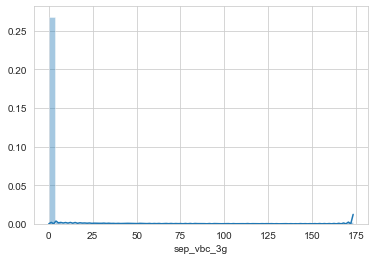

----------------------------------------------------------------------------------------------
Plotting  Good_phase_avg


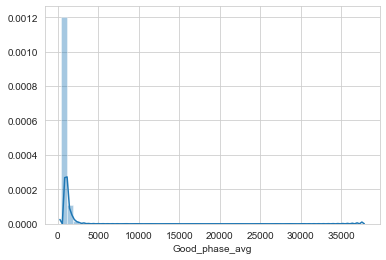

----------------------------------------------------------------------------------------------
Plotting  calls


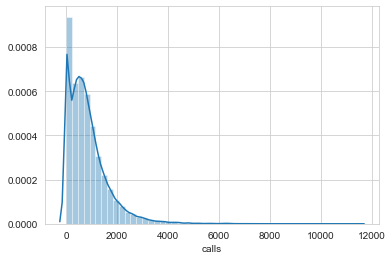

----------------------------------------------------------------------------------------------
Plotting  internet


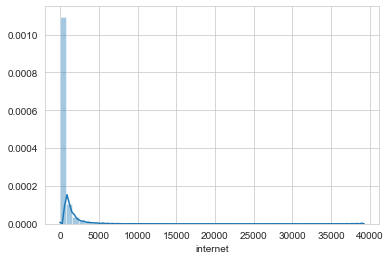

----------------------------------------------------------------------------------------------
Plotting  churn


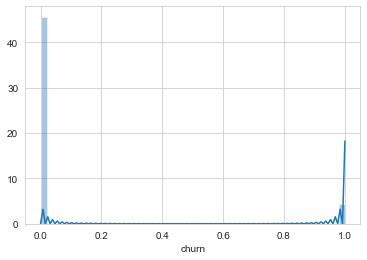

----------------------------------------------------------------------------------------------
Plotting  arpu_6_7_diff


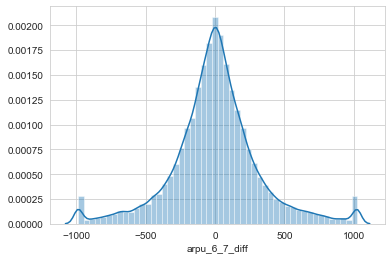

----------------------------------------------------------------------------------------------
Plotting  arpu_7_8_diff


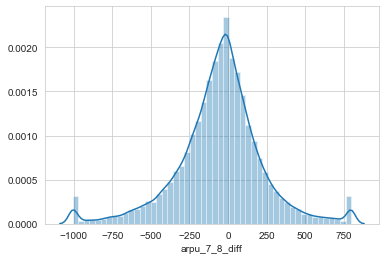

----------------------------------------------------------------------------------------------
Plotting  total_og_mou_6_7_diff


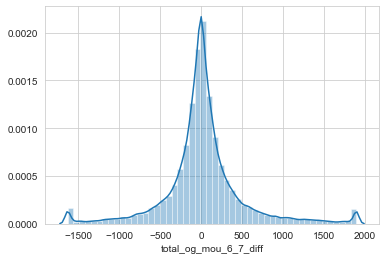

----------------------------------------------------------------------------------------------
Plotting  total_og_mou_7_8_diff


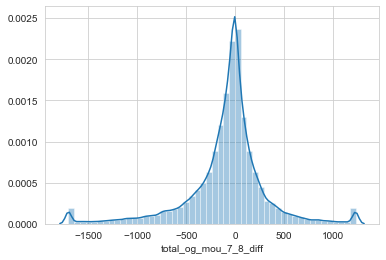

----------------------------------------------------------------------------------------------
Plotting  total_ic_mou_6_7_diff


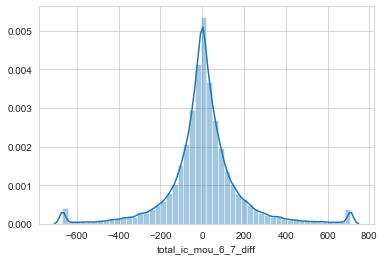

----------------------------------------------------------------------------------------------
Plotting  total_ic_mou_7_8_diff


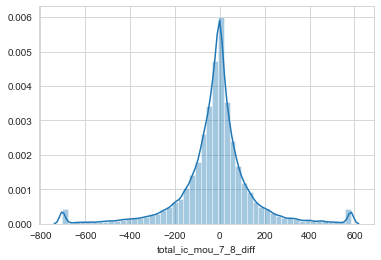

----------------------------------------------------------------------------------------------
Plotting  total_rech_num_6_7_diff


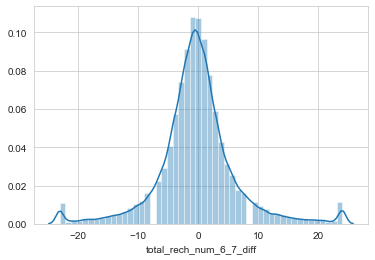

----------------------------------------------------------------------------------------------
Plotting  total_rech_num_7_8_diff


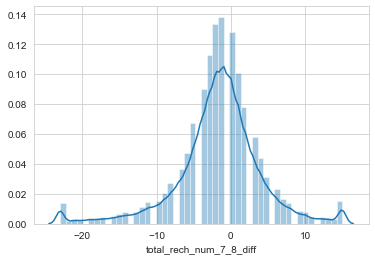

----------------------------------------------------------------------------------------------
Plotting  total_rech_amt_6_7_diff


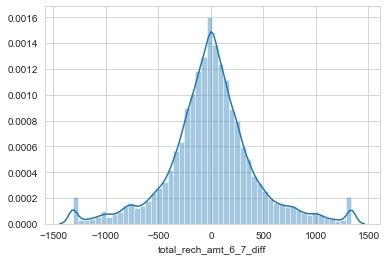

----------------------------------------------------------------------------------------------
Plotting  total_rech_amt_7_8_diff


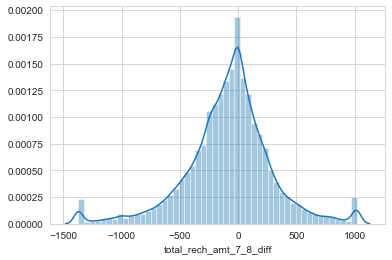

----------------------------------------------------------------------------------------------
Plotting  av_rech_amt_data_6_7_diff


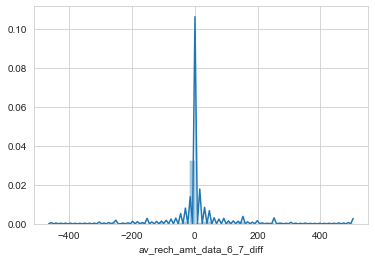

----------------------------------------------------------------------------------------------
Plotting  av_rech_amt_data_7_8_diff


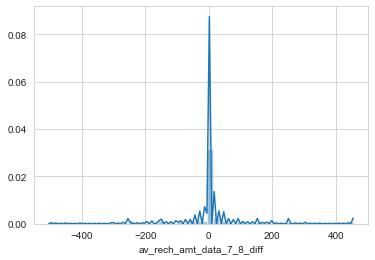

----------------------------------------------------------------------------------------------
Plotting  tenure


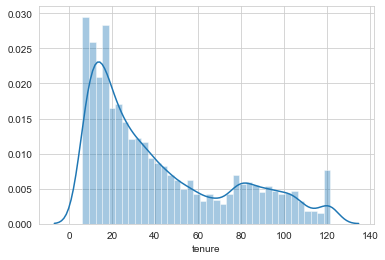

----------------------------------------------------------------------------------------------


In [57]:
for column in cols_9:
    print("Plotting ", column)
    num_viz(telecom, column)
    print('----------------------------------------------------------------------------------------------')

In [58]:
# Visualising the data for  6th, 7th and 8th month

def plot(column):
    
    plt.figure(figsize = (20,16))
    
    plt.subplot(2,3,1)
    sns.boxplot(data = telecom, y = column +"_6", x = 'churn', hue = 'churn')
    
    plt.subplot(2,3,2)
    sns.boxplot(data = telecom, y = column +"_7", x = 'churn', hue = 'churn')
    
    plt.subplot(2,3,3)
    sns.boxplot(data = telecom, y = column +"_8", x = 'churn', hue = 'churn')
    
    plt.show()

In [59]:
# Extracting the recharge variables

rech_amt_cols =  telecom.columns[telecom.columns.str.contains('rech_amt')]
rech_amt_cols

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'max_rech_amt_9', 'av_rech_amt_data_6',
       'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
       'total_rech_amt_6_7_diff', 'total_rech_amt_7_8_diff',
       'av_rech_amt_data_6_7_diff', 'av_rech_amt_data_7_8_diff'],
      dtype='object')

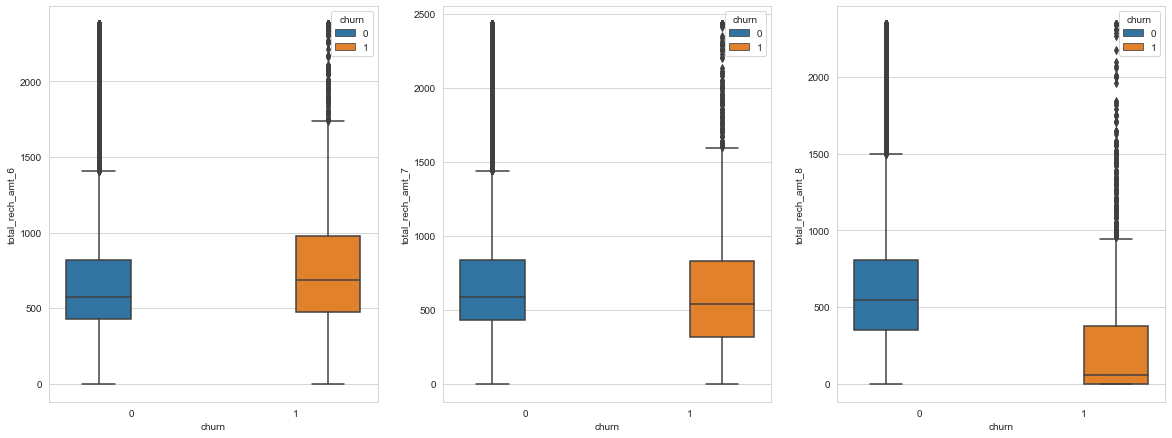

In [60]:
# Ploting for total recharge amount

plot('total_rech_amt')

**From the above plots its clear that the customers who have churned have done less amounts of recharge.**

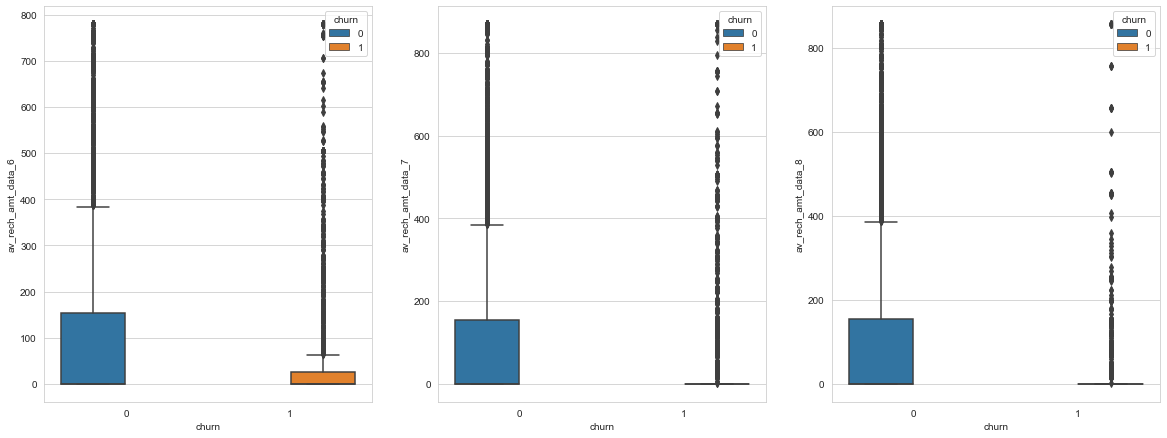

In [61]:
# Ploting for average data recharge amount

plot('av_rech_amt_data')

**From the above plots its clear that the customers who have churned have done less amounts of average data recharge.**

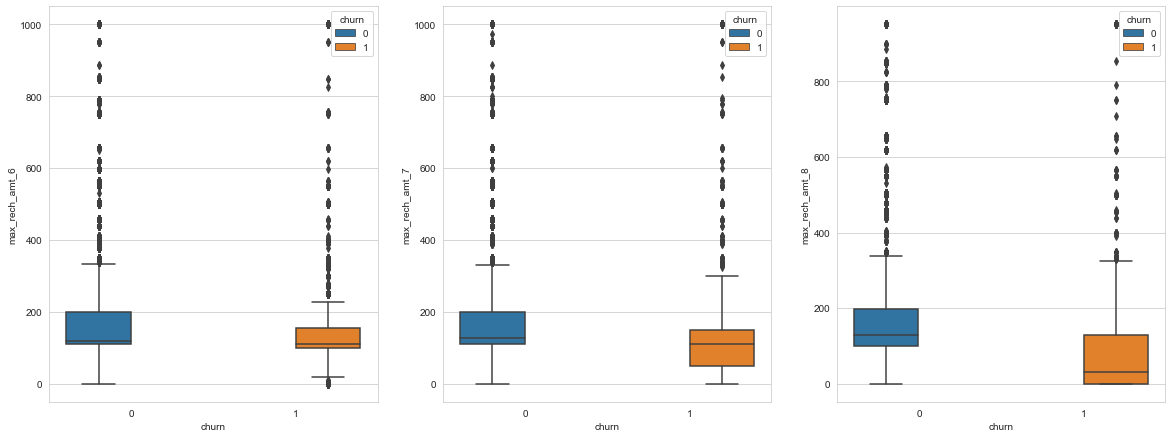

In [62]:
# Ploting for maximum data recharge amount

plot('max_rech_amt')

**From the above plots its clear that the customers who have churned haven't done maximum recharges.**

In [63]:
# Let's check other recharge related variables

extra_cols = telecom.columns[telecom.columns.str.contains('rech_num|max_rech_data', regex = True)]
extra_cols

Index(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_num_9', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'max_rech_data_9', 'total_rech_num_6_7_diff',
       'total_rech_num_7_8_diff'],
      dtype='object')

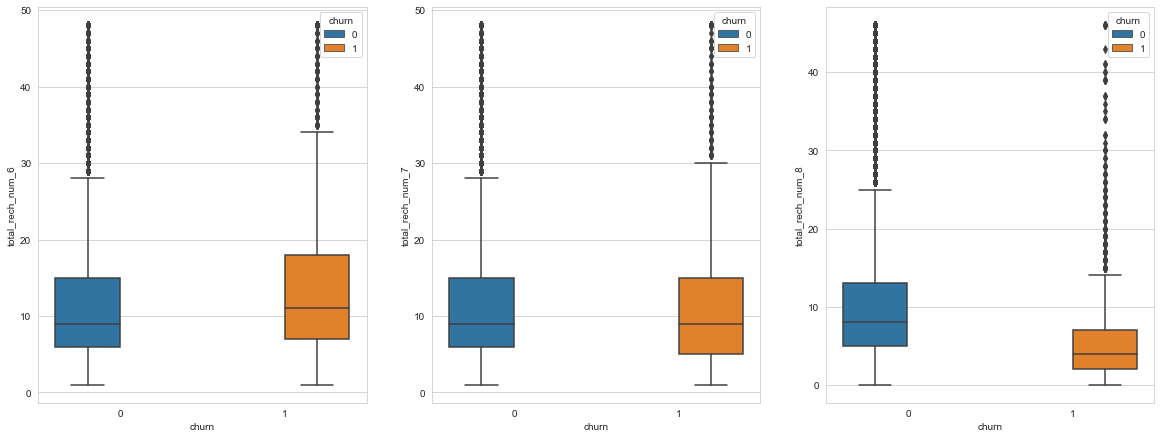

In [64]:
# Ploting for number of times recharged

plot('total_rech_num')

**From the above plots its clear that the customers who have churned have done less number of recharges.**

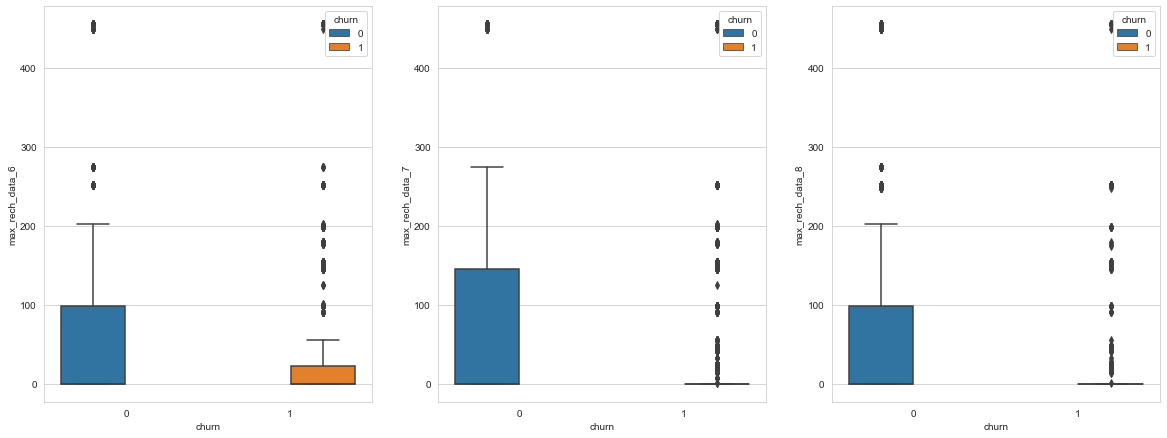

In [65]:
# Ploting for maximum number of times data recharged

plot('max_rech_data')

**From the above plots its clear that the customers who have churned haven't done data recharges.**

In [66]:
# Visualising 2G and 3G usage related variables

data_cols = telecom.columns[telecom.columns.str.contains('2g|3g', regex = True)]
data_cols

Index(['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'count_rech_3g_9', 'vol_2g_mb_6', 'vol_2g_mb_7',
       'vol_2g_mb_8', 'vol_2g_mb_9', 'vol_3g_mb_6', 'vol_3g_mb_7',
       'vol_3g_mb_8', 'vol_3g_mb_9', 'monthly_2g_6', 'monthly_2g_7',
       'monthly_2g_8', 'monthly_2g_9', 'sachet_2g_6', 'sachet_2g_7',
       'sachet_2g_8', 'sachet_2g_9', 'monthly_3g_6', 'monthly_3g_7',
       'monthly_3g_8', 'monthly_3g_9', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'sachet_3g_9', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'sep_vbc_3g'],
      dtype='object')

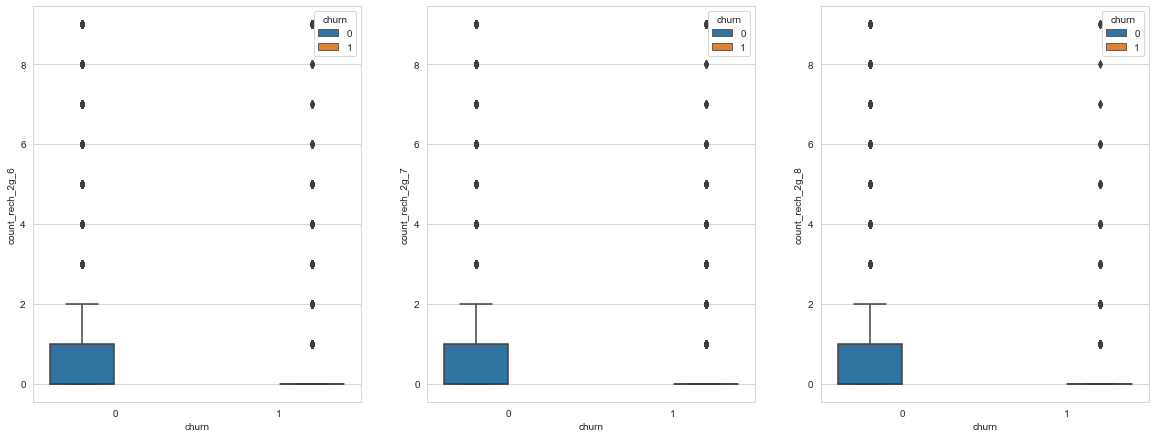

In [67]:
# Ploting for count of 2G recharge columns

plot('count_rech_2g')

**From the above plots its clear that the customers who have churned have done less number of 2G data recharges.**

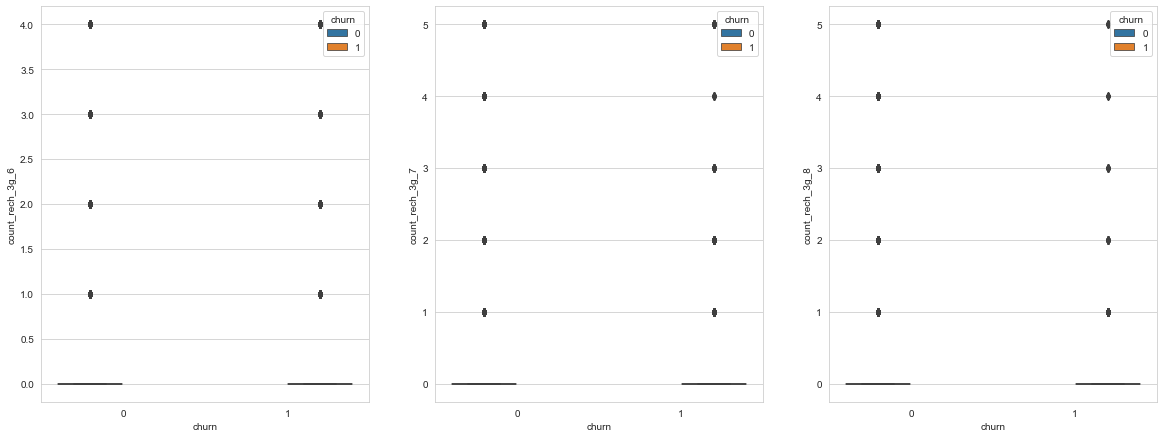

In [68]:
# Ploting for count of 3G recharge columns

plot('count_rech_3g')

**3G data might not be at feasible rates to everyone. So there are not many recharges done in any of the three months.**

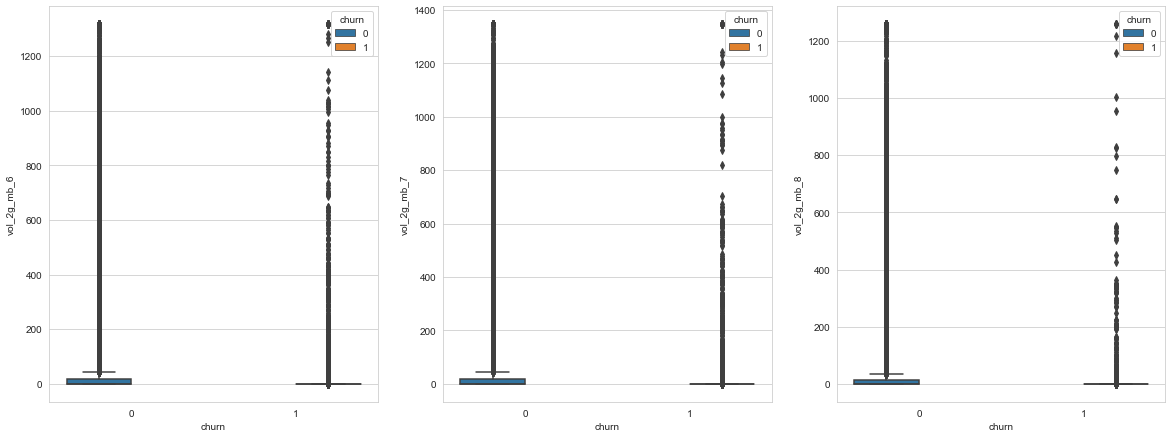

In [69]:
# Ploting for volume of 2G usage columns

plot('vol_2g_mb')

**From the above plots its clear that the customers who have churned have utilised less.**

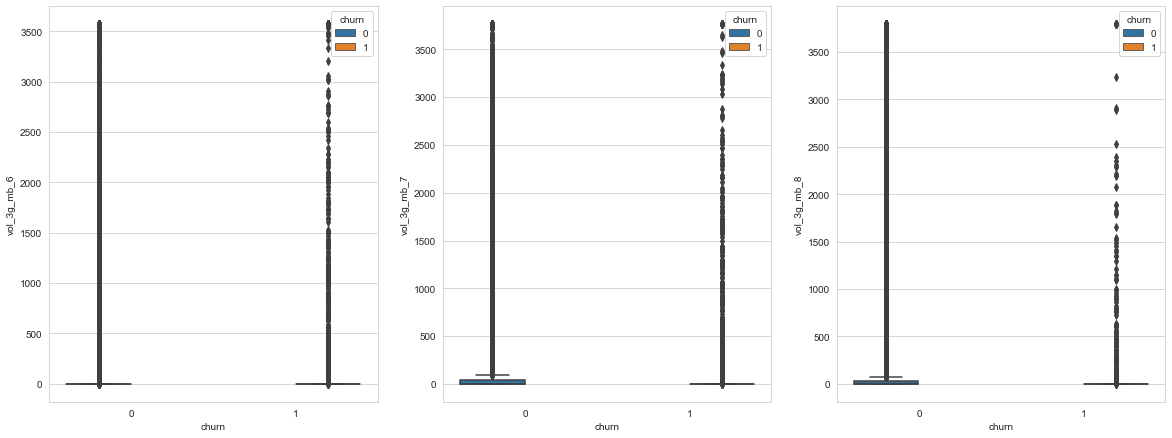

In [70]:
# Ploting for volume of 3G usage columns

plot('vol_3g_mb')

In [71]:
# Average Revenue Per User columns

arpu_cols = telecom.columns[telecom.columns.str.contains('arpu_')]
arpu_cols

Index(['arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'arpu_6_7_diff',
       'arpu_7_8_diff'],
      dtype='object')

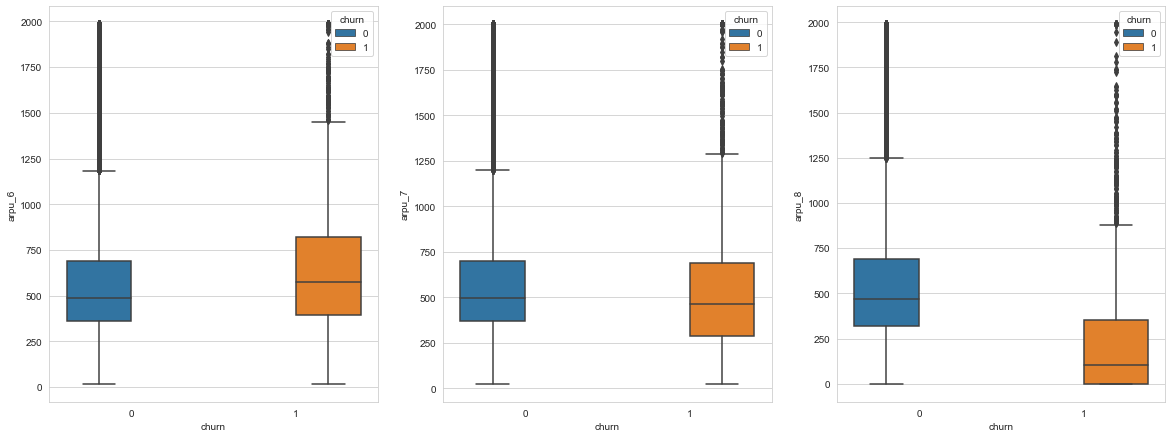

In [72]:
# Plotting arpu

plot('arpu')

**From the above plots its clear that the company has obtained less revenue from the customers who have churned.**

# Data Preparation

In [73]:
# Before moving further, lets drop all the unwanted variables and the columns belonging to churn month i.e '9th month'

telecom = telecom.drop(['Good_phase_avg', 'calls', 'internet', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 
                        'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 
                        'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 
                        'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 
                        'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 
                        'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 
                        'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'total_rech_data_9', 
                        'max_rech_data_9', 'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 
                        'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'sep_vbc_3g'], axis = 1)

In [74]:
telecom.head()

arpu_6     arpu_7      arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
7   1069.180  1349.8500  1988.08226        57.84        54.68        52.29   
8    378.721   492.2230   137.36200       413.69       351.03        35.08   
13   492.846   205.6710   593.26000       501.76       108.39       534.24   
16   430.975   299.8690   187.89400        50.51        74.01        70.61   
17   690.008    25.6006    25.49900      1185.91         9.28         7.79   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
7         453.43       567.160        325.91          16.23          33.49   
8          94.66        80.630        136.48           0.00           0.00   
13        413.31       119.280        482.46          23.53         144.24   
16        296.29       229.740        162.76           0.00           2.83   
17         61.64         1.099          5.54           0.00           4.76   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
7           31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00   
13          72.11           7.98          35.26           1.44   
16           0.00           0.00          17.74           0.00   
17           4.81           0.00           8.46          13.34   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
13             49.63              6.19             36.01            151.13   
16             42.61             65.16             67.38            273.29   
17             38.99              0.00              0.00             58.54   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
13             47.28            294.46              4.54              0.00   
16            145.99            128.28              0.00              4.48   
17              0.00              0.00              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
7              53.23               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
13             23.51               0.0               0.0              0.49   
16             10.26               0.0               0.0              0.00   
17              0.00               0.0               0.0              0.00   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
13        205.31         53.48        353.99            446.41   
16        315.91        215.64        205.93              7.89   
17         97.54          0.00          0.00           1146.91   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
13             85.98            498.23            255.36             52.94   
16              2.58              3.23             22.99             64.51   
17              0.81              0.00              1.55              0.00   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
7              49.14              6.66             20.08             16.68   
8              75.69              0.00              0.00              0.00   
13            156.94              0.00              0.00              0.00   
16             18.29              0.00              0.00              0.00   
17      

In [75]:
telecom.shape

(29979, 153)

In [76]:
telecom.info(verbose = 1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29979 entries, 7 to 99997
Data columns (total 153 columns):
arpu_6                       float64
arpu_7                       float64
arpu_8                       float64
onnet_mou_6                  float64
onnet_mou_7                  float64
onnet_mou_8                  float64
offnet_mou_6                 float64
offnet_mou_7                 float64
offnet_mou_8                 float64
roam_ic_mou_6                float64
roam_ic_mou_7                float64
roam_ic_mou_8                float64
roam_og_mou_6                float64
roam_og_mou_7                float64
roam_og_mou_8                float64
loc_og_t2t_mou_6             float64
loc_og_t2t_mou_7             float64
loc_og_t2t_mou_8             float64
loc_og_t2m_mou_6             float64
loc_og_t2m_mou_7             float64
loc_og_t2m_mou_8             float64
loc_og_t2f_mou_6             float64
loc_og_t2f_mou_7             float64
loc_og_t2f_mou_8             float64
lo

**Our dataset has no categorical columns so we need not create any dummies.**

## Dividing into X and Y sets for the model building

In [77]:
# Removing the target variable

X = telecom.drop(['churn'], axis = 1)
y = telecom.churn

## Dividing the data into Train and Test sets

I am dividing the data in 70:30 train and test ratio using Scikit Learn Library. 'Stratify' parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

In [78]:
# Splitting the data into train and test
# Setting the seed value to a constant so that we get the same output always 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 0, stratify = y)

In [79]:
# Lets check the shape of train and test data 

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(20985, 152)
(8994, 152)
(20985,)
(8994,)


## Scaling the data

Scaling basically reduces the values in a column within a certain range — in this case, we will convert the values to their Z-scores.

Here, we can see that except for dummy columns that we have created, few other columns have varied integer or float values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. There are two common ways of rescaling:

1. Min-Max scaling
2. Standardisation (mean-0, sigma-1)

In [80]:
cols_11 = telecom.select_dtypes(include = ['float64', 'int64']).columns

In [81]:
cols_11 = cols_11.drop('churn')

In [82]:
# I'm using Standard scaling
# Applying Standard scaler to all numeric columns except the 'dummy' variables

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[cols_11] = scaler.fit_transform(X_train[cols_11])

X_train.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
87347  1.622941  0.024719  0.913360     0.662267     0.531881     0.730518   
29771  0.740405  0.215169  0.150741     1.436983     0.103833     0.413940   
93799 -0.993026 -0.422568 -0.770519    -0.675154    -0.695928    -0.652684   
98997  0.766357 -0.770422 -0.767804    -0.373062    -0.654573    -0.625926   
52930  1.045498 -0.579663  0.536609    -0.705686    -0.710547    -0.645737   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
87347      0.802608      1.095840      1.250341      -0.290297      -0.262571   
29771     -0.236993     -0.805342     -0.655679      -0.290297      -0.262571   
93799     -0.491897     -0.329510     -0.411387      -0.038121      -0.262571   
98997      1.707246      0.159825     -0.583799      -0.133913       1.462275   
52930     -0.812734     -0.868823     -0.726237      -0.290297      -0.262571   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
87347      -0.261868      -0.309208      -0.285229      -0.279872   
29771      -0.261868      -0.309208      -0.285229      -0.279872   
93799      -0.261868       0.876494      -0.285229      -0.279872   
98997       1.440746       0.407838       1.481302       2.128555   
52930      -0.261868      -0.309208      -0.285229      -0.279872   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
87347          2.767613          2.718163          3.211233          2.597915   
29771         -0.271922         -0.513268         -0.507199         -0.068909   
93799         -0.512922         -0.512066         -0.535756         -0.715494   
98997         -0.448531         -0.537368         -0.556024         -0.464115   
52930         -0.519174         -0.550526         -0.520990         -0.546774   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
87347          3.309530          3.419239          0.218358          0.353918   
29771         -0.677203         -0.409378         -0.431565         -0.434789   
93799         -0.587707         -0.586459         -0.431565         -0.434789   
98997         -0.741226         -0.819289         -0.431565         -0.434789   
52930         -0.719966         -0.596986         -0.431565         -0.434789   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
87347          0.486456         -0.336333         -0.341806         -0.335585   
29771         -0.424798         -0.336333         -0.341806          0.348934   
93799         -0.424798         -0.336333         -0.087705         -0.335585   
98997         -0.424798         -0.071897         -0.341806         -0.335585   
52930         -0.424798          0.177571          0.818510         -0.335585   

       loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
87347      3.042561      3.513286      3.751302         -0.440329   
29771     -0.219305     -0.740148     -0.548845          1.806834   
93799     -0.759042     -0.681133     -0.678804         -0.511631   
98997     -0.563625     -0.793978     -0.841636         -0.182171   
52930     -0.652227     -0.786708     -0.678869         -0.511631   

       std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
87347         -0.518554         -0.431256         -0.531978         -0.500817   
29771          0.384287          0.724629         -0.123485         -0.453534   
93799         -0.518554         -0.469762         -0.282679          0.015026   
98997         -0.507296         -0.469762          2.238905          0.414850   
52930         -0.518554         -0.467919         -0.524824         -0.533667   

       std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
87347         -0.505478          1.093612         -0.245187          0.306666   
29771         -0.452368         -0.246117         -0.245187         -0.242394   
93799         -0.029125         

# Model Building

We are building two models one with good performance using PCA. The other with good interpretation without using PCA.

## Logistic regression

### Model I

In [83]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(class_weight = 'balanced', random_state = 0)

In [84]:
# Importing RFE from sklearn

from sklearn.feature_selection import RFE

# Running RFE with 15 variables as output

rfe = RFE(logreg, 15)

rfe = rfe.fit(X_train, y_train)

In [85]:
# '.support_' gives an array of boolean values of which, True indicates that those columns are selected after applyng RFE 

rfe.support_

array([False, False,  True, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True, False, False,  True, False,  True,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [86]:
# Obtaining list of all the variables with boolean and ranking beside
# Those with 'True' are the 15 variables selected using RFE
# '.ranking_' assigns rank to each variable

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_6', False, 114),
 ('arpu_7', False, 94),
 ('arpu_8', True, 1),
 ('onnet_mou_6', False, 5),
 ('onnet_mou_7', False, 75),
 ('onnet_mou_8', False, 60),
 ('offnet_mou_6', False, 7),
 ('offnet_mou_7', True, 1),
 ('offnet_mou_8', False, 89),
 ('roam_ic_mou_6', False, 130),
 ('roam_ic_mou_7', False, 74),
 ('roam_ic_mou_8', False, 120),
 ('roam_og_mou_6', False, 97),
 ('roam_og_mou_7', False, 76),
 ('roam_og_mou_8', False, 45),
 ('loc_og_t2t_mou_6', False, 131),
 ('loc_og_t2t_mou_7', False, 10),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_6', False, 31),
 ('loc_og_t2m_mou_7', False, 2),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 105),
 ('loc_og_t2f_mou_7', False, 11),
 ('loc_og_t2f_mou_8', False, 93),
 ('loc_og_t2c_mou_6', False, 127),
 ('loc_og_t2c_mou_7', False, 106),
 ('loc_og_t2c_mou_8', False, 69),
 ('loc_og_mou_6', False, 32),
 ('loc_og_mou_7', False, 9),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2t_mou_6', False, 96),
 ('std_og_t2t_mou_7', False, 12),
 ('std

In [87]:
# Pulling out the variables with boolean 'True' and assigning them to a variable

Features = X_train.columns[rfe.support_]
Features

Index(['arpu_8', 'offnet_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8',
       'loc_og_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_7',
       'std_og_t2m_mou_8', 'std_og_mou_8', 'total_og_mou_8', 'total_ic_mou_8',
       'spl_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8',
       'max_rech_data_8'],
      dtype='object')

In [88]:
# Assessing the model with StatsModels
# By default, statsmodels fits a line passing through the origin, i.e. it doesn't fit an intercept 
# Hence, we need to use the command 'add_constant' so that it also fits an intercept

import statsmodels.api as sm

X_train_sm_1 = sm.add_constant(X_train[Features])

lg_1 = sm.GLM(y_train, X_train_sm_1, family = sm.families.Binomial())

Model_1 = lg_1.fit()
Model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20985
Model:                            GLM   Df Residuals:                    20969
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3947.8
Date:                Fri, 10 Jul 2020   Deviance:                       7895.6
Time:                        22:21:32   Pearson chi2:                 1.03e+10
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.9569      0.067    -59.419      0.000      -4.087      -3.826
arpu_8                 0.3931      0.057      6.882      0.000       0.281       0.505
offnet_mou_7           0.7539      0.086      8.790      0.000       0.586       0.922
loc_og_t2t_mou_8      -0.6237      0.218     -2.866      0.004      -1.050      -0.197
loc_og_t2m_mou_8      -1.7949      0.271     -6.624      0.000      -2.326      -1.264
loc_og_mou_8           4.1570      0.378     11.011      0.000       3.417       4.897
std_og_t2t_mou_8      -1.1200      0.206     -5.432      0.000      -1.524      -0.716
std_og_t2m_mou_7      -0.3579      0.088     -4.088      0.000      -0.530      -0.186
std_og_t2m_mou_8      -1.3682      0.210     -6.529      0.000      -1.779      -0.957
std_og_mou_8           7.4773      0.368     20.308      0.000       6.756       8.199
total_og_mou_8        -6.9603      0.325    -21.443      0.000      -7.597      -6.324
total_ic_mou_8        -1.0175      0.095    -10.679      0.000      -1.204      -0.831
spl_ic_mou_8          -0.5817      0.088     -6.616      0.000      -0.754      -0.409
total_rech_num_8      -0.4527      0.051     -8.871      0.000      -0.553      -0.353
last_day_rch_amt_8    -0.6149      0.053    -11.536      0.000      -0.719      -0.510
max_rech_data_8       -0.7438      0.055    -13.589      0.000      -0.851      -0.637
======================================================================================
"""

In [89]:
# Getting the predicted y-values on the train set
# Looking at the first ten values

y_train_pred_1 = Model_1.predict(X_train_sm_1)
y_train_pred_1[:10]

87347    0.000014
29771    0.021669
93799    0.127525
98997    0.286427
52930    0.030485
83487    0.080362
3243     0.000792
82047    0.000004
10800    0.102638
68836    0.037557
dtype: float64

In [90]:
# Reshaping the data
# Numpy allow us to give one of new shape parameter as -1. 
# It simply means that it is an unknown dimension and we want numpy to figure it out.

y_train_pred_1 = y_train_pred_1.values.reshape(-1)
y_train_pred_1[:10]

array([1.35848934e-05, 2.16689046e-02, 1.27525463e-01, 2.86427092e-01,
       3.04853184e-02, 8.03623748e-02, 7.91559320e-04, 4.28992352e-06,
       1.02638240e-01, 3.75565188e-02])

In [91]:
# Creating a dataframe with the actual converted and the predicted converted probabilities

Prob_1 = pd.DataFrame({'Converted' : y_train.values, 'Predicted_prob' : y_train_pred_1})

Prob_1['Customer'] = y_train.index

Prob_1.head()

Converted  Predicted_prob  Customer
0          0        0.000014     87347
1          0        0.021669     29771
2          0        0.127525     93799
3          0        0.286427     98997
4          0        0.030485     52930

In [92]:
# Creating new column 'Predicted' with values '1' if 'Predicted_prob > 0.5' else '0'

Prob_1['Predicted'] = Prob_1.Predicted_prob.map(lambda x: 1 if x > 0.5 else 0)

Prob_1.head()

Converted  Predicted_prob  Customer  Predicted
0          0        0.000014     87347          0
1          0        0.021669     29771          0
2          0        0.127525     93799          0
3          0        0.286427     98997          0
4          0        0.030485     52930          0

### VIF(Variance Inflation Factor)

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our model. We generally want a VIF that is less than 5.

In [93]:
# Importing VIF from statsmodels

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs

VIF_1 = pd.DataFrame()

VIF_1['Variables'] = X_train[Features].columns

VIF_1['VIF'] = [variance_inflation_factor(X_train[Features].values, i) for i in range(X_train[Features].shape[1])]

VIF_1['VIF'] = round(VIF_1['VIF'], 2)

VIF_1 = VIF_1.sort_values(by = "VIF", ascending = False)

VIF_1

Variables     VIF
8         std_og_mou_8  101.41
4         loc_og_mou_8   64.31
9       total_og_mou_8   50.46
5     std_og_t2t_mou_8   27.37
7     std_og_t2m_mou_8   27.09
3     loc_og_t2m_mou_8   20.44
2     loc_og_t2t_mou_8   12.35
6     std_og_t2m_mou_7    9.73
1         offnet_mou_7    8.16
0               arpu_8    2.95
12    total_rech_num_8    1.59
10      total_ic_mou_8    1.39
14     max_rech_data_8    1.37
13  last_day_rch_amt_8    1.36
11        spl_ic_mou_8    1.04

In [94]:
# Dropping the variable 'std_og_mou_8'

Features = Features.drop('std_og_mou_8', 1)
Features

Index(['arpu_8', 'offnet_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8',
       'loc_og_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_7',
       'std_og_t2m_mou_8', 'total_og_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8',
       'total_rech_num_8', 'last_day_rch_amt_8', 'max_rech_data_8'],
      dtype='object')

### Model II

In [95]:
# Let's build second model after dropping 'std_og_mou_8'

X_train_sm_2 = sm.add_constant(X_train[Features])

lg_2 = sm.GLM(y_train, X_train_sm_2, family = sm.families.Binomial())

Model_2 = lg_2.fit()

Model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20985
Model:                            GLM   Df Residuals:                    20970
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4082.5
Date:                Fri, 10 Jul 2020   Deviance:                       8165.0
Time:                        22:21:34   Pearson chi2:                 4.14e+08
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.0336      0.067    -60.422      0.000      -4.164      -3.903
arpu_8                 0.3441      0.058      5.974      0.000       0.231       0.457
offnet_mou_7           0.7091      0.084      8.454      0.000       0.545       0.874
loc_og_t2t_mou_8      -0.9612      0.185     -5.183      0.000      -1.325      -0.598
loc_og_t2m_mou_8      -2.0379      0.214     -9.528      0.000      -2.457      -1.619
loc_og_mou_8           4.4127      0.308     14.312      0.000       3.808       5.017
std_og_t2t_mou_8       3.2121      0.185     17.368      0.000       2.850       3.575
std_og_t2m_mou_7      -0.3394      0.086     -3.963      0.000      -0.507      -0.172
std_og_t2m_mou_8       2.8389      0.177     16.006      0.000       2.491       3.187
total_og_mou_8        -6.0852      0.323    -18.864      0.000      -6.717      -5.453
total_ic_mou_8        -1.2322      0.098    -12.583      0.000      -1.424      -1.040
spl_ic_mou_8          -0.6037      0.089     -6.810      0.000      -0.777      -0.430
total_rech_num_8      -0.5043      0.052     -9.734      0.000      -0.606      -0.403
last_day_rch_amt_8    -0.6516      0.055    -11.950      0.000      -0.759      -0.545
max_rech_data_8       -0.7042      0.055    -12.914      0.000      -0.811      -0.597
======================================================================================
"""

In [96]:
# Getting the predicted values on the train set
# Looking at the first ten values

y_train_pred_2 = Model_2.predict(X_train_sm_2)
y_train_pred_2[:10]

87347    0.000011
29771    0.024434
93799    0.140366
98997    0.293558
52930    0.033075
83487    0.085169
3243     0.001118
82047    0.000003
10800    0.106785
68836    0.033458
dtype: float64

In [97]:
# Reshaping the data

y_train_pred_2 = y_train_pred_2.values.reshape(-1)
y_train_pred_2[:10]

array([1.13826482e-05, 2.44335460e-02, 1.40365593e-01, 2.93558321e-01,
       3.30751280e-02, 8.51694059e-02, 1.11815711e-03, 3.16529502e-06,
       1.06785249e-01, 3.34582810e-02])

In [98]:
# Creating a dataframe with the actual converted and the predicted converted probabilities

Prob_2 = pd.DataFrame({'Converted' : y_train.values, 'Predicted_prob' : y_train_pred_2})

Prob_2['Customer'] = y_train.index

Prob_2.head()

Converted  Predicted_prob  Customer
0          0        0.000011     87347
1          0        0.024434     29771
2          0        0.140366     93799
3          0        0.293558     98997
4          0        0.033075     52930

In [99]:
# Creating new column 'Predicted' with values '1' if 'Predicted_prob > 0.5' else '0'

Prob_2['Predicted'] = Prob_2.Predicted_prob.map(lambda x: 1 if x > 0.5 else 0)

Prob_2.head()

Converted  Predicted_prob  Customer  Predicted
0          0        0.000011     87347          0
1          0        0.024434     29771          0
2          0        0.140366     93799          0
3          0        0.293558     98997          0
4          0        0.033075     52930          0

In [100]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs

VIF_2 = pd.DataFrame()

VIF_2['Variables'] = X_train[Features].columns

VIF_2['VIF'] = [variance_inflation_factor(X_train[Features].values, i) for i in range(X_train[Features].shape[1])]

VIF_2['VIF'] = round(VIF_2['VIF'], 2)

VIF_2 = VIF_2.sort_values(by = "VIF", ascending = False)

VIF_2

Variables    VIF
4         loc_og_mou_8  53.48
8       total_og_mou_8  29.85
3     loc_og_t2m_mou_8  19.87
7     std_og_t2m_mou_8  12.32
2     loc_og_t2t_mou_8  12.21
5     std_og_t2t_mou_8  11.49
6     std_og_t2m_mou_7   9.70
1         offnet_mou_7   8.14
0               arpu_8   2.95
11    total_rech_num_8   1.57
9       total_ic_mou_8   1.39
13     max_rech_data_8   1.37
12  last_day_rch_amt_8   1.36
10        spl_ic_mou_8   1.03

In [101]:
# Dropping the variable 'loc_og_mou_8'

Features = Features.drop('loc_og_mou_8', 1)
Features

Index(['arpu_8', 'offnet_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8',
       'total_og_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'max_rech_data_8'],
      dtype='object')

### Model III

In [102]:
# Let's build second model after dropping 'loc_og_mou_8'

X_train_sm_3 = sm.add_constant(X_train[Features])

lg_3 = sm.GLM(y_train, X_train_sm_3, family = sm.families.Binomial())

Model_3 = lg_3.fit()

Model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20985
Model:                            GLM   Df Residuals:                    20971
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4134.5
Date:                Fri, 10 Jul 2020   Deviance:                       8269.1
Time:                        22:21:35   Pearson chi2:                 2.69e+12
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.0998      0.067    -60.990      0.000      -4.232      -3.968
arpu_8                 0.3565      0.059      6.092      0.000       0.242       0.471
offnet_mou_7           0.6985      0.083      8.440      0.000       0.536       0.861
loc_og_t2t_mou_8       1.2948      0.106     12.246      0.000       1.088       1.502
loc_og_t2m_mou_8       1.0444      0.126      8.287      0.000       0.797       1.291
std_og_t2t_mou_8       3.3032      0.201     16.464      0.000       2.910       3.696
std_og_t2m_mou_7      -0.3415      0.085     -4.039      0.000      -0.507      -0.176
std_og_t2m_mou_8       2.9368      0.192     15.321      0.000       2.561       3.312
total_og_mou_8        -6.2692      0.351    -17.844      0.000      -6.958      -5.581
total_ic_mou_8        -1.2951      0.102    -12.750      0.000      -1.494      -1.096
spl_ic_mou_8          -0.6127      0.089     -6.881      0.000      -0.787      -0.438
total_rech_num_8      -0.5576      0.053    -10.591      0.000      -0.661      -0.454
last_day_rch_amt_8    -0.6692      0.056    -12.026      0.000      -0.778      -0.560
max_rech_data_8       -0.7052      0.055    -12.862      0.000      -0.813      -0.598
======================================================================================
"""

In [103]:
# Getting the predicted values on the train set
# Looking at the first ten values

y_train_pred_3 = Model_3.predict(X_train_sm_3)
y_train_pred_3[:10]

87347    0.000022
29771    0.024680
93799    0.144372
98997    0.294155
52930    0.035137
83487    0.095893
3243     0.001435
82047    0.000004
10800    0.106812
68836    0.026647
dtype: float64

In [104]:
# Reshaping the data

y_train_pred_3 = y_train_pred_3.values.reshape(-1)
y_train_pred_3[:10]

array([2.17971333e-05, 2.46795940e-02, 1.44371523e-01, 2.94154830e-01,
       3.51373605e-02, 9.58926149e-02, 1.43464060e-03, 3.87997070e-06,
       1.06812409e-01, 2.66469674e-02])

In [105]:
# Creating a dataframe with the actual converted and the predicted converted probabilities

Prob_3 = pd.DataFrame({'Converted' : y_train.values, 'Predicted_prob' : y_train_pred_3})

Prob_3['Customer'] = y_train.index

Prob_3.head()

Converted  Predicted_prob  Customer
0          0        0.000022     87347
1          0        0.024680     29771
2          0        0.144372     93799
3          0        0.294155     98997
4          0        0.035137     52930

In [106]:
# Creating new column 'Predicted' with values '1' if 'Predicted_prob > 0.5' else '0'

Prob_3['Predicted'] = Prob_3.Predicted_prob.map(lambda x: 1 if x > 0.5 else 0)

Prob_3.head()

Converted  Predicted_prob  Customer  Predicted
0          0        0.000022     87347          0
1          0        0.024680     29771          0
2          0        0.144372     93799          0
3          0        0.294155     98997          0
4          0        0.035137     52930          0

In [107]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs

VIF_3 = pd.DataFrame()

VIF_3['Variables'] = X_train[Features].columns

VIF_3['VIF'] = [variance_inflation_factor(X_train[Features].values, i) for i in range(X_train[Features].shape[1])]

VIF_3['VIF'] = round(VIF_3['VIF'], 2)

VIF_3 = VIF_3.sort_values(by = "VIF", ascending = False)

VIF_3

Variables    VIF
7       total_og_mou_8  20.84
5     std_og_t2m_mou_7   9.66
6     std_og_t2m_mou_8   9.42
4     std_og_t2t_mou_8   8.34
1         offnet_mou_7   8.11
3     loc_og_t2m_mou_8   4.52
2     loc_og_t2t_mou_8   3.05
0               arpu_8   2.94
10    total_rech_num_8   1.57
8       total_ic_mou_8   1.39
12     max_rech_data_8   1.37
11  last_day_rch_amt_8   1.36
9         spl_ic_mou_8   1.03

In [108]:
# Dropping the variable 'total_og_mou_8'

Features = Features.drop('total_og_mou_8', 1)
Features

Index(['arpu_8', 'offnet_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8',
       'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'max_rech_data_8'],
      dtype='object')

### Model IV

In [109]:
# Let's build fourth model after dropping 'total_og_mou_8'

X_train_sm_4 = sm.add_constant(X_train[Features])

lg_4 = sm.GLM(y_train, X_train_sm_4, family = sm.families.Binomial())

Model_4 = lg_4.fit()

Model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20985
Model:                            GLM   Df Residuals:                    20972
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4309.6
Date:                Fri, 10 Jul 2020   Deviance:                       8619.2
Time:                        22:21:37   Pearson chi2:                 2.34e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.0407      0.069    -58.425      0.000      -4.176      -3.905
arpu_8                 0.0892      0.058      1.528      0.126      -0.025       0.204
offnet_mou_7           0.6266      0.079      7.910      0.000       0.471       0.782
loc_og_t2t_mou_8      -0.1355      0.059     -2.312      0.021      -0.250      -0.021
loc_og_t2m_mou_8      -0.5354      0.076     -7.064      0.000      -0.684      -0.387
std_og_t2t_mou_8      -0.1996      0.045     -4.410      0.000      -0.288      -0.111
std_og_t2m_mou_7      -0.3121      0.081     -3.850      0.000      -0.471      -0.153
std_og_t2m_mou_8      -0.3559      0.057     -6.202      0.000      -0.468      -0.243
total_ic_mou_8        -1.9344      0.103    -18.705      0.000      -2.137      -1.732
spl_ic_mou_8          -0.6588      0.091     -7.261      0.000      -0.837      -0.481
total_rech_num_8      -0.6817      0.054    -12.725      0.000      -0.787      -0.577
last_day_rch_amt_8    -0.7478      0.056    -13.385      0.000      -0.857      -0.638
max_rech_data_8       -0.6366      0.055    -11.517      0.000      -0.745      -0.528
======================================================================================
"""

In [110]:
# Getting the predicted values on the train set
# Looking at the first ten values

y_train_pred_4 = Model_4.predict(X_train_sm_4)
y_train_pred_4[:10]

87347    0.000009
29771    0.028053
93799    0.168599
98997    0.292375
52930    0.027870
83487    0.088934
3243     0.002205
82047    0.000024
10800    0.087782
68836    0.020947
dtype: float64

In [111]:
# Reshaping the data

y_train_pred_4 = y_train_pred_4.values.reshape(-1)
y_train_pred_4[:10]

array([8.64425966e-06, 2.80525333e-02, 1.68599114e-01, 2.92375380e-01,
       2.78697234e-02, 8.89344526e-02, 2.20534949e-03, 2.38468679e-05,
       8.77819259e-02, 2.09466939e-02])

In [112]:
# Creating a dataframe with the actual converted and the predicted probabilities

Prob_4 = pd.DataFrame({'Converted' : y_train.values, 'Predicted_prob' : y_train_pred_4})

Prob_4['Customer'] = y_train.index

Prob_4.head()

Converted  Predicted_prob  Customer
0          0        0.000009     87347
1          0        0.028053     29771
2          0        0.168599     93799
3          0        0.292375     98997
4          0        0.027870     52930

In [113]:
# Creating new column 'Predicted' with values '1' if 'Converted_Prob > 0.5' else '0'

Prob_4['Predicted'] = Prob_4.Predicted_prob.map(lambda x: 1 if x > 0.5 else 0)

Prob_4.head()

Converted  Predicted_prob  Customer  Predicted
0          0        0.000009     87347          0
1          0        0.028053     29771          0
2          0        0.168599     93799          0
3          0        0.292375     98997          0
4          0        0.027870     52930          0

In [114]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs

VIF_4 = pd.DataFrame()

VIF_4['Variables'] = X_train[Features].columns

VIF_4['VIF'] = [variance_inflation_factor(X_train[Features].values, i) for i in range(X_train[Features].shape[1])]

VIF_4['VIF'] = round(VIF_4['VIF'], 2)

VIF_4 = VIF_4.sort_values(by = "VIF", ascending = False)

VIF_4

Variables   VIF
5     std_og_t2m_mou_7  9.57
1         offnet_mou_7  7.95
6     std_og_t2m_mou_8  3.20
3     loc_og_t2m_mou_8  2.85
0               arpu_8  2.83
9     total_rech_num_8  1.57
4     std_og_t2t_mou_8  1.41
7       total_ic_mou_8  1.38
10  last_day_rch_amt_8  1.36
11     max_rech_data_8  1.36
2     loc_og_t2t_mou_8  1.21
8         spl_ic_mou_8  1.03

In [115]:
# Dropping the variable 'std_og_t2m_mou_7'

Features = Features.drop('std_og_t2m_mou_7', 1)
Features

Index(['arpu_8', 'offnet_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'total_ic_mou_8',
       'spl_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8',
       'max_rech_data_8'],
      dtype='object')

### Model V

In [116]:
# Let's build fifth model after dropping 'std_og_t2m_mou_7'

X_train_sm_5 = sm.add_constant(X_train[Features])

lg_5 = sm.GLM(y_train, X_train_sm_5, family = sm.families.Binomial())

Model_5 = lg_5.fit()

Model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20985
Model:                            GLM   Df Residuals:                    20973
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4316.9
Date:                Fri, 10 Jul 2020   Deviance:                       8633.7
Time:                        22:21:38   Pearson chi2:                 2.31e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.0216      0.069    -58.569      0.000      -4.156      -3.887
arpu_8                 0.1302      0.057      2.274      0.023       0.018       0.242
offnet_mou_7           0.3517      0.036      9.875      0.000       0.282       0.422
loc_og_t2t_mou_8      -0.1435      0.059     -2.452      0.014      -0.258      -0.029
loc_og_t2m_mou_8      -0.4050      0.067     -6.038      0.000      -0.536      -0.274
std_og_t2t_mou_8      -0.2240      0.045     -4.983      0.000      -0.312      -0.136
std_og_t2m_mou_8      -0.4440      0.054     -8.280      0.000      -0.549      -0.339
total_ic_mou_8        -1.9301      0.103    -18.657      0.000      -2.133      -1.727
spl_ic_mou_8          -0.6590      0.091     -7.264      0.000      -0.837      -0.481
total_rech_num_8      -0.6872      0.053    -12.849      0.000      -0.792      -0.582
last_day_rch_amt_8    -0.7404      0.056    -13.284      0.000      -0.850      -0.631
max_rech_data_8       -0.6463      0.055    -11.700      0.000      -0.755      -0.538
======================================================================================
"""

In [117]:
# Getting the predicted values on the train set
# Looking at the first ten values

y_train_pred_5 = Model_5.predict(X_train_sm_5)
y_train_pred_5[:10]

87347    0.000010
29771    0.029512
93799    0.171905
98997    0.297413
52930    0.029661
83487    0.086073
3243     0.002749
82047    0.000027
10800    0.090743
68836    0.020782
dtype: float64

In [118]:
# Reshaping the data

y_train_pred_5 = y_train_pred_5.values.reshape(-1)
y_train_pred_5[:10]

array([9.68949475e-06, 2.95121463e-02, 1.71905069e-01, 2.97412633e-01,
       2.96606029e-02, 8.60733206e-02, 2.74895216e-03, 2.70849765e-05,
       9.07430235e-02, 2.07819667e-02])

In [119]:
# Creating a dataframe with the actual converted and the predicted probabilities

Prob_5 = pd.DataFrame({'Converted' : y_train.values, 'Predicted_prob' : y_train_pred_5})

Prob_5['Customer'] = y_train.index

Prob_5.head()

Converted  Predicted_prob  Customer
0          0        0.000010     87347
1          0        0.029512     29771
2          0        0.171905     93799
3          0        0.297413     98997
4          0        0.029661     52930

In [120]:
# Creating new column 'Predicted' with values '1' if 'Converted_Prob > 0.5' else '0'

Prob_5['Predicted'] = Prob_5.Predicted_prob.map(lambda x: 1 if x > 0.5 else 0)

Prob_5.head()

Converted  Predicted_prob  Customer  Predicted
0          0        0.000010     87347          0
1          0        0.029512     29771          0
2          0        0.171905     93799          0
3          0        0.297413     98997          0
4          0        0.029661     52930          0

In [121]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs

VIF_5 = pd.DataFrame()

VIF_5['Variables'] = X_train[Features].columns

VIF_5['VIF'] = [variance_inflation_factor(X_train[Features].values, i) for i in range(X_train[Features].shape[1])]

VIF_5['VIF'] = round(VIF_5['VIF'], 2)

VIF_5 = VIF_5.sort_values(by = "VIF", ascending = False)

VIF_5

Variables   VIF
0               arpu_8  2.78
5     std_og_t2m_mou_8  2.43
1         offnet_mou_7  2.32
3     loc_og_t2m_mou_8  1.94
8     total_rech_num_8  1.56
4     std_og_t2t_mou_8  1.40
6       total_ic_mou_8  1.38
10     max_rech_data_8  1.36
9   last_day_rch_amt_8  1.35
2     loc_og_t2t_mou_8  1.21
7         spl_ic_mou_8  1.03

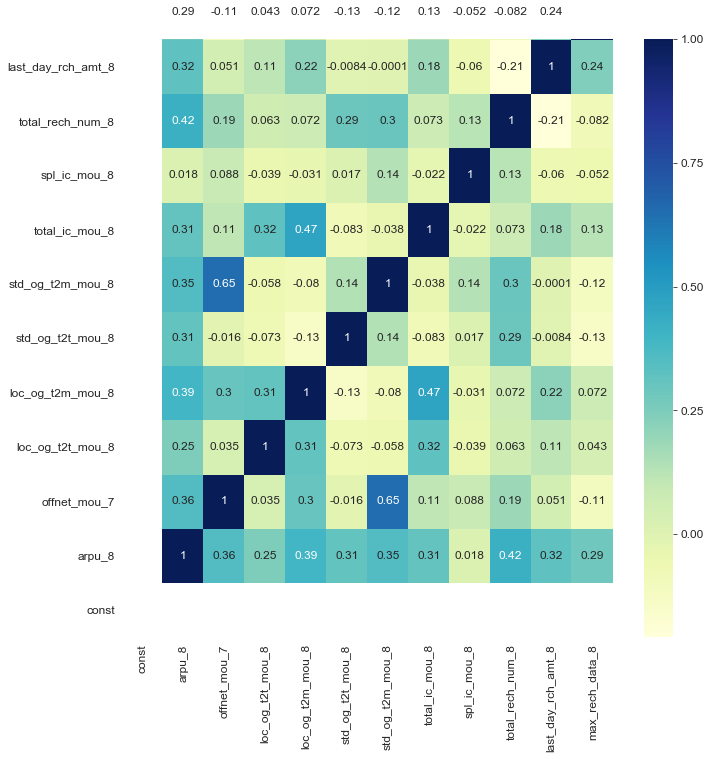

In [122]:
# Let's see the correlation of our data

plt.rcParams['font.size'] = 12
fig, ax = plt.subplots(figsize = (11, 11))
sns.heatmap(X_train_sm_5.corr(), annot = True, cmap = "YlGnBu")
ax.set_ylim((0, 11))
plt.show()

In [123]:
# Confusion matrix and Accuracy

from sklearn import metrics

confusion_matrix_1 = metrics.confusion_matrix(Prob_5.Converted, Prob_5.Predicted)
print(confusion_matrix_1)

[[19017   156]
 [ 1606   206]]


In [124]:
# Checking the accuracy of our model

print(metrics.accuracy_score(Prob_5.Converted, Prob_5.Predicted))

0.9160352632832975


In [125]:
# Lets derive the followuing to find specificity and sensitivity

TP = confusion_matrix_1[1,1] # true positive 
TN = confusion_matrix_1[0,0] # true negatives
FP = confusion_matrix_1[0,1] # false positives
FN = confusion_matrix_1[1,0] # false negatives

In [126]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.11368653421633554

In [127]:
# Let us calculate specificity

TN / float(TN+FP)

0.9918635581286184

### Finding Optimal Cutoff Point

Optimal cutoff probability is that probability where we get balanced sensitivity and specificity. It is important to calculate this measure for any model as choosing a random cutoff probability like 0.5 is not suitable for every model.

In [128]:
# Let's create columns with different probability cutoffs ranging from 0 to 1

numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    Prob_5[i] = Prob_5.Predicted_prob.map(lambda x: 1 if x > i else 0)

Prob_5.head()

Converted  Predicted_prob  Customer  Predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.000010     87347          0    1    0    0    0    0   
1          0        0.029512     29771          0    1    0    0    0    0   
2          0        0.171905     93799          0    1    1    0    0    0   
3          0        0.297413     98997          0    1    1    1    0    0   
4          0        0.029661     52930          0    1    0    0    0    0   

   0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0  
1    0    0    0    0    0  
2    0    0    0    0    0  
3    0    0    0    0    0  
4    0    0    0    0    0

In [129]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

Metrics = pd.DataFrame(columns = ['Probability', 'Accuracy', 'Sensitivity', 'Specificity'])

for i in numbers:
    a = metrics.confusion_matrix(Prob_5.Converted, Prob_5[i])
    b = sum(sum(a))
    Accuracy = (a[0,0] + a[1,1])/b
    Specificity = a[0,0]/(a[0,0] + a[0,1])
    Sensitivity = a[1,1]/(a[1,0] + a[1,1])
    Metrics.loc[i] = [i, Accuracy, Sensitivity, Specificity]

print(Metrics)

     Probability  Accuracy  Sensitivity  Specificity
0.0          0.0  0.086347     1.000000     0.000000
0.1          0.1  0.807339     0.805740     0.807490
0.2          0.2  0.894067     0.713576     0.911125
0.3          0.3  0.919848     0.608720     0.949252
0.4          0.4  0.925661     0.432671     0.972253
0.5          0.5  0.916035     0.113687     0.991864
0.6          0.6  0.914367     0.036976     0.997288
0.7          0.7  0.914272     0.016004     0.999165
0.8          0.8  0.914081     0.006623     0.999844
0.9          0.9  0.913653     0.000000     1.000000


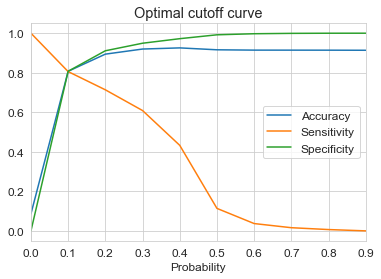

In [130]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

Metrics.plot.line(x ='Probability', y = ['Accuracy', 'Sensitivity', 'Specificity'])
plt.title('Optimal cutoff curve')
plt.show()

**From the above graph, we have obtained our optimal cutoff value as 0.1.**

In [131]:
# Adding the column 'final_predicted' to our dataframe which is obtained with the cutoff value 0.1

Prob_5['Final_predicted'] = Prob_5.Predicted_prob.map(lambda x: 1 if x > 0.1 else 0)

Prob_5.head()

Converted  Predicted_prob  Customer  Predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.000010     87347          0    1    0    0    0    0   
1          0        0.029512     29771          0    1    0    0    0    0   
2          0        0.171905     93799          0    1    1    0    0    0   
3          0        0.297413     98997          0    1    1    1    0    0   
4          0        0.029661     52930          0    1    0    0    0    0   

   0.5  0.6  0.7  0.8  0.9  Final_predicted  
0    0    0    0    0    0                0  
1    0    0    0    0    0                0  
2    0    0    0    0    0                1  
3    0    0    0    0    0                1  
4    0    0    0    0    0                0

In [132]:
# Let's check the overall accuracy.

metrics.accuracy_score(Prob_5.Converted, Prob_5.Final_predicted)

0.8073385751727424

In [133]:
# Creating our final confusion matrix with probability cutoff at 0.1

confusion_matrix_2 = metrics.confusion_matrix(Prob_5.Converted, Prob_5.Final_predicted)
confusion_matrix_2

array([[15482,  3691],
       [  352,  1460]], dtype=int64)

In [134]:
# Lets derive the followuing to find specificity and sensitivity

TP = confusion_matrix_2[1,1] # true positive 
TN = confusion_matrix_2[0,0] # true negatives
FP = confusion_matrix_2[0,1] # false positives
FN = confusion_matrix_2[1,0] # false negatives

In [135]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.8057395143487859

In [136]:
# Let us calculate specificity

TN / float(TN+FP)

0.8074896990559641

### Precision Recall trade off

It can be helpful to pick a point on the chart that represents a nice mix of precision and recall, and then get a sense of how accurate the model is at that point.

In [137]:
# Importing precision and recall curve from sklearn

from sklearn.metrics import precision_recall_curve

Prob_5.Converted, Prob_5.Predicted

(0        0
 1        0
 2        0
 3        0
 4        0
         ..
 20980    0
 20981    1
 20982    1
 20983    0
 20984    0
 Name: Converted, Length: 20985, dtype: int64, 0        0
 1        0
 2        0
 3        0
 4        0
         ..
 20980    0
 20981    0
 20982    0
 20983    0
 20984    0
 Name: Predicted, Length: 20985, dtype: int64)

In [138]:
p, r, thresholds = precision_recall_curve(Prob_5.Converted, Prob_5.Predicted_prob)

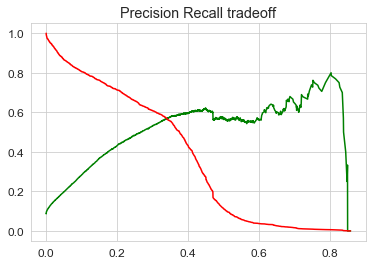

In [139]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.title('Precision Recall tradeoff')
plt.show()

**From the graph, the precision recall trade off value is 0.35.**

In [140]:
# Adding the column 'precision_predicted' to our dataframe which is obtained with the cutoff value 0.35

Prob_5['precision_predicted'] = Prob_5.Predicted_prob.map(lambda x: 1 if x > 0.35 else 0)

Prob_5.head()

Converted  Predicted_prob  Customer  Predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.000010     87347          0    1    0    0    0    0   
1          0        0.029512     29771          0    1    0    0    0    0   
2          0        0.171905     93799          0    1    1    0    0    0   
3          0        0.297413     98997          0    1    1    1    0    0   
4          0        0.029661     52930          0    1    0    0    0    0   

   0.5  0.6  0.7  0.8  0.9  Final_predicted  precision_predicted  
0    0    0    0    0    0                0                    0  
1    0    0    0    0    0                0                    0  
2    0    0    0    0    0                1                    0  
3    0    0    0    0    0                1                    0  
4    0    0    0    0    0                0                    0

In [141]:
# Let's check the overall accuracy.

metrics.accuracy_score(Prob_5.Converted, Prob_5.precision_predicted)

0.9264236359304265

In [142]:
# Creating our final confusion matrix with probability cutoff at 0.35

confusion_matrix_3 = metrics.confusion_matrix(Prob_5.Converted, Prob_5.precision_predicted)
confusion_matrix_3

array([[18435,   738],
       [  806,  1006]], dtype=int64)

In [143]:
# Lets derive the followuing to find specificity and sensitivity

TP = confusion_matrix_3[1,1] # true positive 
TN = confusion_matrix_3[0,0] # true negatives
FP = confusion_matrix_3[0,1] # false positives
FN = confusion_matrix_3[1,0] # false negatives

In [144]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.5551876379690949

In [145]:
# Let us calculate specificity

TN / float(TN+FP)

0.9615083711469253

**Our Logistic Regression model evaluation metrics on train data are:**
- **Accuracy - 91.6%**
- **Sensitivity - 11.3%**
- **Specificity - 99.9%**

**Clearly the above model is a very bad model. Lets find the optimal cutoff for the above model and evaluate.**

**Metrics obtained using optimal cut off value as 0.1 on train data are:**
- **Accuracy - 80.7%**
- **Sensitivity - 80.5%**
- **Specificity - 80.7%**

**Metrics obtained using precision-recall cut off value as 0.35 on train data are:**
- **Accuracy - 92.6%**
- **Sensitivity - 55.5%**
- **Specificity - 96.1%**

**From the above evaluation metrics, we chose the optimal cut off value of 0.1. Lets make predictions on the test set and evaluate our model.**

### Making predictions on the test set

In [146]:
# Scaling the test data

X_test[cols_11] = scaler.transform(X_test[cols_11])

X_test.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
73904  0.328079 -0.479811  0.109828    -0.152711    -0.377399    -0.153189   
58941 -1.327128  0.001066 -0.207670    -0.639111     0.053294    -0.203846   
45397 -0.783631 -0.639003 -0.165878     1.104012     0.792850     1.114581   
42998  0.901873  1.169146  1.090325     1.208317     3.633838     3.914012   
32938  0.124598  0.805456 -0.206718    -0.637051    -0.479704    -0.620133   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
73904     -0.376177     -0.403323     -0.293384       0.990396       0.705497   
58941     -0.436672      1.537155      1.268136      -0.290297      -0.262571   
45397     -0.709246     -0.450782     -0.584223      -0.290297      -0.262571   
42998      0.156119     -0.134681     -0.500313       2.505377      -0.262571   
32938      0.080148      0.688364     -0.147702      -0.290297      -0.262571   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
73904       2.548377       0.942273       0.317596       1.553567   
58941      -0.261868      -0.309208      -0.285229      -0.279872   
45397      -0.261868      -0.309208      -0.285229      -0.279872   
42998      -0.261868       0.375492      -0.285229      -0.279872   
32938      -0.261868      -0.309208      -0.285229      -0.279872   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
73904          0.112489          0.135675          0.307557         -0.128188   
58941         -0.526738         -0.066554         -0.409900         -0.650547   
45397         -0.377450         -0.473480         -0.334678         -0.743740   
42998         -0.228974         -0.467471         -0.446047         -0.659333   
32938         -0.540054         -0.531928         -0.530323         -0.803821   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
73904          0.120075         -0.029961         -0.245382         -0.434789   
58941          0.063753         -0.036534          1.415150          3.028429   
45397         -0.724905         -0.694595         -0.431565         -0.226696   
42998         -0.567174         -0.663558         -0.316146         -0.349505   
32938         -0.785925         -0.676013         -0.329886         -0.390441   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
73904         -0.090815         -0.336333         -0.341806         -0.335585   
58941          3.464225          0.599171          0.159649          0.582293   
45397         -0.424798          1.300176          0.002242         -0.100003   
42998         -0.320428         -0.336333         -0.341806         -0.335585   
32938          0.215095          0.644076         -0.341806         -0.335585   

       loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
73904     -0.060405      0.104514      0.096883         -0.396753   
58941     -0.640844      0.127147     -0.082026         -0.432728   
45397     -0.710772     -0.741791     -0.656087          1.476783   
42998     -0.577561     -0.641527     -0.682938          1.442103   
32938     -0.825371     -0.818381     -0.706274         -0.424396   

       std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
73904         -0.486434         -0.424876         -0.322785         -0.485698   
58941          0.135715         -0.013504         -0.098975          1.653320   
45397          1.144626          1.446571         -0.303836         -0.055820   
42998          4.347472          4.657189          0.602166          0.246376   
32938         -0.266102         -0.435197          0.666028          1.298352   

       std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
73904         -0.396108         -0.246117         -0.245187         -0.242394   
58941          1.448524         -0.246117          0.026210          0.948179   
45397         -0.173059         

In [147]:
# Assigning our final list of columns to 'X_test'

X_test_final = X_test[Features]
X_test_final.head()

arpu_8  offnet_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_8  \
73904  0.109828     -0.403323          0.307557         -0.029961   
58941 -0.207670      1.537155         -0.409900         -0.036534   
45397 -0.165878     -0.450782         -0.334678         -0.694595   
42998  1.090325     -0.134681         -0.446047         -0.663558   
32938 -0.206718      0.688364         -0.530323         -0.676013   

       std_og_t2t_mou_8  std_og_t2m_mou_8  total_ic_mou_8  spl_ic_mou_8  \
73904         -0.424876         -0.396108       -0.121876     -0.254845   
58941         -0.013504          1.448524       -0.187596     -0.254845   
45397          1.446571         -0.173059       -0.721138     -0.254845   
42998          4.657189         -0.092964       -0.168481     -0.254845   
32938         -0.435197          0.312268       -0.443235     -0.254845   

       total_rech_num_8  last_day_rch_amt_8  max_rech_data_8  
73904          0.335121            0.532590        -0.569463  
58941         -0.240795            0.350670        -0.569463  
45397         -0.240795           -0.831806        -0.569463  
42998          0.335121           -0.677175        -0.389155  
32938          0.104754            0.077791         1.063914

In [148]:
# Adding constant to X_test_final

X_test_final_sm = sm.add_constant(X_test_final)

In [149]:
# Making predictions on the test set

y_test_pred = Model_5.predict(X_test_final_sm)

In [150]:
y_test_pred[:10]

73904    0.022677
58941    0.036592
45397    0.196189
42998    0.027109
32938    0.035866
49961    0.077667
6602     0.000959
18093    0.255620
24490    0.330071
48619    0.014989
dtype: float64

In [151]:
# Converting y_pred to a dataframe which is an array

df_test_pred = pd.DataFrame(y_test_pred)
df_test_pred.head()

0
73904  0.022677
58941  0.036592
45397  0.196189
42998  0.027109
32938  0.035866

In [152]:
# Converting y_test to dataframe

df_test = pd.DataFrame(y_test)
df_test.head()

churn
73904      0
58941      0
45397      0
42998      0
32938      0

In [153]:
# Assigning Lead to index

df_test['Customer'] = df_test.index

In [154]:
# Removing index for both dataframes to append them side by side

df_test_pred.reset_index(drop = True, inplace = True)
df_test.reset_index(drop = True, inplace = True)

In [155]:
# Appending both the dataframes

Prob_test = pd.concat([df_test, df_test_pred],axis = 1)

Prob_test.head()

churn  Customer         0
0      0     73904  0.022677
1      0     58941  0.036592
2      0     45397  0.196189
3      0     42998  0.027109
4      0     32938  0.035866

In [156]:
# Renaming the column

Prob_test = Prob_test.rename(columns = { 0 : 'Predicted_prob'})

Prob_test.head()

churn  Customer  Predicted_prob
0      0     73904        0.022677
1      0     58941        0.036592
2      0     45397        0.196189
3      0     42998        0.027109
4      0     32938        0.035866

In [157]:
# Calculating the final predicted values of test data using optimal cutoff 0.1

Prob_test['Final_predicted'] = Prob_test.Predicted_prob.map(lambda x: 1 if x > 0.1 else 0)

In [158]:
Prob_test.head()

churn  Customer  Predicted_prob  Final_predicted
0      0     73904        0.022677                0
1      0     58941        0.036592                0
2      0     45397        0.196189                1
3      0     42998        0.027109                0
4      0     32938        0.035866                0

In [159]:
# Let's check the overall accuracy

metrics.accuracy_score(Prob_test.churn, Prob_test.Final_predicted)

0.8086502112519457

In [160]:
# Confusion matrix for our test data

confusion_matrix_4 = metrics.confusion_matrix(Prob_test.churn, Prob_test.Final_predicted)
confusion_matrix_4

array([[6637, 1580],
       [ 141,  636]], dtype=int64)

In [161]:
TP = confusion_matrix_4[1,1] # true positive 
TN = confusion_matrix_4[0,0] # true negatives
FP = confusion_matrix_4[0,1] # false positives
FN = confusion_matrix_4[1,0] # false negatives

In [162]:
# Let's see the sensitivity of our logistic regression model

Sensitivity = TP / float(TP+FN)
Sensitivity

0.8185328185328186

In [163]:
# Let us calculate specificity

TN / float(TN+FP)

0.8077157113301692

In [164]:
# Let us calculate Precision

Precision = TP / float(TP+FP)
Precision

0.2870036101083033

In [165]:
# Let's see the F1 score of our final logistic regression model

F1_score = 2*(Precision * Sensitivity)/(Precision + Sensitivity)
F1_score

0.42499164717674576

**Our Logistic Regression model evaluation metrics on test data with optimal cut off value of 0.1 are:**
- **Accuracy - 80.8%**
- **Sensitivity - 81.8%**
- **Specificity - 80.7%**

## Principal Component Analysis 

In [166]:
# Performing PCA on the data

from sklearn.decomposition import PCA

pca = PCA(random_state = 0)

pca.fit(X_train)

PCA(random_state=0)

In [167]:
# Extracting PCA components

pca.components_

array([[ 7.26543038e-02,  7.42374581e-02,  9.45146023e-02, ...,
         1.37898529e-02, -5.03499355e-03,  6.81287334e-02],
       [ 8.43848137e-02,  1.04751157e-01,  1.06258998e-01, ...,
        -9.44048817e-03,  2.95666612e-02,  2.70284660e-02],
       [ 1.15847429e-01,  1.91648348e-01,  1.74526220e-01, ...,
         3.63882720e-02, -8.18116824e-03, -8.10074016e-02],
       ...,
       [-4.33280252e-04, -1.21473931e-03,  1.13563350e-03, ...,
         2.14860920e-04, -3.71969574e-04, -7.07097948e-01],
       [ 0.00000000e+00,  2.98808170e-16, -6.66061774e-17, ...,
         4.65572438e-17, -6.08351802e-17,  2.86296075e-15],
       [-0.00000000e+00,  1.48871971e-17,  8.82477009e-17, ...,
         7.59372080e-17,  2.43935367e-16,  3.24842568e-16]])

In [168]:
# Calculating Variance

pca.explained_variance_ratio_

array([1.05537050e-01, 8.67351146e-02, 7.12304799e-02, 4.93468267e-02,
       4.14727685e-02, 4.08791743e-02, 3.45325551e-02, 3.20963427e-02,
       2.66632006e-02, 2.42822660e-02, 2.30432425e-02, 2.18055739e-02,
       1.99738915e-02, 1.83179631e-02, 1.66824230e-02, 1.64164750e-02,
       1.51699299e-02, 1.47977031e-02, 1.40774080e-02, 1.35741749e-02,
       1.31654061e-02, 1.11493642e-02, 1.06067046e-02, 9.95002619e-03,
       9.77041061e-03, 9.64101726e-03, 9.09383387e-03, 8.83252858e-03,
       8.10295709e-03, 7.71850076e-03, 7.35243889e-03, 7.16361341e-03,
       7.08632273e-03, 6.89224105e-03, 6.51303348e-03, 6.14425805e-03,
       5.94589255e-03, 5.86063245e-03, 5.69588377e-03, 5.64769879e-03,
       5.40182707e-03, 5.36546752e-03, 5.08849543e-03, 4.89458326e-03,
       4.74661021e-03, 4.53287710e-03, 4.43621513e-03, 4.37647985e-03,
       3.90599759e-03, 3.79106511e-03, 3.73085873e-03, 3.55431011e-03,
       3.46691095e-03, 3.36942059e-03, 3.20241848e-03, 3.06148012e-03,
      

Text(0, 0.5, 'Eigen Values')

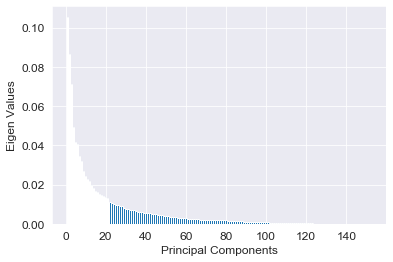

In [169]:
# Plotting variance ratio 

sns.set_style('darkgrid')
plt.bar(range(1,len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Principal Components')
plt.ylabel('Eigen Values')

In [170]:
# As we have more than 150 columns, lets check the cumulative variance to identify how many components explain 90% of data

var_cumu = np.cumsum(pca.explained_variance_ratio_)

### Scree Plot

Text(0, 0.5, 'Eigen Values')

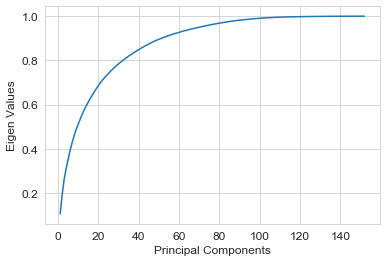

In [171]:
sns.set_style('whitegrid')
plt.plot(range(1,len(var_cumu)+1), var_cumu)
plt.xlabel('Principal Components')
plt.ylabel('Eigen Values')

**From the above scree plot, 70 components explain about 95% of our data and 60 components explain about 90% of our data.**

In [172]:
# We will go with 70 PCs as they are explaining 95% of the data which we can see from the plot.

pc70 = PCA(n_components = 70, random_state = 0)

In [173]:
# Lets transform our train and test data with PCA

pc70.fit(X_train)

X_train_pca = pc70.transform(X_train)
X_test_pca = pc70.transform(X_test)

In [174]:
# Lets check their shape

print(X_train_pca.shape)
print(X_test_pca.shape)

(20985, 70)
(8994, 70)


### PCA with Logistic Regression

In [175]:
# Lets build Logistic regression model over PCA using the 'Pipeline' from sklearn library
# We are generating the pipeline with 70 components and using logistic model on these components
# We are having data imbalamce in our target column so, we will use weight of class technique - class weight = 'balanced'

from sklearn.pipeline import Pipeline

pca = PCA(n_components = 70)
logreg = LogisticRegression(class_weight = 'balanced', random_state = 0) 

pipe = Pipeline([('pca', pca), ('logistic', logreg)])

In [176]:
# Fitting the pipeline to our train data

pipe.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=70)),
                ('logistic',
                 LogisticRegression(class_weight='balanced', random_state=0))])

In [177]:
# Lets check the score on our train data

pipe.score(X_train, y_train)

0.8129616392661425

In [178]:
# Evaluation on our test data

y_pred = pipe.predict(X_test)

In [179]:
# Confusion matrix

confusion_matrix_5 = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix_5)

[[6654 1563]
 [ 127  650]]


In [180]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_test, y_pred))

0.8120969535245719


In [181]:
# Lets derive the followuing to find specificity and sensitivity

TP = confusion_matrix_5[1,1] # true positive 
TN = confusion_matrix_5[0,0] # true negatives
FP = confusion_matrix_5[0,1] # false positives
FN = confusion_matrix_5[1,0] # false negatives

In [182]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.8365508365508365

In [183]:
# Let us calculate specificity

TN / float(TN+FP)

0.809784592917123

**Our PCA with Logistic regression model evaluation metrics on our test data are:**
- **Accuracy - 81.1%**
- **Sensitivity - 83.2%**
- **Specificity - 80.9%**

### Hyperparameter tuning for PCA with Logistic Regression

In [184]:
# We will now tune our model with both 70 and 60 principal components

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

pca = PCA()

logreg = LogisticRegression(class_weight = 'balanced', random_state = 0)

pipe = Pipeline([('pca', pca), ('logistic', logreg)])

# Hyperparameter tuning

params = {'pca__n_components': [60, 70], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# Creating 3 folds

folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 0)

model = GridSearchCV(estimator = pipe, cv = folds, param_grid = params, scoring = 'roc_auc', n_jobs = -1, verbose = 1)

In [185]:
# Fitting our model

model.fit(X_train, y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:   35.2s finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('logistic',
                                        LogisticRegression(class_weight='balanced',
                                                           random_state=0))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2'],
                         'pca__n_components': [60, 70]},
             scoring='roc_auc', verbose=1)

In [186]:
# Cross validation results

pd.DataFrame(model.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        3.307971      0.054812         0.000000        0.000000   
1        3.173825      0.120556         0.000000        0.000000   
2        2.445861      0.743231         0.336951        0.148834   
3        2.271922      0.363113         0.105010        0.024080   
4        1.846638      0.130685         0.000000        0.000000   
5        2.393832      0.195854         0.000000        0.000000   
6        2.497798      0.354388         0.117600        0.020913   
7        2.581570      0.531952         0.088976        0.011131   
8        1.835624      0.342309         0.000000        0.000000   
9        2.098477      0.367608         0.000000        0.000000   
10       2.470273      0.402145         0.100647        0.024234   
11       2.584268      0.415907         0.096426        0.012742   
12       1.904370      0.284352         0.000000        0.000000   
13       2.054738      0.480684         0.000000        0.000000   
14       2.088255      0.513398         0.079973        0.014333   
15       2.569204      0.352614         0.090124        0.029545   
16       1.614765      0.355843         0.000000        0.000000   
17       1.971644      0.317450         0.000000        0.000000   
18       2.241203      0.333180         0.102251        0.034631   
19       2.852725      0.455782         0.097713        0.018573   
20       1.897377      0.314203         0.000000        0.000000   
21       1.742421      0.132609         0.000000        0.000000   
22       2.328969      0.105692         0.087413        0.028425   
23       2.449426      0.154297         0.065967        0.014356   
24       1.748540      0.127219         0.000000        0.000000   
25       1.762573      0.240016         0.000000        0.000000   
26       2.357595      0.318523         0.110708        0.021465   
27       3.060270      0.393630         0.131554        0.047494   
28       2.181966      0.340328         0.000000        0.000000   
29       2.240685      0.342674         0.000000        0.000000   
30       2.022891      0.158492         0.064320        0.004058   
31       1.951190      0.146255         0.050053        0.012771   

   param_logistic__C param_logistic__penalty param_pca__n_components  \
0                0.1                      l1                      60   
1                0.1                      l1                      70   
2                0.1                      l2                      60   
3                0.1                      l2                      70   
4                0.5                      l1                      60   
5                0.5                      l1                      70   
6                0.5                      l2                      60   
7                0.5                      l2                      70   
8                  1                      l1                      60   
9                  1                      l1                      70   
10                 1                      l2                      60   
11                 1                      l2                      70   
12                 2                      l1                      60   
13                 2                      l1                      70   
14                 2                      l2                      60   
15                 2                      l2                      70   
16                 3                      l1                      60   
17                 3                      l1                      70   
18                 3                      l2                      60   
19                 3                      l2                      70   
20                 4                      l1                      60   
21                 4                      l1                      70   
22                 4                      l2                      60   
23                 4           

In [187]:
# Extracting best hyperparameters

print("AUC: ", model.best_score_)
print("Hyperparameters: ", model.best_params_)

AUC:  0.8850979733848959
Hyperparameters:  {'logistic__C': 1, 'logistic__penalty': 'l2', 'pca__n_components': 60}


In [188]:
# Evaluation on our test data

y_pred = model.predict(X_test)

In [189]:
# Confusion matrix

confusion_matrix_6 = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix_6)

[[6661 1556]
 [ 126  651]]


In [190]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_test, y_pred))

0.8129864354013787


In [191]:
# Lets derive the followuing to find specificity and sensitivity

TP = confusion_matrix_6[1,1] # true positive 
TN = confusion_matrix_6[0,0] # true negatives
FP = confusion_matrix_6[0,1] # false positives
FN = confusion_matrix_6[1,0] # false negatives

In [192]:
# Let's see the sensitivity of our logistic regression model

Sensitivity = TP / float(TP+FN)
Sensitivity

0.8378378378378378

In [193]:
# Let us calculate specificity

TN / float(TN+FP)

0.8106364853352805

In [194]:
# Let us calculate Precision

Precision = TP / float(TP+FP)
Precision

0.2949705482555505

In [195]:
# Let's see the F1 score of our final logistic regression model

F1_score = 2*(Precision * Sensitivity)/(Precision + Sensitivity)
F1_score

0.43632707774798923

**Our PCA with Logistic regression model evaluation metrics after hyperparameter tuning are:**
- **Accuracy - 81.1%**
- **Sensitivity - 83.2%**
- **Specificity - 80.9%**

### PCA with Random Forests

In [196]:
# Importing random forest classifier from sklearn library

from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters

rfc = RandomForestClassifier(class_weight = 'balanced', random_state = 0)

In [197]:
# Fitting our model on PCA transformed data

rfc.fit(X_train_pca, y_train)

RandomForestClassifier(class_weight='balanced', random_state=0)

In [198]:
# Making predictions on PCA transformed test data

predictions = rfc.predict(X_test_pca)

In [199]:
# Confusion matrix

confusion_matrix_7 = metrics.confusion_matrix(y_test, predictions)
print(confusion_matrix_7)

[[8166   51]
 [ 682   95]]


In [200]:
print(metrics.accuracy_score(y_test,predictions))

0.9185012230375806


In [201]:
# Lets derive the followuing to find specificity and sensitivity

TP = confusion_matrix_7[1,1] # true positive 
TN = confusion_matrix_7[0,0] # true negatives
FP = confusion_matrix_7[0,1] # false positives
FN = confusion_matrix_7[1,0] # false negatives

In [202]:
# Let's see the sensitivity of our model

TP / float(TP+FN)

0.12226512226512226

In [203]:
# Let us calculate specificity

TN / float(TN+FP)

0.9937933552391384

**Our PCA with Random Forest model evaluation metrics on our test data without hyperparameter tuning are:**
- **Accuracy - 91.8%**
- **Sensitivity - 12.2%**
- **Specificity - 99.3%**

### Hyperparameter tuning for PCA with Random Forest

In [204]:
# Tuning 'max_depth'

from sklearn.model_selection import KFold

# Specify number of folds for k-fold CV

n_folds = 3

# Parameters to build the model

parameters = {'max_depth': range(2, 20, 5)}

# Instantiate the model

rfc = RandomForestClassifier(class_weight = 'balanced', random_state = 0)


# Fitting tree on PCA transformed data

model = GridSearchCV(estimator = rfc, param_grid = parameters, cv = n_folds, scoring = "accuracy", return_train_score = True, 
                     n_jobs = -1, verbose = 1)

model.fit(X_train_pca, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  12 | elapsed:   24.2s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   31.3s finished


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=0),
             n_jobs=-1, param_grid={'max_depth': range(2, 20, 5)},
             return_train_score=True, scoring='accuracy', verbose=1)

In [205]:
# Cross validation results

results_1 = pd.DataFrame(model.cv_results_)
results_1

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       4.753229      0.067313         0.155741        0.002841   
1      14.108125      0.343369         0.170388        0.012052   
2      18.165548      0.827774         0.163998        0.018483   
3      17.663965      0.910037         0.200541        0.010945   

  param_max_depth             params  split0_test_score  split1_test_score  \
0               2   {'max_depth': 2}           0.802287           0.791137   
1               7   {'max_depth': 7}           0.881344           0.881201   
2              12  {'max_depth': 12}           0.912223           0.912509   
3              17  {'max_depth': 17}           0.916512           0.919085   

   split2_test_score  mean_test_score  std_test_score  rank_test_score  \
0           0.794139         0.795854        0.004711                4   
1           0.886633         0.883059        0.002528                3   
2           0.911794         0.912175        0.000294                2   
3           0.917370         0.917655        0.001070                1   

   split0_train_score  split1_train_score  split2_train_score  \
0            0.801787            0.799786            0.796426   
1            0.906076            0.904789            0.909507   
2            0.964189            0.967191            0.966905   
3            0.982845            0.986633            0.986705   

   mean_train_score  std_train_score  
0          0.799333         0.002212  
1          0.906791         0.001991  
2          0.966095         0.001353  
3          0.985394         0.001803

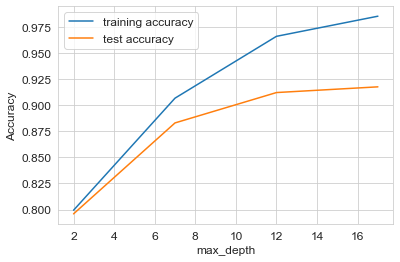

In [206]:
# Plotting accuracy 

plt.figure()

plt.plot(results_1["param_max_depth"], 
         results_1["mean_train_score"], 
         label = "training accuracy")

plt.plot(results_1["param_max_depth"], 
         results_1["mean_test_score"], 
         label = "test accuracy")

plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**We can see that as we increase the value of max_depth, both train and test scores increase till a point, but after that test score increases at a slow pace. The ensemble tries to overfit as we increase the max_depth. Thus, controlling the depth of the constituent trees will help reduce overfitting in the forest.**

In [207]:
# Tuning 'n_estimators' with 'max_depth = 4'

n_folds = 3

parameters = {'n_estimators': range(100, 1500, 400)}

rfc = RandomForestClassifier(class_weight = 'balanced', max_depth = 4, random_state = 0)

model = GridSearchCV(estimator = rfc, param_grid = parameters, cv = n_folds, scoring = "accuracy", return_train_score = True, 
                     n_jobs = -1, verbose = 1)

model.fit(X_train_pca, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  12 | elapsed:  1.8min remaining:   21.6s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  2.3min finished


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=4, random_state=0),
             n_jobs=-1, param_grid={'n_estimators': range(100, 1500, 400)},
             return_train_score=True, scoring='accuracy', verbose=1)

In [208]:
# Cross validation results

results_2 = pd.DataFrame(model.cv_results_)
results_2

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       8.550595      0.304355         0.167045        0.003099   
1      43.794411      0.885632         0.722515        0.055323   
2      72.552180      0.386149         1.124554        0.130418   
3      92.193454      4.408468         1.298454        0.085565   

  param_n_estimators                  params  split0_test_score  \
0                100   {'n_estimators': 100}           0.849607   
1                500   {'n_estimators': 500}           0.845604   
2                900   {'n_estimators': 900}           0.844317   
3               1300  {'n_estimators': 1300}           0.844031   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.844031           0.842602         0.845413        0.003022   
1           0.844031           0.845032         0.844889        0.000650   
2           0.841601           0.847177         0.844365        0.002276   
3           0.843746           0.846462         0.844746        0.001219   

   rank_test_score  split0_train_score  split1_train_score  \
0                1            0.858399            0.856612   
1                2            0.853181            0.853610   
2                4            0.851465            0.853467   
3                3            0.852180            0.853967   

   split2_train_score  mean_train_score  std_train_score  
0            0.854539          0.856517         0.001577  
1            0.856683          0.854491         0.001560  
2            0.856683          0.853872         0.002149  
3            0.856969          0.854372         0.001976

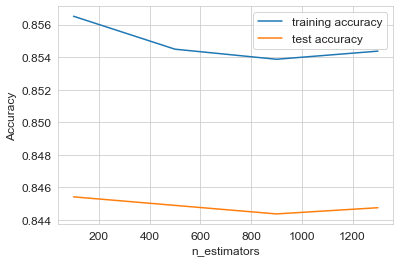

In [209]:
# Plotting accuracy 

plt.figure()

plt.plot(results_2["param_n_estimators"], 
         results_2["mean_train_score"], 
         label = "training accuracy")

plt.plot(results_2["param_n_estimators"], 
         results_2["mean_test_score"], 
         label = "test accuracy")

plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [210]:
# Tuning 'max_features' which is the maximum number of features considered for splitting at a node with 'max_depth = 4'

n_folds = 3

parameters = {'max_features': [4, 8, 14, 20, 24]}

rfc = RandomForestClassifier(class_weight = 'balanced', max_depth = 4, random_state = 0)

model = GridSearchCV(estimator = rfc, param_grid = parameters, cv = n_folds, scoring = "accuracy", return_train_score = True, 
                     n_jobs = -1, verbose = 1)

model.fit(X_train_pca, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   35.3s finished


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=4, random_state=0),
             n_jobs=-1, param_grid={'max_features': [4, 8, 14, 20, 24]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [211]:
# Cross validation results

results_3 = pd.DataFrame(model.cv_results_)
results_3

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       4.882894      0.311601         0.162555        0.021149   
1       9.160652      0.802135         0.157163        0.005566   
2      15.485295      0.911123         0.144552        0.005797   
3      19.072475      0.481852         0.122398        0.023363   
4      20.044113      0.996350         0.087508        0.004571   

  param_max_features                params  split0_test_score  \
0                  4   {'max_features': 4}           0.838027   
1                  8   {'max_features': 8}           0.849607   
2                 14  {'max_features': 14}           0.850322   
3                 20  {'max_features': 20}           0.841172   
4                 24  {'max_features': 24}           0.847034   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.830021           0.836455         0.834834        0.003463   
1           0.844031           0.842602         0.845413        0.003022   
2           0.845747           0.844746         0.846938        0.002427   
3           0.836598           0.837741         0.838504        0.001944   
4           0.837455           0.838170         0.840886        0.004357   

   rank_test_score  split0_train_score  split1_train_score  \
0                5            0.847320            0.838027   
1                2            0.858399            0.856612   
2                1            0.855039            0.851322   
3                4            0.845533            0.845533   
4                3            0.848034            0.846819   

   split2_train_score  mean_train_score  std_train_score  
0            0.851966          0.845771         0.005795  
1            0.854539          0.856517         0.001577  
2            0.851179          0.852514         0.001787  
3            0.843174          0.844746         0.001112  
4            0.844746          0.846533         0.001357

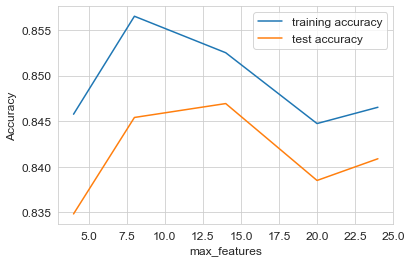

In [212]:
# Plotting accuracy

plt.figure()

plt.plot(results_3["param_max_features"], 
         results_3["mean_train_score"], 
         label = "training accuracy")

plt.plot(results_3["param_max_features"], 
         results_3["mean_test_score"], 
         label = "test accuracy")

plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [213]:
# Tuning 'min_samples_leaf' which is the minimum number of samples required to be at a leaf node with 'max_depth = 4'

n_folds = 3

parameters = {'min_samples_leaf': range(100, 400, 50)}

rfc = RandomForestClassifier(class_weight = 'balanced', max_depth = 4, random_state = 0)

model = GridSearchCV(estimator = rfc, param_grid = parameters, cv = n_folds, scoring = "accuracy", return_train_score = True, 
                     n_jobs = -1, verbose = 1)

model.fit(X_train_pca, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   24.7s finished


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=4, random_state=0),
             n_jobs=-1, param_grid={'min_samples_leaf': range(100, 400, 50)},
             return_train_score=True, scoring='accuracy', verbose=1)

In [214]:
# Cross validation results

results_4 = pd.DataFrame(model.cv_results_)
results_4

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       8.659772      0.268762         0.171374        0.011908   
1       8.382309      0.208508         0.167491        0.017135   
2       8.494938      0.150493         0.165807        0.018085   
3       8.726713      0.426672         0.170378        0.035079   
4       8.327206      0.461039         0.200459        0.034158   
5       7.536892      0.912024         0.145904        0.070497   

  param_min_samples_leaf                     params  split0_test_score  \
0                    100  {'min_samples_leaf': 100}           0.847462   
1                    150  {'min_samples_leaf': 150}           0.845175   
2                    200  {'min_samples_leaf': 200}           0.843174   
3                    250  {'min_samples_leaf': 250}           0.841887   
4                    300  {'min_samples_leaf': 300}           0.840886   
5                    350  {'min_samples_leaf': 350}           0.835311   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.837598           0.840600         0.841887        0.004129   
1           0.834453           0.838885         0.839504        0.004399   
2           0.831594           0.836455         0.837074        0.004748   
3           0.829878           0.834310         0.835359        0.004958   
4           0.828020           0.833881         0.834263        0.005260   
5           0.824303           0.831165         0.830260        0.004539   

   rank_test_score  split0_train_score  split1_train_score  \
0                1            0.850608            0.849607   
1                2            0.847534            0.847820   
2                3            0.845318            0.844031   
3                4            0.842602            0.842959   
4                5            0.842530            0.840600   
5                6            0.837455            0.833738   

   split2_train_score  mean_train_score  std_train_score  
0            0.848749          0.849655         0.000759  
1            0.846104          0.847153         0.000750  
2            0.841744          0.843698         0.001478  
3            0.840672          0.842078         0.001005  
4            0.839671          0.840934         0.001191  
5            0.837956          0.836383         0.001881

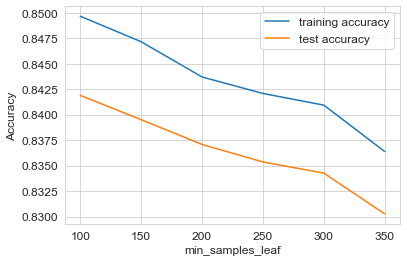

In [215]:
# Plotting accuracy 

plt.figure()

plt.plot(results_4["param_min_samples_leaf"], 
         results_4["mean_train_score"], 
         label = "training accuracy")

plt.plot(results_4["param_min_samples_leaf"], 
         results_4["mean_test_score"], 
         label = "test accuracy")

plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**We can see that the model starts of overfit as you decrease the value of min_samples_leaf.**

In [216]:
# Tuning 'min_samples_split' with 'max_depth = 4'

n_folds = 3

parameters = {'min_samples_split': range(200, 500, 50)}

rfc = RandomForestClassifier(class_weight = 'balanced', max_depth = 4, random_state = 0)

model = GridSearchCV(estimator = rfc, param_grid = parameters, cv = n_folds, scoring = "accuracy", return_train_score = True, 
                     n_jobs = -1, verbose = 1)

model.fit(X_train_pca, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   26.9s finished


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=4, random_state=0),
             n_jobs=-1, param_grid={'min_samples_split': range(200, 500, 50)},
             return_train_score=True, scoring='accuracy', verbose=1)

In [217]:
# Cross validation results

results_5 = pd.DataFrame(model.cv_results_)
results_5

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       9.232883      0.056563         0.200292        0.014503   
1       9.206031      0.125796         0.209838        0.032564   
2       9.121566      0.066127         0.186450        0.007217   
3       9.192900      0.043435         0.202292        0.007267   
4       9.255898      0.044938         0.228407        0.018574   
5       7.725201      1.083830         0.153827        0.052548   

  param_min_samples_split                      params  split0_test_score  \
0                     200  {'min_samples_split': 200}           0.848749   
1                     250  {'min_samples_split': 250}           0.847034   
2                     300  {'min_samples_split': 300}           0.849321   
3                     350  {'min_samples_split': 350}           0.846891   
4                     400  {'min_samples_split': 400}           0.844031   
5                     450  {'min_samples_split': 450}           0.845461   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.840600           0.844317         0.844556        0.003331   
1           0.841601           0.840172         0.842935        0.002956   
2           0.838313           0.841315         0.842983        0.004646   
3           0.835740           0.838742         0.840457        0.004711   
4           0.833881           0.838742         0.838885        0.004145   
5           0.836598           0.834167         0.838742        0.004854   

   rank_test_score  split0_train_score  split1_train_score  \
0                1            0.852538            0.853681   
1                3            0.851751            0.853896   
2                2            0.852966            0.851394   
3                4            0.852609            0.849535   
4                5            0.851251            0.845533   
5                6            0.849750            0.845390   

   split2_train_score  mean_train_score  std_train_score  
0            0.853967          0.853395         0.000618  
1            0.850536          0.852061         0.001389  
2            0.849964          0.851442         0.001226  
3            0.849964          0.850703         0.001359  
4            0.846462          0.847748         0.002506  
5            0.845318          0.846819         0.002072

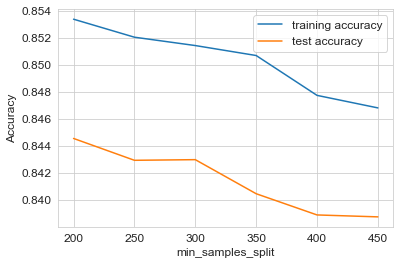

In [218]:
# Plotting accuracy 

plt.figure()

plt.plot(results_5["param_min_samples_split"], 
         results_5["mean_train_score"], 
         label = "training accuracy")

plt.plot(results_5["param_min_samples_split"], 
         results_5["mean_test_score"], 
         label = "test accuracy")

plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Grid Search to find Optimal Hyperparameters

In [219]:
# Creating the parameter grid based on the results of random search

param_grid = {'max_depth': [4,5,6], 
              'n_estimators': [100, 200, 400], 
              'max_features': [7, 12, 15], 
              'min_samples_leaf': range(100, 300, 150), 
              'min_samples_split': range(200, 500, 100)}

rfc = RandomForestClassifier(class_weight = 'balanced', random_state = 0)

grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 1)

In [220]:
# Fitting the grid search to the PCA transformed data

grid_search.fit(X_train_pca, y_train)

Fitting 3 folds for each of 162 candidates, totalling 486 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 27.8min
[Parallel(n_jobs=-1)]: Done 486 out of 486 | elapsed: 32.0min finished


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [4, 5, 6], 'max_features': [7, 12, 15],
                         'min_samples_leaf': range(100, 300, 150),
                         'min_samples_split': range(200, 500, 100),
                         'n_estimators': [100, 200, 400]},
             verbose=1)

In [221]:
# Printing the optimal accuracy score and hyperparameters

print('Accuracy of our model is',grid_search.best_score_,'using',grid_search.best_params_)

Accuracy of our model is 0.8596616630926852 using {'max_depth': 6, 'max_features': 7, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 400}


In [222]:
# Fitting the final model with the best parameters obtained from grid search

rfc = RandomForestClassifier(bootstrap = True,
                             max_depth = 6,
                             min_samples_leaf = 100, 
                             min_samples_split = 200,
                             max_features = 7,
                             n_estimators = 400, 
                             class_weight = 'balanced', 
                             random_state = 0)

In [223]:
# Fitting our final model on our PCA transformed train data

rfc.fit(X_train_pca, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=6, max_features=7,
                       min_samples_leaf=100, min_samples_split=200,
                       n_estimators=400, random_state=0)

In [224]:
# Predictions on our PCA transformed test data

predictions = rfc.predict(X_test_pca)

In [225]:
# Confusion matrix

confusion_matrix_8 = metrics.confusion_matrix(y_test, predictions)
print(confusion_matrix_8)

[[7111 1106]
 [ 185  592]]


In [226]:
print(metrics.accuracy_score(y_test, predictions))

0.8564598621303091


In [227]:
# Lets derive the followuing to find specificity and sensitivity

TP = confusion_matrix_8[1,1] # true positive 
TN = confusion_matrix_8[0,0] # true negatives
FP = confusion_matrix_8[0,1] # false positives
FN = confusion_matrix_8[1,0] # false negatives

In [228]:
# Let's see the sensitivity of our model

Sensitivity = TP / float(TP+FN)
Sensitivity

0.7619047619047619

In [229]:
# Let us calculate specificity

TN / float(TN+FP)

0.8654009979311185

In [230]:
# Let us calculate Precision

Precision = TP / float(TP+FP)
Precision

0.3486454652532391

In [231]:
# Let's see the F1 score of our final logistic regression model

F1_score = 2*(Precision * Sensitivity)/(Precision + Sensitivity)
F1_score

0.4783838383838383

**Our PCA with Random Forest model evaluation metrics on our test data after hyperparameter tuning are:**
- **Accuracy - 85.6%**
- **Sensitivity - 76.1%**
- **Specificity - 86.5%**

### PCA with Decision Trees

In [232]:
# Importing decision tree classifier from sklearn library

from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree

dtc = DecisionTreeClassifier(max_depth = 5, class_weight = 'balanced', random_state = 0)

dtc.fit(X_train_pca, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=0)

In [233]:
# Making predictions on PCA transformed test data

predictions = dtc.predict(X_test_pca)

In [234]:
# Confusion matrix

confusion_matrix_9 = metrics.confusion_matrix(y_test, predictions)
print(confusion_matrix_9)

[[6440 1777]
 [ 147  630]]


In [235]:
print(metrics.accuracy_score(y_test, predictions))

0.7860796086279742


In [236]:
# Lets derive the followuing to find specificity and sensitivity

TP = confusion_matrix_9[1,1] # true positive 
TN = confusion_matrix_9[0,0] # true negatives
FP = confusion_matrix_9[0,1] # false positives
FN = confusion_matrix_9[1,0] # false negatives

In [237]:
# Let's see the sensitivity of our model

TP / float(TP+FN)

0.8108108108108109

In [238]:
# Let us calculate specificity

TN / float(TN+FP)

0.7837410247048802

**Our PCA with Decision Trees evaluation metrics on our test data without hyperparameter tuning are:**
- **Accuracy - 78.6%**
- **Sensitivity - 81.0%**
- **Specificity - 78.3%**

### Hyperparameter tuning for PCA with Decision Trees

In [239]:
# Tuning 'max_depth'

n_folds = 3

parameters = {'max_depth': range(1, 40)}

dtree = DecisionTreeClassifier(class_weight = 'balanced', random_state = 0)

tree = GridSearchCV(dtree, parameters, cv = n_folds, scoring = "accuracy", return_train_score = True, n_jobs = -1, verbose = 1)

tree.fit(X_train_pca, y_train)

Fitting 3 folds for each of 39 candidates, totalling 117 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 117 out of 117 | elapsed:   31.8s finished


GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=0),
             n_jobs=-1, param_grid={'max_depth': range(1, 40)},
             return_train_score=True, scoring='accuracy', verbose=1)

In [240]:
# Scores of GridSearch CV

scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.289209      0.010959         0.005319        0.000471   
1       0.442810      0.013605         0.004654        0.000470   
2       0.575125      0.040554         0.004654        0.000470   
3       0.665219      0.017635         0.004655        0.000471   
4       0.810495      0.006219         0.004654        0.000469   

  param_max_depth            params  split0_test_score  split1_test_score  \
0               1  {'max_depth': 1}           0.762402           0.769836   
1               2  {'max_depth': 2}           0.740100           0.734096   
2               3  {'max_depth': 3}           0.791422           0.804289   
3               4  {'max_depth': 4}           0.797427           0.805718   
4               5  {'max_depth': 5}           0.808721           0.797856   

   split2_test_score  mean_test_score  std_test_score  rank_test_score  \
0           0.785561         0.772599        0.009655               38   
1           0.582559         0.685585        0.072892               39   
2           0.764689         0.786800        0.016494               37   
3           0.793567         0.798904        0.005070               36   
4           0.808721         0.805099        0.005122               35   

   split0_train_score  split1_train_score  split2_train_score  \
0            0.759257            0.779628            0.786848   
1            0.743603            0.747034            0.588992   
2            0.787420            0.816798            0.761401   
3            0.797141            0.816297            0.794210   
4            0.821015            0.812080            0.820944   

   mean_train_score  std_train_score  
0          0.775244         0.011683  
1          0.693209         0.073706  
2          0.788539         0.022629  
3          0.802549         0.009795  
4          0.818013         0.004195

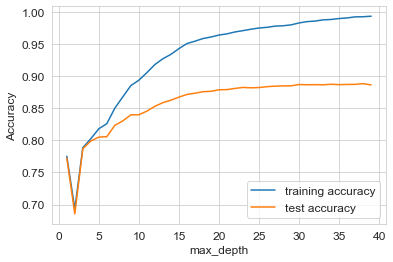

In [241]:
# Plotting accuracy

plt.figure()

plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")

plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")

plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [242]:
# Tuning 'min_samples_leaf'

n_folds = 3

parameters = {'min_samples_leaf': range(5, 200, 20)}

dtree = DecisionTreeClassifier(class_weight = 'balanced', random_state = 0)

tree = GridSearchCV(dtree, parameters, cv = n_folds, scoring = "accuracy", return_train_score = True, n_jobs = -1, verbose = 1)

tree.fit(X_train_pca, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    6.9s finished


GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=0),
             n_jobs=-1, param_grid={'min_samples_leaf': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy', verbose=1)

In [243]:
# Cross validation results

scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       2.156218      0.058644         0.006317    4.701905e-04   
1       1.761285      0.033168         0.005984    3.371748e-07   
2       1.828105      0.140869         0.006317    4.691240e-04   
3       1.784557      0.123214         0.005984    2.247832e-07   
4       1.691140      0.079493         0.007314    1.880255e-03   

  param_min_samples_leaf                    params  split0_test_score  \
0                      5   {'min_samples_leaf': 5}           0.865189   
1                     25  {'min_samples_leaf': 25}           0.813152   
2                     45  {'min_samples_leaf': 45}           0.783703   
3                     65  {'min_samples_leaf': 65}           0.778842   
4                     85  {'min_samples_leaf': 85}           0.779271   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.856326           0.853896         0.858470        0.004854   
1           0.807291           0.797427         0.805957        0.006489   
2           0.804718           0.771122         0.786514        0.013859   
3           0.781415           0.786562         0.782273        0.003209   
4           0.786276           0.786991         0.784179        0.003483   

   rank_test_score  split0_train_score  split1_train_score  \
0                1            0.950036            0.945247   
1                2            0.858470            0.844103   
2                3            0.819800            0.829878   
3                5            0.801072            0.805718   
4                4            0.794925            0.803574   

   split2_train_score  mean_train_score  std_train_score  
0            0.945032          0.946772         0.002310  
1            0.842102          0.848225         0.007291  
2            0.807934          0.819204         0.008969  
3            0.810865          0.805885         0.004000  
4            0.808149          0.802216         0.005483

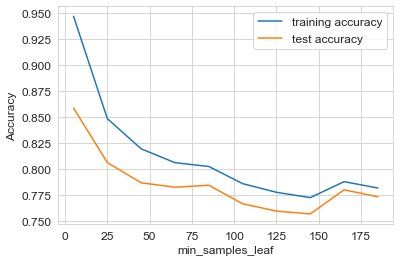

In [244]:
# Plotting accuracy

plt.figure()

plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")

plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")

plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [245]:
# Tuning 'min_samples_split'

n_folds = 3

parameters = {'min_samples_split': range(5, 200, 20)}

dtree = DecisionTreeClassifier(class_weight = 'balanced', random_state = 0)

tree = GridSearchCV(dtree, parameters, cv = n_folds, scoring = "accuracy", return_train_score = True, n_jobs = -1, verbose = 1)

tree.fit(X_train_pca, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    9.8s finished


GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=0),
             n_jobs=-1, param_grid={'min_samples_split': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy', verbose=1)

In [246]:
# Cross validation results

scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       2.449111      0.128047         0.006650    4.692911e-04   
1       2.424841      0.168315         0.006982    8.141014e-04   
2       2.468061      0.147957         0.006317    4.709771e-04   
3       2.681490      0.107522         0.005985    8.150749e-04   
4       2.599044      0.094872         0.005984    3.893359e-07   

  param_min_samples_split                     params  split0_test_score  \
0                       5   {'min_samples_split': 5}           0.889492   
1                      25  {'min_samples_split': 25}           0.854467   
2                      45  {'min_samples_split': 45}           0.830879   
3                      65  {'min_samples_split': 65}           0.804861   
4                      85  {'min_samples_split': 85}           0.790136   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.883774           0.883202         0.885490        0.002840   
1           0.850036           0.853181         0.852561        0.001862   
2           0.823159           0.824589         0.826209        0.003353   
3           0.812009           0.799428         0.805432        0.005152   
4           0.810579           0.783703         0.794806        0.011458   

   rank_test_score  split0_train_score  split1_train_score  \
0                1            0.995854            0.995282   
1                2            0.946676            0.944317   
2                3            0.910650            0.901573   
3                4            0.871480            0.877913   
4                5            0.847105            0.864689   

   split2_train_score  mean_train_score  std_train_score  
0            0.995568          0.995568         0.000233  
1            0.943031          0.944675         0.001510  
2            0.905575          0.905933         0.003715  
3            0.867048          0.872147         0.004461  
4            0.844103          0.851966         0.009080

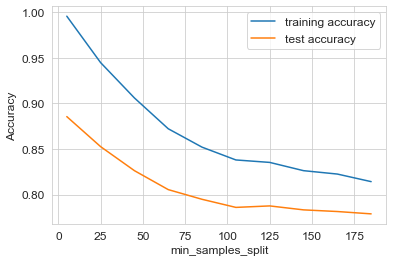

In [247]:
# Plotting accuracy

plt.figure()

plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")

plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")

plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Grid Search to find Optimal Hyperparameters

In [248]:
# Creating the parameter grid based on the results of random search

param_grid = {'max_depth': range(5, 10, 1),
              'min_samples_leaf': range(25, 150, 25),
              'min_samples_split': range(25, 150, 25),
              'criterion': ["entropy", "gini"]}

dtree = DecisionTreeClassifier(class_weight = 'balanced', random_state = 0)

grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 1)

In [249]:
# Fitting the grid search to the PCA transformed data

grid_search.fit(X_train_pca, y_train)

Fitting 3 folds for each of 250 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   48.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  2.9min finished


GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 10),
                         'min_samples_leaf': range(25, 150, 25),
                         'min_samples_split': range(25, 150, 25)},
             verbose=1)

In [250]:
# Printing the optimal accuracy score and hyperparameters

print('Accuracy of our model is',grid_search.best_score_,'using',grid_search.best_params_)

Accuracy of our model is 0.8142959256611865 using {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 25, 'min_samples_split': 25}


In [251]:
# Fitting the final model with the best parameters obtained from grid search

dtc = DecisionTreeClassifier(max_depth = 7,
                             min_samples_leaf = 25, 
                             min_samples_split = 25,
                             criterion = 'gini', 
                             class_weight = 'balanced', 
                             random_state = 0)

In [252]:
# Fitting our final model on our PCA transformed train data

dtc.fit(X_train_pca, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=7,
                       min_samples_leaf=25, min_samples_split=25,
                       random_state=0)

In [253]:
# Predictions on our PCA transformed test data

predictions = dtc.predict(X_test_pca)

In [254]:
# Confusion matrix

confusion_matrix_10 = metrics.confusion_matrix(y_test, predictions)
print(confusion_matrix_10)

[[6728 1489]
 [ 181  596]]


In [255]:
print(metrics.accuracy_score(y_test, predictions))

0.8143206582165888


In [256]:
# Lets derive the followuing to find specificity and sensitivity

TP = confusion_matrix_10[1,1] # true positive 
TN = confusion_matrix_10[0,0] # true negatives
FP = confusion_matrix_10[0,1] # false positives
FN = confusion_matrix_10[1,0] # false negatives

In [257]:
# Let's see the sensitivity of our logistic regression model

Sensitivity = TP / float(TP+FN)
Sensitivity

0.767052767052767

In [258]:
# Let us calculate specificity

TN / float(TN+FP)

0.8187903127662164

In [259]:
# Let us calculate Precision

Precision = TP / float(TP+FP)
Precision

0.2858513189448441

In [260]:
# Let's see the F1 score of our final logistic regression model

F1_score = 2*(Precision * Sensitivity)/(Precision + Sensitivity)
F1_score

0.416491963661775

**Our PCA with Decision Trees evaluation metrics on our test data after hyperparameter tuning are:**
- **Accuracy - 81.4%**
- **Sensitivity - 76.7%**
- **Specificity - 81.8%**

# Business Insights

**Top features influencing the churn rate obtained from our logistic regression model are:**
1. arpu_8
2. std_og_t2m_mou_8	
3. offnet_mou_7	
4. loc_og_t2m_mou_8	
5. total_rech_num_8	
6. std_og_t2t_mou_8	
7. total_ic_mou_8	
8. max_rech_data_8	
9. last_day_rch_amt_8	
10. loc_og_t2t_mou_8	
11. spl_ic_mou_8

**Company needs to concentrate on these features to tackle Churn rate.**
- Average Revenue Generated Per User for the action month. If that decreases, it indicates that the customer is sored out with that network.
- The company can also consider the features which indicate the 'number of times recharged' either the number of internet. A drop in those numbers can indicate that person may churn. So it will be better if they introduce any special offers to attract them.
- The churn rate would be less if the off network call charges, roaming rates and international calls charges are less or are with special offers.
- The company can also try to improve 2G and 3G internet rates and facilities.

**We chose the best model based on the Specificity because here we need to identify High Value Customers who don't Churn i.e True negatives so that we can provide good offers to prevent them from churning as we get most of the revenue from these top customers. This True negative rate is given by Specificity.**

**Specificity(true negative rate) measures the proportion of actual negatives that are correctly identified as such.**

It is given by the formula __TN/(TN + FP)__.

**Our Model performance:**

1. Logistic Regression model

    - Accuracy - 80.8%
    - Sensitivity - 81.8%
    - Specificity - 80.7%
    - Precision - 28.7
    - F2 score - 42.4


2. PCA with Logistic regression model

    - Accuracy - 81.1%
    - Sensitivity - 83.2%
    - Specificity - 80.9%
    - Precision - 29.4
    - F2 score - 43.6

3. PCA with Random Forest model

    - Accuracy - 85.6%
    - Sensitivity - 76.1%
    - Specificity - 86.5%
    - Precision - 34.8
    - F2 score - 47.8

4. PCA with Decision Trees

    - Accuracy - 81.4%
    - Sensitivity - 76.7%
    - Specificity - 81.8%
    - Precision - 28.5
    - F2 score - 41.6
    
From the above we can see that **PCA with Random Forest model** has good Accuracy and Specificity among others.